## Problem Statement:  

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Business Objective:

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Importing Liabraries:

In [4]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns


pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x:'%.2f'% x)

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

import warnings
warnings.filterwarnings('ignore')


plt.style.use("ggplot")

## Reading and Understanding the Data:

In [5]:
churn_df = pd.read_csv("telecom_churn_data.csv")
churn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          NaN   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

In [6]:
churn_df.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109            0.00            0.00   
99995     7000607688        109            0.00            0.00   
99996     7000087541        109            0.00            0.00   
99997     7000498689        109            0.00            0.00   
99998     7001905007        109            0.00            0.00   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994            0.00            6/30/2014            7/31/2014   
99995            0.00            6/30/2014            7/31/2014   
99996            0.00            6/30/2014            7/31/2014   
99997            0.00            6/30/2014            7/31/2014   
99998            0.00            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  \
99994            8/31/2014            9/30/2014   18.47   69.16   57.53   
99995            8/31/2014            9/30/2014  112.20   77.81   79.08   
99996            8/31/2014            9/30/2014  229.19    0.00    0.00   
99997            8/31/2014            9/30/2014  322.99  303.39  606.82   
99998            8/31/2014            9/30/2014  687.07    0.00    0.00   

       arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
99994   29.95         5.40         3.36         5.91         0.00   
99995  140.84        29.26        18.13        16.06        49.49   
99996    0.00         1.11          NaN          NaN          NaN   
99997  731.01         0.00         0.00         0.00         0.00   
99998    0.00        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
99994         15.19         54.46         52.79         27.14           0.00   
99995        100.83         69.01         66.39         56.13           0.00   
99996         21.04           NaN           NaN           NaN           0.00   
99997          0.00          0.00          0.00          0.00           0.00   
99998        166.46           NaN           NaN           NaN           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
99994           0.00           0.00           0.00           0.00   
99995           0.00           0.00           0.95           0.00   
99996            NaN            NaN            NaN           0.00   
99997           0.00           0.00           0.00           0.00   
99998            NaN            NaN            NaN           0.00   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
99994           0.00           0.00           0.00              5.40   
99995           0.00           0.00           4.23             28.93   
99996            NaN            NaN            NaN              1.11   
99997           0.00           0.00           0.00              0.00   
99998            NaN            NaN            NaN             84.34   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
99994              3.36              5.91              0.00             12.78   
99995             18.13             16.06             49.49             91.34   
99996               NaN               NaN               NaN             13.33   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN            166.46   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
99994             54.46             49.58             24.78              0.00   
99995             47.53             57.51             46.71              1.71   
99996               NaN               NaN               NaN              0.00   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN              0.00   

       loc_og_t2f_mou_7  loc_og_

In [7]:
churn_df.shape

(99999, 226)

In [6]:
churn_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000606232.50     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
25%              0.00    93.41    86.98    84.13    62.69         7.38   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.81   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00         

In [8]:
# custom function to display a basic summary of the dataset:

def data_summary(dataset):
    output = []
    for col in dataset.columns:
        unique   = dataset[col].nunique()                        
        null_val = np.sum(pd.isna(dataset[col]))                 
        nonNull  = len(dataset) - null_val                        
        colType  = str(dataset[col].dtype)                       
        output.append([col, unique, null_val, nonNull, colType]) 
    output = pd.DataFrame(output)                                
    output.columns = ["col_name","n_unique","null_values","non_null_values","dtype"] 
    return output

In [8]:
# summary of the data-set using custom function defined:

data_summary(churn_df).sort_values("null_values", ascending = False)

col_name  n_unique  null_values  non_null_values    dtype
189                 arpu_3g_6      7418        74846            25153  float64
197          night_pck_user_6         2        74846            25153  float64
161         total_rech_data_6        37        74846            25153  float64
193                 arpu_2g_6      6990        74846            25153  float64
165           max_rech_data_6        48        74846            25153  float64
217                 fb_user_6         2        74846            25153  float64
177        av_rech_amt_data_6       887        74846            25153  float64
157  date_of_last_rech_data_6        30        74846            25153   object
169           count_rech_2g_6        31        74846            25153  float64
173           count_rech_3g_6        25        74846            25153  float64
158  date_of_last_rech_data_7        31        74428            25571   object
162         total_rech_data_7        42        74428            25571  float64
218                 fb_user_7         2        74428            25571  float64
166           max_rech_data_7        48        74428            25571  float64
198          night_pck_user_7         2        74428            25571  float64
170           count_rech_2g_7        36        74428            25571  float64
178        av_rech_amt_data_7       961        74428            25571  float64
194                 arpu_2g_7      6586        74428            25571  float64
174           count_rech_3g_7        28        74428            25571  float64
190                 arpu_3g_7      7246        74428            25571  float64
164         total_rech_data_9        37        74077            25922  float64
176           count_rech_3g_9        27        74077            25922  float64
220                 fb_user_9         2        74077            25922  float64
168           max_rech_data_9        50        74077            25922  float64
192                 arpu_3g_9      8063        74077            25922  float64
160  date_of_last_rech_data_9        30        74077            25922   object
200          night_pck_user_9         2        74077            25922  float64
196                 arpu_2g_9      6795        74077            25922  float64
172           count_rech_2g_9        32        74077            25922  float64
180        av_rech_amt_data_9       945        74077            25922  float64
163         total_rech_data_8        46        73660            26339  float64
191                 arpu_3g_8      7787        73660            26339  float64
219                 fb_user_8         2        73660            26339  float64
199          night_pck_user_8         2        73660            26339  float64
179        av_rech_amt_data_8       973        73660            26339  float64
167           max_rech_data_8        50        73660            26339  float64
175           count_rech_3g_8        29        73660            26339  float64
195                 arpu_2g_8      6652        73660            26339  float64
171           count_rech_2g_8        34        73660            26339  float64
159  date_of_last_rech_data_8        31        73660            26339   object
136               ic_others_9      1923         7745            92254  float64
68               std_og_mou_9     26553         7745            92254  float64
64           std_og_t2c_mou_9         1         7745            92254  float64
132              isd_ic_mou_9      5557         7745            92254  float64
120              std_ic_mou_9     11266         7745            92254  float64
72               isd_og_mou_9      1255         7745            92254  float64
76               spl_og_mou_9      4095         7745            92254  float64
128              spl_ic_mou_9       384         7745            92254  float64
80                og_others_9       235         7745            92254  float64
88           loc_ic_t2t_mou_9     12993         7745            92254  

In [9]:
# convert -vbc columns headers to similar format as the other columns:

month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g']
churn_df = churn_df.rename(columns = {'aug_vbc_3g':'3g_vbc_8',
                                      'jul_vbc_3g':'3g_vbc_7',
                                      'jun_vbc_3g':'3g_vbc_6',
                                      'sep_vbc_3g':'3g_vbc_9'})

In [9]:
# convert the date columns to date-time format: 

date_col= [col for col in churn_df.columns if 'date' in col]

for i in churn_df[date_col]:
    churn_df[i] = pd.to_datetime(churn_df[i])

## Filtering High-Value Customers From Good Phase:

#We will filter out the high value customers based on the following definition

#Customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
#Features with 'rech' in the column header pertains to recharge related data.
#We will filter out these columns, check for missing values and impute with a suitable approach before filtering the high value customers.

In [10]:
# create a list of all columns:
all_columns = churn_df.columns.tolist()

# getting a list of all columns pertaining to recharge: 
recharge_cols = [col for col in all_columns if 'rech' in col]
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [11]:
# create a function to get null values for each column: 

def null_values(df):
    null_val = df.isnull().mean().reset_index()
    null_val[0]= null_val[0]*100
    null_val = null_val.rename(columns={"index":"Column Name",0:"Missing_Value_%"})
    null_val = null_val.sort_values(by="Missing_Value_%",ascending=False)
    return null_val

In [13]:
null_values(churn_df[recharge_cols])

Column Name  Missing_Value_%
20         total_rech_data_6            74.85
32           count_rech_3g_6            74.85
24           max_rech_data_6            74.85
28           count_rech_2g_6            74.85
16  date_of_last_rech_data_6            74.85
36        av_rech_amt_data_6            74.85
33           count_rech_3g_7            74.43
17  date_of_last_rech_data_7            74.43
25           max_rech_data_7            74.43
37        av_rech_amt_data_7            74.43
21         total_rech_data_7            74.43
29           count_rech_2g_7            74.43
35           count_rech_3g_9            74.08
31           count_rech_2g_9            74.08
27           max_rech_data_9            74.08
23         total_rech_data_9            74.08
19  date_of_last_rech_data_9            74.08
39        av_rech_amt_data_9            74.08
18  date_of_last_rech_data_8            73.66
38        av_rech_amt_data_8            73.66
22         total_rech_data_8            73.66
26           max_rech_data_8            73.66
30           count_rech_2g_8            73.66
34           count_rech_3g_8            73.66
15       date_of_last_rech_9             4.76
14       date_of_last_rech_8             3.62
13       date_of_last_rech_7             1.77
12       date_of_last_rech_6             1.61
5           total_rech_amt_7             0.00
2           total_rech_num_8             0.00
3           total_rech_num_9             0.00
4           total_rech_amt_6             0.00
8             max_rech_amt_6             0.00
6           total_rech_amt_8             0.00
7           total_rech_amt_9             0.00
9             max_rech_amt_7             0.00
10            max_rech_amt_8             0.00
11            max_rech_amt_9             0.00
1           total_rech_num_7             0.00
0           total_rech_num_6             0.00

In [12]:

churn_df[recharge_cols].describe(include='all')

total_rech_num_6  total_rech_num_7  total_rech_num_8  \
count           99999.00          99999.00          99999.00   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
first                NaN               NaN               NaN   
last                 NaN               NaN               NaN   
mean                7.56              7.70              7.21   
std                 7.08              7.07              7.20   
min                 0.00              0.00              0.00   
25%                 3.00              3.00              3.00   
50%                 6.00              6.00              5.00   
75%                 9.00             10.00              9.00   
max               307.00            138.00            196.00   

        total_rech_num_9  total_rech_amt_6  total_rech_amt_7  \
count           99999.00          99999.00          99999.00   
unique               NaN               NaN               NaN   
top                  NaN               NaN               NaN   
freq                 NaN               NaN               NaN   
first                NaN               NaN               NaN   
last                 NaN               NaN               NaN   
mean                6.89            327.51            322.96   
std                 7.10            398.02            408.11   
min                 0.00              0.00              0.00   
25%                 3.00            109.00            100.00   
50%                 5.00            230.00            220.00   
75%                 9.00            437.50            428.00   
max               131.00          35190.00          40335.00   

        total_rech_amt_8  total_rech_amt_9  max_rech_amt_6  max_rech_amt_7  \
count           99999.00          99999.00        99999.00        99999.00   
unique               NaN               NaN             NaN             NaN   
top                  NaN               NaN             NaN             NaN   
freq                 NaN               NaN             NaN             NaN   
first                NaN               NaN             NaN             NaN   
last                 NaN               NaN             NaN             NaN   
mean              324.16            303.35          104.64          104.75   
std               416.54            404.59          120.61          124.52   
min                 0.00              0.00            0.00            0.00   
25%                90.00             52.00           30.00           30.00   
50%               225.00            200.00          110.00          110.00   
75%               434.50            415.00          120.00          128.00   
max             45320.00          37235.00         4010.00         4010.00   

        max_rech_amt_8  max_rech_amt_9  date_of_last_rech_6  \
count         99999.00        99999.00                98392   
unique             NaN             NaN                   30   
top                NaN             NaN  2014-06-30 00:00:00   
freq               NaN             NaN                16960   
first              NaN             NaN  2014-06-01 00:00:00   
last               NaN             NaN  2014-06-30 00:00:00   
mean            107.73          101.94                  NaN   
std             126.90          125.38                  NaN   
min               0.00            0.00                  NaN   
25%              30.00           28.00                  NaN   
50%              98.00           61.00                  NaN   
75%             144.00          144.00                  NaN   
max            4449.00         3399.00                  NaN   

        date_of_last_rech_7  date_of_last_rech_8  date_of_last_rech_9  \
count                 98232                96377                95239   
unique                   31                   31                   30   
top     2014-07-31 

In [15]:
#check if the null values in recharge are because the customers havent recharged in that particular month: 

churn_df.loc[churn_df["total_rech_data_6"].isnull() & churn_df["date_of_last_rech_data_6"].isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

#churn_df.loc[churn_df["total_rech_data_7"].isnull() & churn_df["date_of_last_rech_data_7"].isnull(), ["total_rech_data_7", "date_of_last_rech_data_7"]].head(20)
#churn_df.loc[churn_df["total_rech_data_8"].isnull() & churn_df["date_of_last_rech_data_8"].isnull(), ["total_rech_data_8", "date_of_last_rech_data_8"]].head(20)


total_rech_data_6 date_of_last_rech_data_6
1                 NaN                      NaT
2                 NaN                      NaT
3                 NaN                      NaT
5                 NaN                      NaT
6                 NaN                      NaT
7                 NaN                      NaT
8                 NaN                      NaT
9                 NaN                      NaT
10                NaN                      NaT
11                NaN                      NaT
12                NaN                      NaT
13                NaN                      NaT
14                NaN                      NaT
15                NaN                      NaT
16                NaN                      NaT
17                NaN                      NaT
18                NaN                      NaT
20                NaN                      NaT
21                NaN                      NaT
22                NaN                      NaT

In [13]:
# Impute the missing values in the recharge columns with zeroes


# creating a list of recharge columns that are required for further analysis and have null values:

impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

# impute missing values with 0: 

churn_df[impute] = churn_df[impute].apply(lambda x: x.fillna(0))

In [14]:
# calculate the total data recharge amount for both June and July months:

churn_df['total_data_rech_amt_6'] = churn_df["total_rech_data_6"] * churn_df["av_rech_amt_data_6"]
churn_df['total_data_rech_amt_7'] = churn_df["total_rech_data_7"] * churn_df["av_rech_amt_data_7"]
churn_df['total_data_rech_amt_8'] = churn_df["total_rech_data_8"] * churn_df["av_rech_amt_data_8"]
churn_df['total_data_rech_amt_9'] = churn_df["total_rech_data_9"] * churn_df["av_rech_amt_data_9"]


In [15]:
# calculating the average recharge amount for the month June & July

churn_df["tot_amt_data_6"] = churn_df["total_rech_amt_6"] + churn_df["total_data_rech_amt_6"]
churn_df["tot_amt_data_7"] = churn_df["total_rech_amt_7"] + churn_df["total_data_rech_amt_7"]

# averaging for the months of June and July
churn_df["avg_amt_data_6_7"] = (churn_df["tot_amt_data_6"] + churn_df["tot_amt_data_7"])/2

# getting the recharge value at 70th percentile
percentile_70 = churn_df["avg_amt_data_6_7"].quantile(0.7)

print(percentile_70)

478.0


In [16]:
# creating a separate df to retain data only for high value customers

churn_hv = churn_df.loc[churn_df["avg_amt_data_6_7"] >= percentile_70, :]
churn_hv = churn_hv.reset_index(drop=True)
churn_hv.shape

(30001, 233)

## Tagging Churn:

In this step we will tag the customers as 
churn = 1, else 0 based on customer behaviour in the churn phase i.e fourth month (9). 
Churn = 1 are customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

**The attributes used to tag churners are:**

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [17]:
# filter the features that have to be used to define "churn" variable:

churn_col=["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]
churn_hv[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 937.7 KB


In [18]:
# define the churn variable based on the definition given: 


churn_hv['churn'] = churn_hv.apply(lambda x: 1 if((x.total_ic_mou_9 == 0) & 
                                                          (x.total_og_mou_9 == 0) and 
                                                          (x.vol_2g_mb_9 == 0) and 
                                                          (x.vol_3g_mb_9 == 0)) else 0, axis=1)
churn_hv.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7000701601        109            0.00            0.00            0.00   
2     7001524846        109            0.00            0.00            0.00   
3     7002124215        109            0.00            0.00            0.00   
4     7000887461        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0           2014-09-30  197.38  214.82  213.80   21.10          NaN   
1           2014-09-30 1069.18 1349.85 3171.48  500.00        57.84   
2           2014-09-30  378.72  492.22  137.36  166.79       413.69   
3           2014-09-30  514.45  597.75  637.76  578.60       102.41   
4           2014-09-30   74.35  193.90  366.97  811.48        48.96   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        54.68        52.29          NaN        453.43        567.16   
2       351.03        35.08        33.46         94.66         80.63   
3       132.11        85.14       161.63        757.93        896.68   
4        50.66        33.58        15.74         85.41         89.36   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        325.91           NaN          16.23          33.49          31.64   
2        136.48        108.71           0.00           0.00           0.00   
3        983.39        869.89           0.00           0.00           0.00   
4        205.89        111.88           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1            NaN          23.74          12.59          38.06            NaN   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             51.39             31.38             40.28               NaN   
2            297.13            217.59             12.49             26.13   
3              4.48              6.16             23.34             29.98   
4             48.96             50.66             33.58             15.74   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1            308.63            447.38            162.28               NaN   
2             80.96             70.58             50.54             34.58   
3             91.81             87.93            104.81            107.54   
4             82.94             83.01            148.56             83.73   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1             62.13             55.14             53.23               NaN   
2              0.00              0.00              0.00              0.00   
3              0.75              0.00              1.58              0.00  

## Inspecting the Target Variable- "churn":

In [19]:
 round(churn_hv["churn"].value_counts(normalize = True),2)

0   0.92
1   0.08
Name: churn, dtype: float64

In [20]:
# define a custom function to display data-labels for bar chart:

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

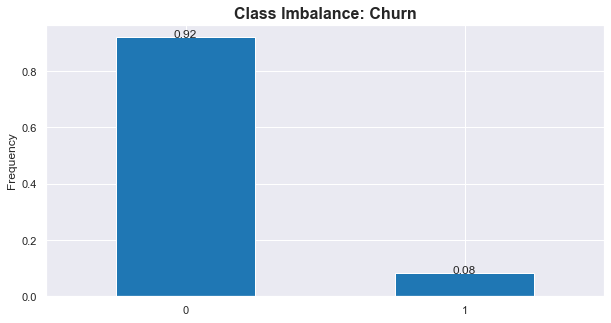

In [22]:
sns.set_theme(palette = "tab10")
plt.figure(figsize=(10,5 ))
churn_hv["churn"].value_counts(normalize = True).plot.bar()
plt.title ("Class Imbalance: Churn", fontweight = 700, fontsize = 16)
plt.xticks(rotation=0)
plt.ylabel("Frequency")
x_datalabel = churn_hv["churn"].value_counts().index.tolist()
y_datalabel = round(churn_hv["churn"].value_counts(normalize = True),2).values.tolist()

add_labels(x_datalabel,y_datalabel)

plt.show()

In [25]:
# drop columns related to the Month _9:

month_9_col = [col for col in churn_hv.columns if '_9' in col]
churn_hv.drop(month_9_col, axis=1, inplace = True)
churn_hv.shape

(30001, 178)

## Handling Missing Values:

In [26]:
null_values(churn_hv)


Column Name  Missing_Value_%
151          night_pck_user_8            46.83
133           count_rech_3g_8            46.83
121  date_of_last_rech_data_8            46.83
166                 fb_user_8            46.83
130           count_rech_2g_8            46.83
148                 arpu_2g_8            46.83
145                 arpu_3g_8            46.83
146                 arpu_2g_6            44.15
164                 fb_user_6            44.15
131           count_rech_3g_6            44.15
119  date_of_last_rech_data_6            44.15
128           count_rech_2g_6            44.15
143                 arpu_3g_6            44.15
149          night_pck_user_6            44.15
147                 arpu_2g_7            43.15
120  date_of_last_rech_data_7            43.15
144                 arpu_3g_7            43.15
150          night_pck_user_7            43.15
129           count_rech_2g_7            43.15
132           count_rech_3g_7            43.15
165                 fb_user_7            43.15
88           std_ic_t2o_mou_8             3.91
43           std_og_t2m_mou_8             3.91
49           std_og_t2c_mou_8             3.91
40           std_og_t2t_mou_8             3.91
85           std_ic_t2f_mou_8             3.91
46           std_og_t2f_mou_8             3.91
82           std_ic_t2m_mou_8             3.91
70           loc_ic_t2m_mou_8             3.91
79           std_ic_t2t_mou_8             3.91
52               std_og_mou_8             3.91
76               loc_ic_mou_8             3.91
55               isd_og_mou_8             3.91
73           loc_ic_t2f_mou_8             3.91
58               spl_og_mou_8             3.91
67           loc_ic_t2t_mou_8             3.91
91               std_ic_mou_8             3.91
31           loc_og_t2f_mou_8             3.91
37               loc_og_mou_8             3.91
103               ic_others_8             3.91
13                onnet_mou_8             3.91
16               offnet_mou_8             3.91
19              roam_ic_mou_8             3.91
22              roam_og_mou_8             3.91
25           loc_og_t2t_mou_8             3.91
28           loc_og_t2m_mou_8             3.91
100              isd_ic_mou_8             3.91
34           loc_og_t2c_mou_8             3.91
97               spl_ic_mou_8             3.91
61                og_others_8             3.91
115       date_of_last_rech_8             1.94
65           loc_ic_t2t_mou_6             1.82
101               ic_others_6             1.82
80           std_ic_t2m_mou_6             1.82
83           std_ic_t2f_mou_6             1.82
95               spl_ic_mou_6             1.82
77           std_ic_t2t_mou_6             1.82
74               loc_ic_mou_6             1.82
98               isd_ic_mou_6             1.82
86           std_ic_t2o_mou_6             1.82
71           loc_ic_t2f_mou_6             1.82
68           loc_ic_t2m_mou_6             1.82
89               std_ic_mou_6             1.82
20              roam_og_mou_6             1.82
11                onnet_mou_6             1.82
41           std_og_t2m_mou_6             1.82
35               loc_og_mou_6             1.82
44           std_og_t2f_mou_6             1.82
32           loc_og_t2c_mou_6             1.82
47           std_og_t2c_mou_6             1.82
29           loc_og_t2f_mou_6             1.82
50               std_og_mou_6             1.82
38           std_og_t2t_mou_6             1.82
53               isd_og_mou_6             1.82
26           loc_og_t2m_mou_6             1.82
56               spl_og_mou_6             1.82
14               offnet_mou_6             1.82
17              roam_ic_mou_6             1.82
59                og_others_6             1.82
23           loc_og_t2t_mou_6             1.82
12                onnet_mou_7             1.79
27           loc_og_t2m_mou_7             1.79
15               offnet_mou_7             1.79
24           loc_og_t2t_mou_7             1.79
102               ic_ot

In [24]:
# columns with more than 40% missing values

missing_40 = null_values(churn_hv)[null_values(churn_hv)["Missing_Value_%"]>40]
missing_40

Column Name  Missing_Value_%
196                 arpu_2g_9            49.27
200          night_pck_user_9            49.27
192                 arpu_3g_9            49.27
220                 fb_user_9            49.27
176           count_rech_3g_9            49.27
172           count_rech_2g_9            49.27
160  date_of_last_rech_data_9            49.27
159  date_of_last_rech_data_8            46.83
191                 arpu_3g_8            46.83
195                 arpu_2g_8            46.83
175           count_rech_3g_8            46.83
199          night_pck_user_8            46.83
219                 fb_user_8            46.83
171           count_rech_2g_8            46.83
217                 fb_user_6            44.15
169           count_rech_2g_6            44.15
197          night_pck_user_6            44.15
157  date_of_last_rech_data_6            44.15
193                 arpu_2g_6            44.15
189                 arpu_3g_6            44.15
173           count_rech_3g_6            44.15
198          night_pck_user_7            43.15
158  date_of_last_rech_data_7            43.15
218                 fb_user_7            43.15
170           count_rech_2g_7            43.15
174           count_rech_3g_7            43.15
194                 arpu_2g_7            43.15
190                 arpu_3g_7            43.15

In [25]:
# Confirm to see if all the columns are missing the same  

churn_hv[missing_40][churn_hv[missing_40]['arpu_3g_6'].isnull()].head(20)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0             NaN        NaN             NaN             NaN             NaN   
1             NaN        NaN             NaN             NaN             NaN   
2             NaN        NaN             NaN             NaN             NaN   
3             NaN        NaN             NaN             NaN             NaN   
4             NaN        NaN             NaN             NaN             NaN   
5             NaN        NaN             NaN             NaN             NaN   
6             NaN        NaN             NaN             NaN             NaN   
7             NaN        NaN             NaN             NaN             NaN   
8             NaN        NaN             NaN             NaN             NaN   
9             NaN        NaN             NaN             NaN             NaN   
10            NaN        NaN             NaN             NaN             NaN   
11            NaN        NaN             NaN             NaN             NaN   
12            NaN        NaN             NaN             NaN             NaN   
13            NaN        NaN             NaN             NaN             NaN   
14            NaN        NaN             NaN             NaN             NaN   
15            NaN        NaN             NaN             NaN             NaN   
16            NaN        NaN             NaN             NaN             NaN   
17            NaN        NaN             NaN             NaN             NaN   
18            NaN        NaN             NaN             NaN             NaN   
19            NaN        NaN             NaN             NaN             NaN   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0                   NaT                  NaT                  NaT   
1                   NaT                  NaT                  NaT   
2                   NaT                  NaT                  NaT   
3                   NaT                  NaT                  NaT   
4                   NaT                  NaT                  NaT   
5                   NaT                  NaT                  NaT   
6                   NaT                  NaT                  NaT   
7                   NaT                  NaT                  NaT   
8                   NaT                  NaT                  NaT   
9                   NaT                  NaT                  NaT   
10                  NaT                  NaT                  NaT   
11                  NaT                  NaT                  NaT   
12                  NaT                  NaT                  NaT   
13                  NaT                  NaT                  NaT   
14                  NaT                  NaT                  NaT   
15                  NaT                  NaT                  NaT   
16                  NaT                  NaT                  NaT   
17                  NaT                  NaT                  NaT   
18                  NaT                  NaT                  NaT   
19                  NaT                  NaT                  NaT   

   last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0                   NaT     NaN     NaN     NaN     NaN          NaN   
1                   NaT     NaN     NaN     NaN     NaN          NaN   
2                   NaT     NaN     NaN     NaN     NaN          NaN   
3                   NaT     NaN     NaN     NaN     NaN          NaN   
4                   NaT     NaN     NaN     NaN     NaN          NaN   
5                   NaT     NaN     NaN     NaN     NaN          NaN   
6                   NaT     NaN     NaN     NaN     NaN          NaN   
7                   NaT     NaN     NaN     NaN     NaN          NaN   
8                   NaT     NaN     NaN     NaN     NaN          NaN   
9                   NaT     NaN     NaN     NaN     NaN          NaN   
10                  NaT     NaN     NaN     NaN     NaN          NaN   
11       

In [29]:
# create a list of columns that relate to mobile/data services

impute_40 = ['count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

# drop columns with > 40% missing values:

churn_hv[impute_40] = churn_hv[impute_40].fillna(0)


In [26]:
# drop the date columns

date_col = [col for col in churn_hv.columns if 'date' in col]
churn_hv.drop(date_col, axis=1, inplace=True)
[col for col in churn_hv.columns if 'date' in col]

[]

In [27]:
churn_hv.shape

(30001, 222)

In [28]:
# get the list of missing values after dropping the features with > 40% missing values:

missing_mou= null_values(churn_hv)[null_values(churn_hv)["Missing_Value_%"]>0]
missing_mou

Column Name  Missing_Value_%
208         fb_user_9            49.27
180         arpu_3g_9            49.27
184         arpu_2g_9            49.27
160   count_rech_2g_9            49.27
164   count_rech_3g_9            49.27
188  night_pck_user_9            49.27
207         fb_user_8            46.83
159   count_rech_2g_8            46.83
183         arpu_2g_8            46.83
179         arpu_3g_8            46.83
163   count_rech_3g_8            46.83
187  night_pck_user_8            46.83
185  night_pck_user_6            44.15
177         arpu_3g_6            44.15
157   count_rech_2g_6            44.15
181         arpu_2g_6            44.15
205         fb_user_6            44.15
161   count_rech_3g_6            44.15
182         arpu_2g_7            43.15
158   count_rech_2g_7            43.15
178         arpu_3g_7            43.15
186  night_pck_user_7            43.15
162   count_rech_3g_7            43.15
206         fb_user_7            43.15
100  std_ic_t2t_mou_9             6.34
96       loc_ic_mou_9             6.34
128      isd_ic_mou_9             6.34
48   std_og_t2t_mou_9             6.34
104  std_ic_t2m_mou_9             6.34
92   loc_ic_t2f_mou_9             6.34
44       loc_og_mou_9             6.34
52   std_og_t2m_mou_9             6.34
76        og_others_9             6.34
56   std_og_t2f_mou_9             6.34
88   loc_ic_t2m_mou_9             6.34
84   loc_ic_t2t_mou_9             6.34
60   std_og_t2c_mou_9             6.34
112  std_ic_t2o_mou_9             6.34
72       spl_og_mou_9             6.34
64       std_og_mou_9             6.34
108  std_ic_t2f_mou_9             6.34
68       isd_og_mou_9             6.34
32   loc_og_t2m_mou_9             6.34
132       ic_others_9             6.34
116      std_ic_mou_9             6.34
12        onnet_mou_9             6.34
16       offnet_mou_9             6.34
36   loc_og_t2f_mou_9             6.34
124      spl_ic_mou_9             6.34
20      roam_ic_mou_9             6.34
24      roam_og_mou_9             6.34
40   loc_og_t2c_mou_9             6.34
28   loc_og_t2t_mou_9             6.34
71       spl_og_mou_8             3.91
75        og_others_8             3.91
83   loc_ic_t2t_mou_8             3.91
115      std_ic_mou_8             3.91
131       ic_others_8             3.91
91   loc_ic_t2f_mou_8             3.91
95       loc_ic_mou_8             3.91
67       isd_og_mou_8             3.91
127      isd_ic_mou_8             3.91
99   std_ic_t2t_mou_8             3.91
103  std_ic_t2m_mou_8             3.91
123      spl_ic_mou_8             3.91
107  std_ic_t2f_mou_8             3.91
111  std_ic_t2o_mou_8             3.91
87   loc_ic_t2m_mou_8             3.91
23      roam_og_mou_8             3.91
35   loc_og_t2f_mou_8             3.91
55   std_og_t2f_mou_8             3.91
51   std_og_t2m_mou_8             3.91
27   loc_og_t2t_mou_8             3.91
39   loc_og_t2c_mou_8             3.91
19      roam_ic_mou_8             3.91
59   std_og_t2c_mou_8             3.91
15       offnet_mou_8             3.91
47   std_og_t2t_mou_8             3.91
31   loc_og_t2m_mou_8             3.91
11        onnet_mou_8             3.91
43       loc_og_mou_8             3.91
63       std_og_mou_8             3.91
105  std_ic_t2f_mou_6             1.82
69       spl_og_mou_6             1.82
41       loc_og_mou_6             1.82
101  std_ic_t2m_mou_6             1.82
45   std_og_t2t_mou_6             1.82
49   std_og_t2m_mou_6             1.82
29   loc_og_t2m_mou_6             1.82
97   std_ic_t2t_mou_6             1.82
109  std_ic_t2o_mou_6             1.82
129       ic_others_6             1.82
53   std_og_t2f_mou_6             1.82
121      spl_ic_mou_6             1.82
93       loc_ic_mou_6             1.82
25   loc_og_t2t_mou_6             1.82
9         onnet_mou_6             1.82
65       isd_og_mou_6             1.82
73        og_others_6             1.82
37   loc_og_t2c_mou_6             1.82
61       std_og_mou_6             1.82
13       offnet_mou_6           

In [29]:
# impute these missing values in minutes of usage related features with 0 

churn_hv[missing_mou["Column Name"]] = churn_hv[missing_mou["Column Name"]].fillna(0)

In [30]:
null_values(churn_hv)

Column Name  Missing_Value_%
0            mobile_number             0.00
152      total_rech_data_9             0.00
141         max_rech_amt_6             0.00
142         max_rech_amt_7             0.00
143         max_rech_amt_8             0.00
144         max_rech_amt_9             0.00
145     last_day_rch_amt_6             0.00
146     last_day_rch_amt_7             0.00
147     last_day_rch_amt_8             0.00
148     last_day_rch_amt_9             0.00
149      total_rech_data_6             0.00
150      total_rech_data_7             0.00
151      total_rech_data_8             0.00
153        max_rech_data_6             0.00
139       total_rech_amt_8             0.00
154        max_rech_data_7             0.00
155        max_rech_data_8             0.00
156        max_rech_data_9             0.00
157        count_rech_2g_6             0.00
158        count_rech_2g_7             0.00
159        count_rech_2g_8             0.00
160        count_rech_2g_9             0.00
161        count_rech_3g_6             0.00
162        count_rech_3g_7             0.00
163        count_rech_3g_8             0.00
164        count_rech_3g_9             0.00
140       total_rech_amt_9             0.00
138       total_rech_amt_7             0.00
166     av_rech_amt_data_7             0.00
124           spl_ic_mou_9             0.00
113           std_ic_mou_6             0.00
114           std_ic_mou_7             0.00
115           std_ic_mou_8             0.00
116           std_ic_mou_9             0.00
117         total_ic_mou_6             0.00
118         total_ic_mou_7             0.00
119         total_ic_mou_8             0.00
120         total_ic_mou_9             0.00
121           spl_ic_mou_6             0.00
122           spl_ic_mou_7             0.00
123           spl_ic_mou_8             0.00
125           isd_ic_mou_6             0.00
137       total_rech_amt_6             0.00
126           isd_ic_mou_7             0.00
127           isd_ic_mou_8             0.00
128           isd_ic_mou_9             0.00
129            ic_others_6             0.00
130            ic_others_7             0.00
131            ic_others_8             0.00
132            ic_others_9             0.00
133       total_rech_num_6             0.00
134       total_rech_num_7             0.00
135       total_rech_num_8             0.00
136       total_rech_num_9             0.00
165     av_rech_amt_data_6             0.00
167     av_rech_amt_data_8             0.00
1                circle_id             0.00
208              fb_user_9             0.00
197           monthly_3g_6             0.00
198           monthly_3g_7             0.00
199           monthly_3g_8             0.00
200           monthly_3g_9             0.00
201            sachet_3g_6             0.00
202            sachet_3g_7             0.00
203            sachet_3g_8             0.00
204            sachet_3g_9             0.00
205              fb_user_6             0.00
206              fb_user_7             0.00
207              fb_user_8             0.00
209                    aon             0.00
195            sachet_2g_8             0.00
210             aug_vbc_3g             0.00
211             jul_vbc_3g             0.00
212             jun_vbc_3g             0.00
213             sep_vbc_3g             0.00
214  total_data_rech_amt_6             0.00
215  total_data_rech_amt_7             0.00
216  total_data_rech_amt_8             0.00
217  total_data_rech_amt_9             0.00
218         tot_amt_data_6             0.00
219         tot_amt_data_7             0.00
220       avg_amt_data_6_7             0.00
196            sachet_2g_9             0.00
194            sachet_2g_7             0.00
168     av_rech_amt_data_9             0.00
180              arpu_3g_9             0.00
169            vol_2g_mb_6             0.00
170            vol_2g_mb_7             0.00
171            vol_2g_mb_8             0.00
172            vol_2g_mb_9             0.00
173        

In [31]:
churn_hv.shape

(30001, 222)

## Dropping Redundant Features:

#### Features with only one unique value:

In [32]:
# create a list of all features that have only one unique value: 

churn_hv_unique = churn_hv.columns[(churn_hv.nunique() ==1)]
churn_hv_unique

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [33]:
# drop the columns that have only one unique values as these are redundant from modelling prespective: 

churn_hv.drop(churn_hv_unique, axis=1, inplace=True)
churn_hv.shape

(30001, 210)

Handling Multicolinearity by dropping Individual columns where totals are available: 

For features where total columns are available we will drop individual columns as this will help reducing both multicollinearity and dimentionality

In [34]:
# dropping columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

churn_hv.drop(individual_cols, axis = 1, inplace = True)


In [35]:
# Drop the column 'mobile_number' as it does not add any information 

churn_hv.drop('mobile_number', axis=1, inplace=True)
churn_hv.shape

(30001, 161)

## Duplicate Rows Check:


In [36]:
# check duplicate rows in the df:

duplicate = churn_hv[churn_hv.duplicated()]
duplicate

Empty DataFrame
Columns: [arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_9, loc_og_t2m_mou_9, loc_og_t2f_mou_9, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_9, std_og_t2m_mou_9, std_og_t2f_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_9, loc_ic_t2m_mou_9, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, loc_ic_mou_9, std_ic_t2t_mou_9, std_ic_t2m_mou_9, std_ic_t2f_mou_9, std_ic_mou_6, std_ic_mou_7, std_ic_mou_8, std_ic_mou_9, total_ic_mou_6, total_ic_mou_7, total_ic_mou_8, total_ic_mou_9, spl_ic_mou_6, spl_ic_mou_7, spl_ic_mou_8, spl_ic_mou_9, isd_ic_mou_6, isd_ic_mou_7, isd_ic_mou_8, isd_ic_mou_9, ic_others_6, ic_others_7, ic_others_8, ic_others_9, total_rech_num_6, total_rech_num_7, total_rech_num_8, total_rech_num_9, total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, total_rech_amt_9, max_rech_amt_6, max_rech_amt_7, max_rech_amt_8, max_rech_amt_9, last_day_rch_amt_9, total_rech_data_6, total_rech_data_7, total_rech_data_8, total_rech_data_9, max_rech_data_6, max_rech_data_7, ...]
Index: []

## Exploratory Data Analysis:

In [38]:
churn_hv.describe()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
count 30001.00 30001.00 30001.00 30001.00     30001.00     30001.00   
mean    558.49   560.78   508.60   467.12       260.79       267.82   
std     460.64   479.78   501.96   501.57       459.64       479.99   
min   -2258.71 -2014.05  -945.81 -1899.51         0.00         0.00   
25%     309.87   309.83   231.47   189.61        17.08        16.03   
50%     481.69   480.94   427.58   387.82        84.58        82.81   
75%     699.94   698.32   661.49   626.16       290.44       290.24   
max   27731.09 35145.83 33543.62 38805.62      7376.71      8157.78   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count     30001.00     30001.00      30001.00      30001.00      30001.00   
mean        234.11       211.49        373.69        378.10        335.08   
std         458.45       436.28        482.52        498.92        482.06   
min           0.00         0.00          0.00          0.00          0.00   
25%          10.39         6.23         71.61         69.91         46.74   
50%          65.61        54.31        222.54        220.03        182.79   
75%         239.96       209.04        487.94        494.01        438.89   
max       10752.56     10427.46       8362.36       9667.13      14007.34   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count      30001.00       30001.00       30001.00       30001.00   
mean         303.23          16.11          12.64          12.50   
std          447.92          76.30          75.79          74.13   
min            0.00           0.00           0.00           0.00   
25%           31.66           0.00           0.00           0.00   
50%          155.63           0.00           0.00           0.00   
75%          396.81           0.00           0.00           0.00   
max        10310.76        2613.31        3813.29        4169.81   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       30001.00       30001.00       30001.00       30001.00   
mean           10.54          26.57          20.15          19.87   
std            66.96         116.21          96.10         104.72   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max          3220.66        3775.11        2812.04        5337.04   

       roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  \
count       30001.00          30001.00          30001.00          30001.00   
mean           15.79             72.96            143.54              5.76   
std            88.50            223.48            232.58             19.75   
min             0.00              0.00              0.00              0.00   
25%             0.00              1.43              8.56              0.00   
50%             0.00             18.09             60.88              0.00   
75%             0.00             67.31            182.68              3.56   
max          4428.46          10389.24           4429.88            927.41   

       loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
count          30001.00      30001.00      30001.00      30001.00   
mean               1.44        254.08        255.12        235.73   
std                6.20        378.34        375.42        363.37   
min                0.00          0.00          0.00          0.00   
25%                0.00         32.26         34.48         22.46   
50%                0.00        124.54        127.88        110.81   
75%                0.00        332.09        333.39        310.61   
max              274.89      10643.38       7674.78      11039.91   

       loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  \
count      30001.00          30001.00


    
- Variables night_pck_user_6, night_pck_user_7, night_pck_user_8, fb_user_6, fb_user_7 and fb_user_8 are encoded with number 0 and 1 and can be considered categorical in nature.

In [39]:
# creating a separate list of features that are categorical in nature: 

cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

# converting these to int format to help retrieve/eliminate while performing further analysis
churn_hv[cat_cols] = churn_hv[cat_cols].astype(int)

# checking if the change is correctly reflecting
churn_hv[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  30001 non-null  int32
 1   night_pck_user_7  30001 non-null  int32
 2   night_pck_user_8  30001 non-null  int32
 3   fb_user_6         30001 non-null  int32
 4   fb_user_7         30001 non-null  int32
 5   fb_user_8         30001 non-null  int32
dtypes: int32(6)
memory usage: 703.3 KB


### Helper Functions for Plotting Charts:

#### Function to add data labels to bar charts:

In [47]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

### Univariate Analysis of Categorical Variables:

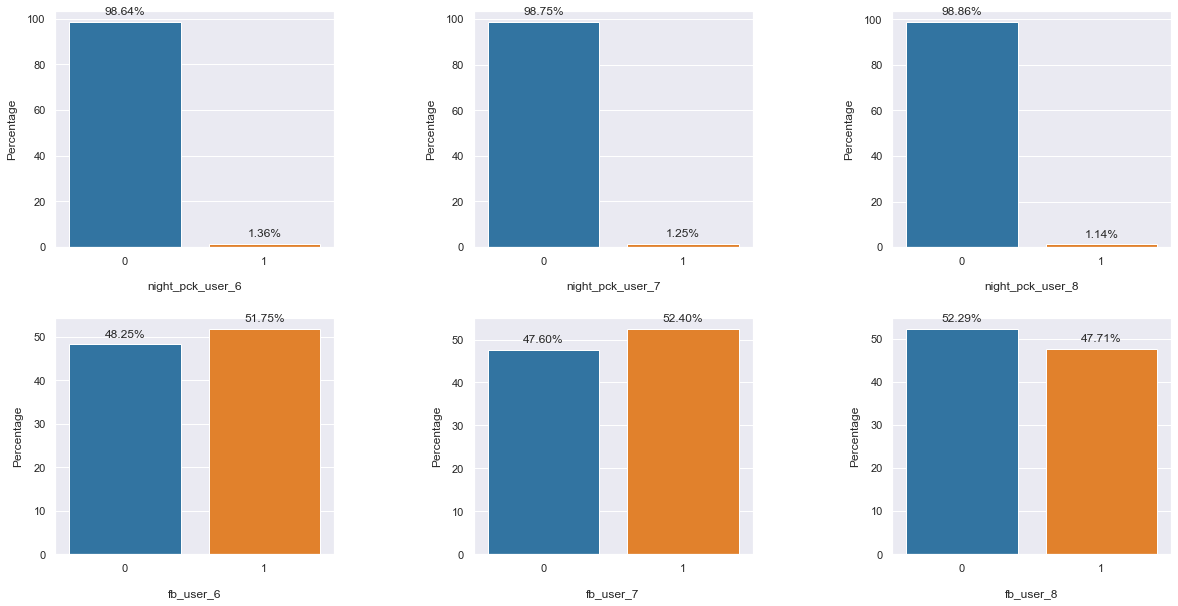

In [46]:
# Percent Plots for Analysing Categorical variables
counter = 1

plt.figure(figsize = (20, 10))

for col in cat_cols:
        
    series = round(((churn_hv[col].value_counts(dropna = False))/(len(churn_hv[col])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col, labelpad = 15)
    plt.ylabel('Percentage', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1

del cat_cols, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

### Univariate Analysis for Numerical Variables:

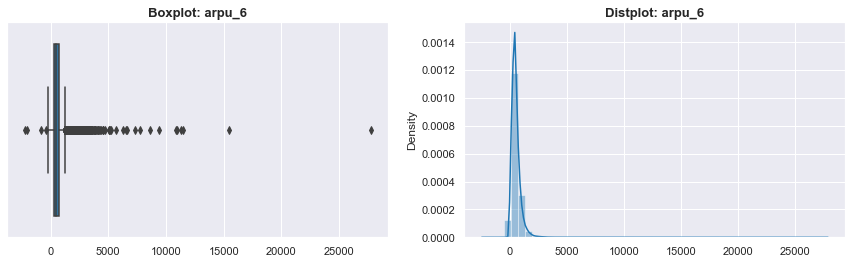

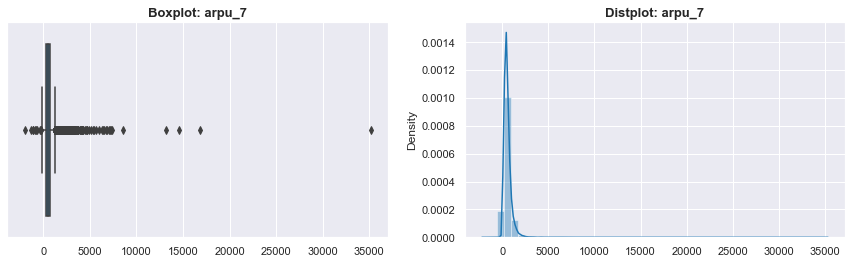

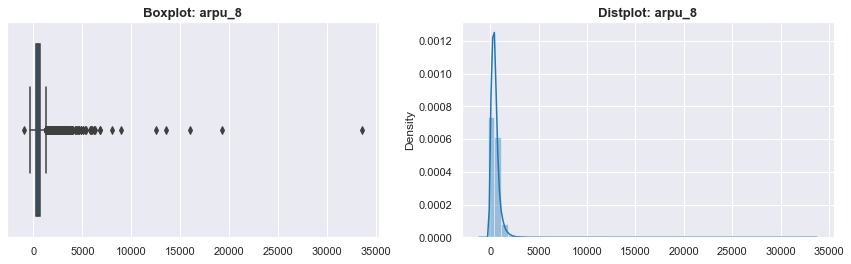

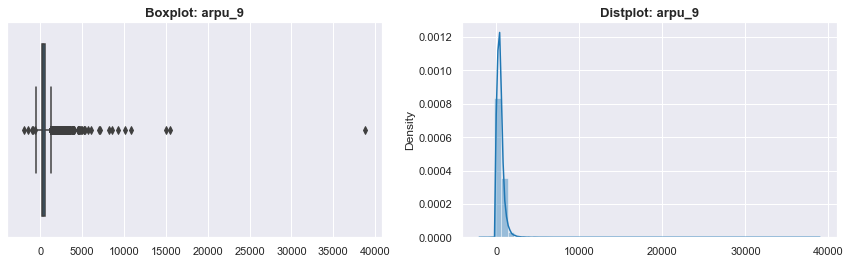

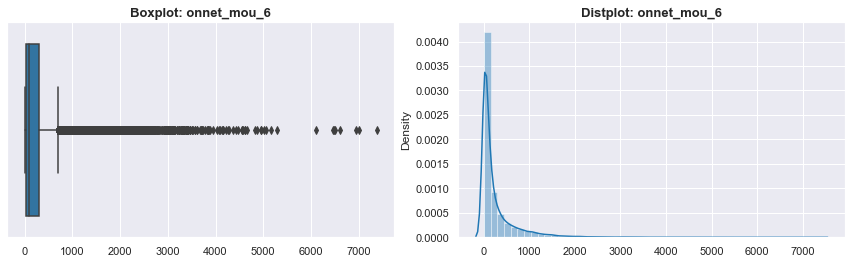

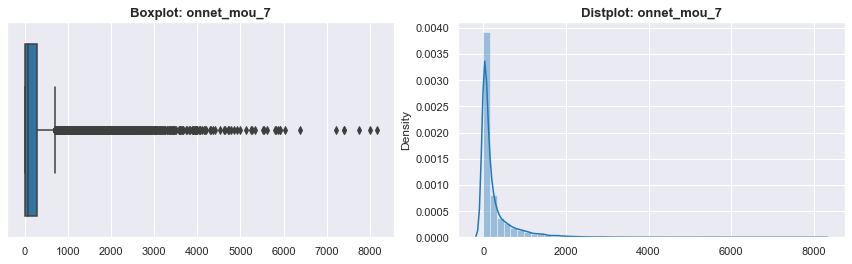

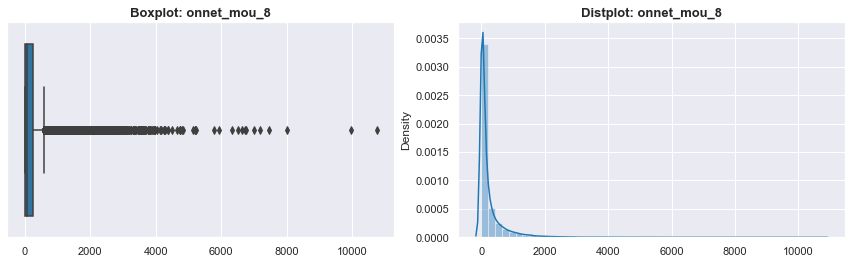

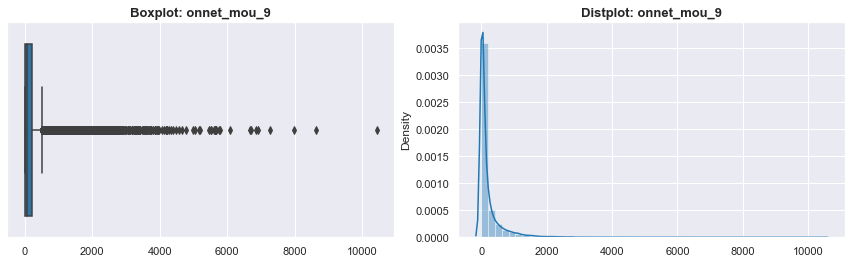

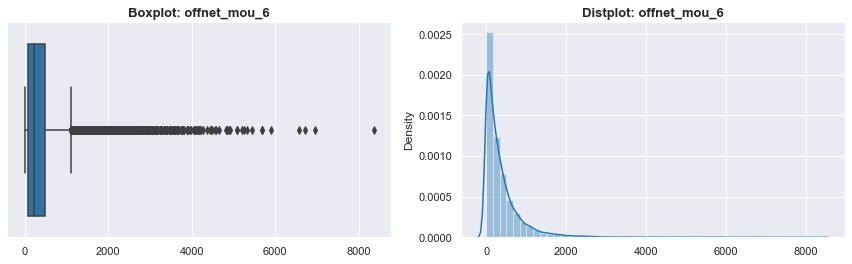

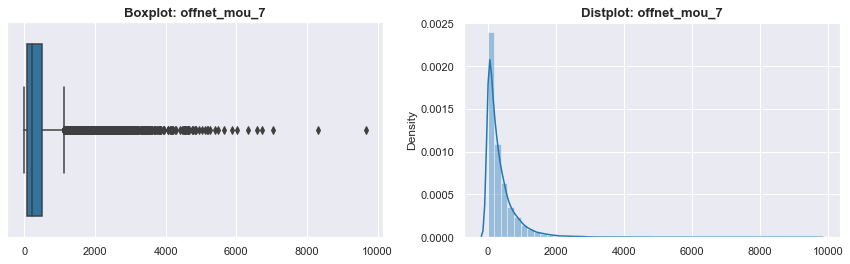

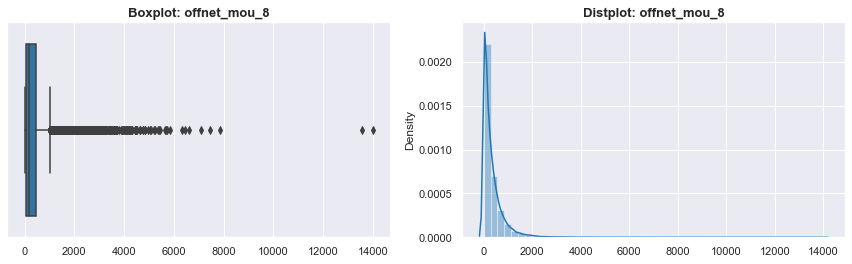

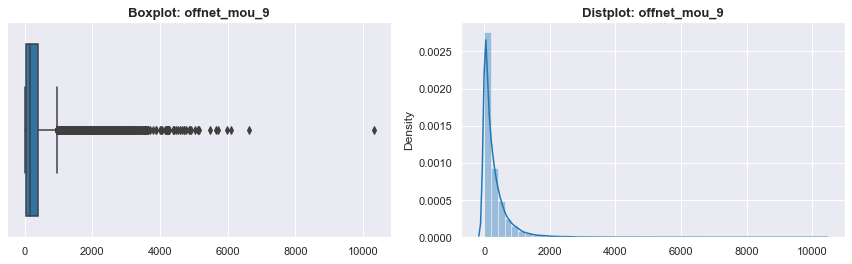

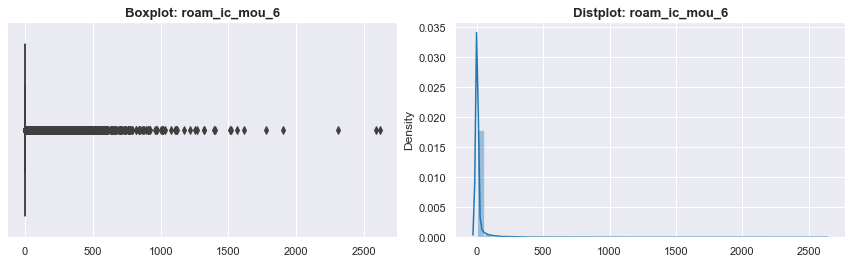

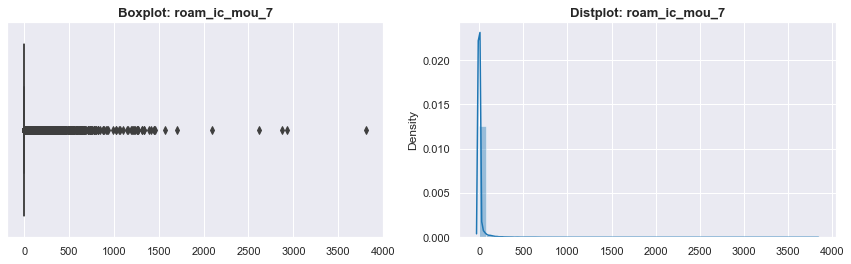

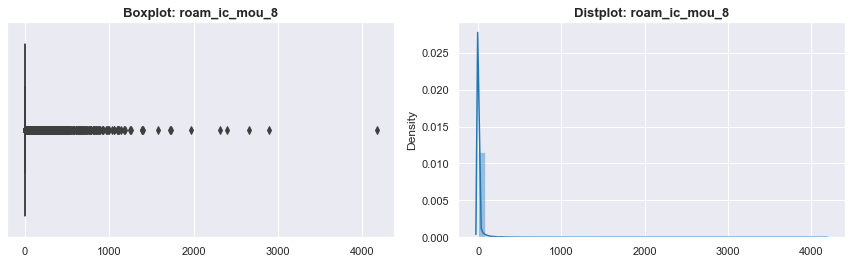

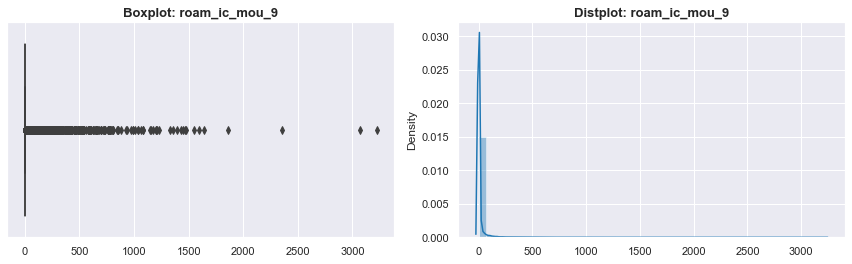

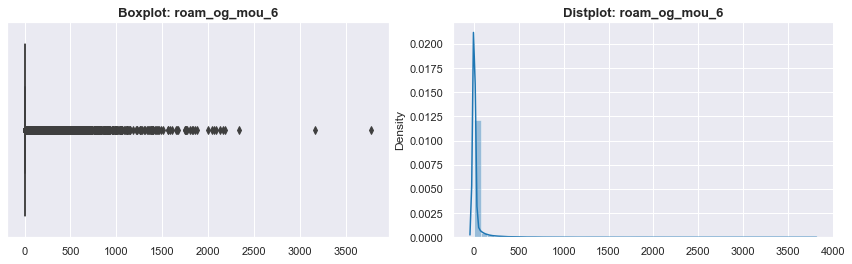

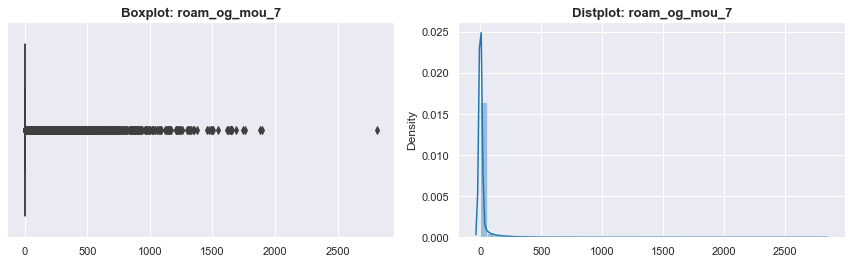

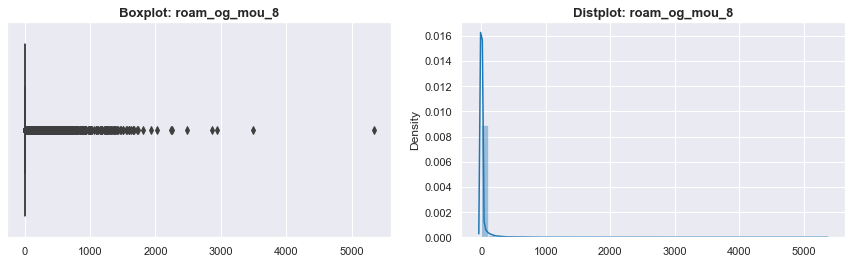

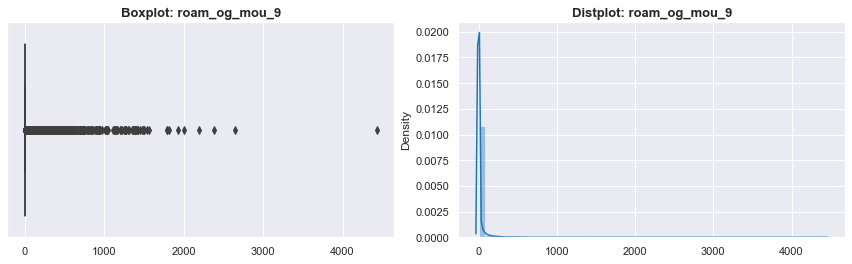

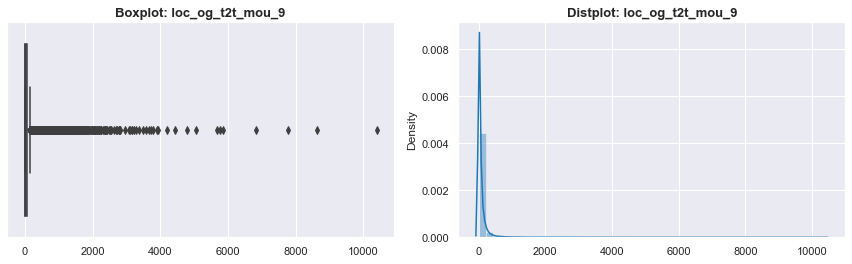

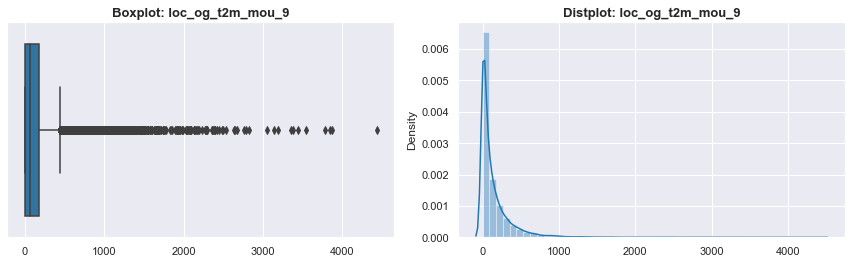

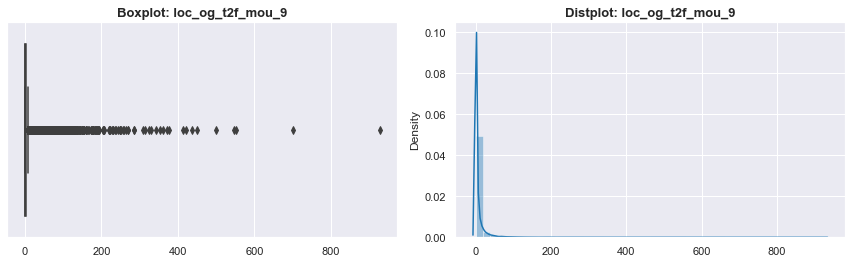

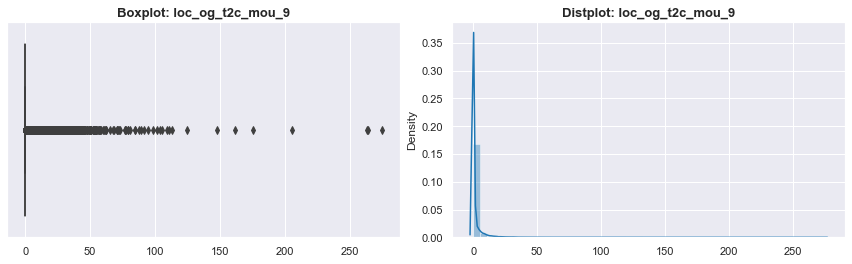

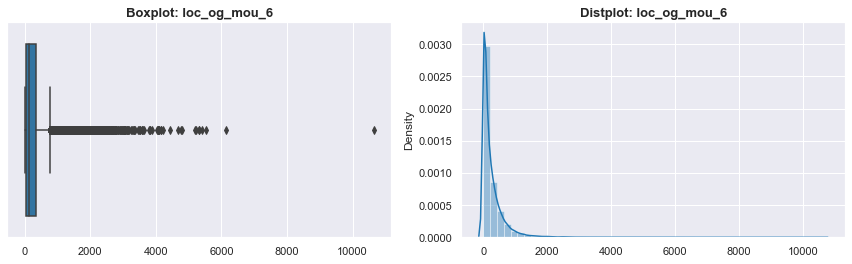

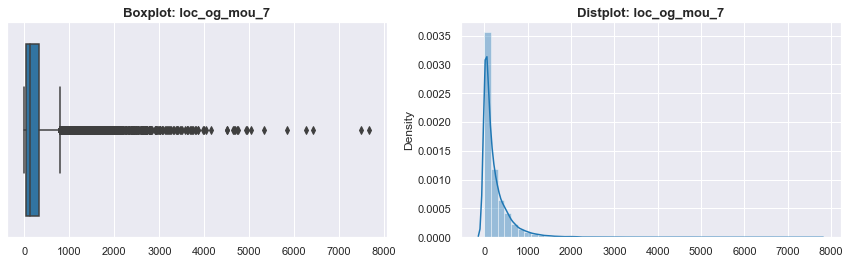

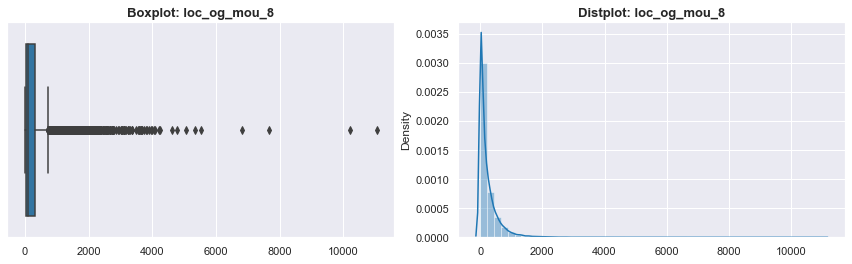

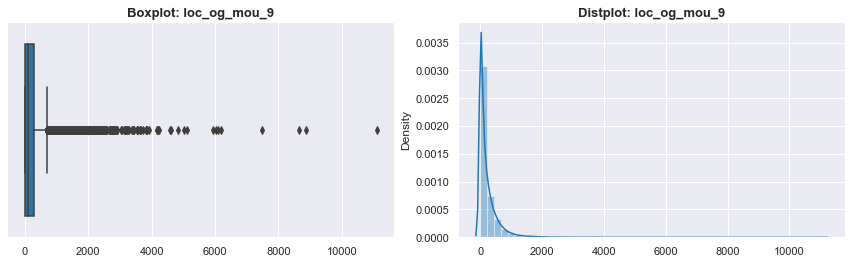

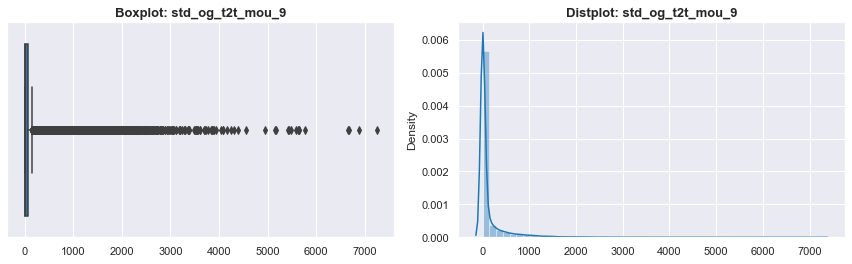

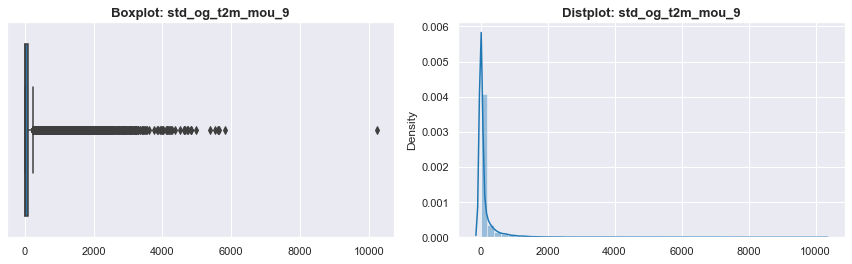

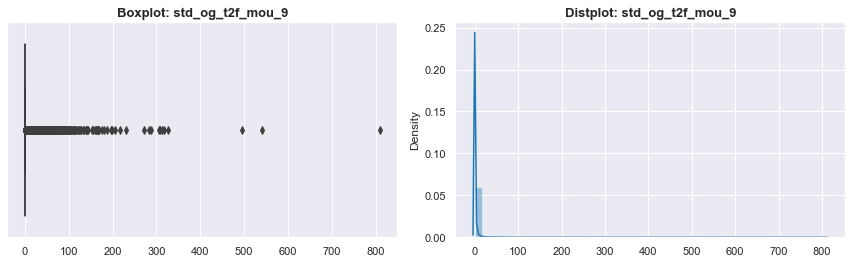

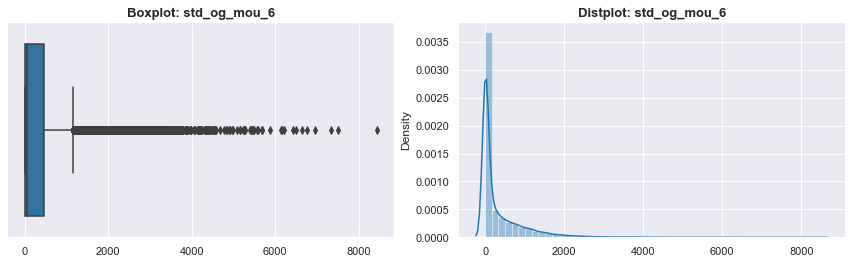

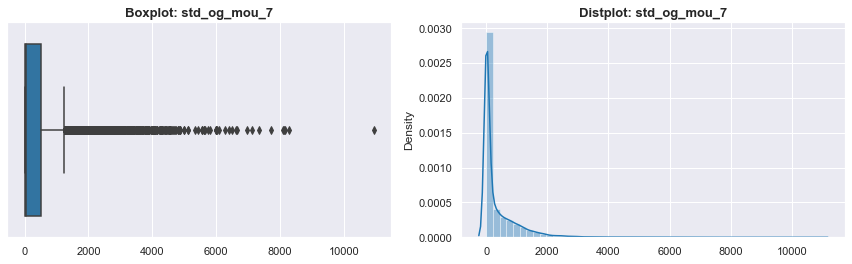

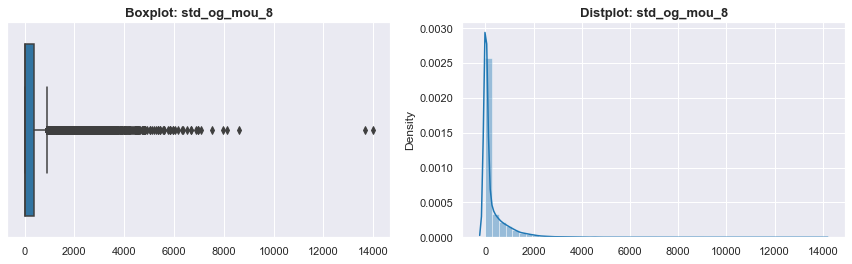

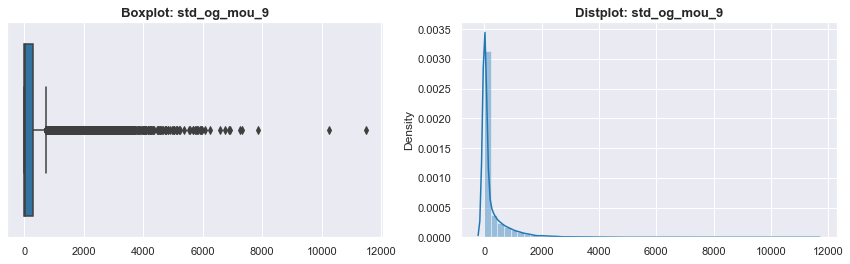

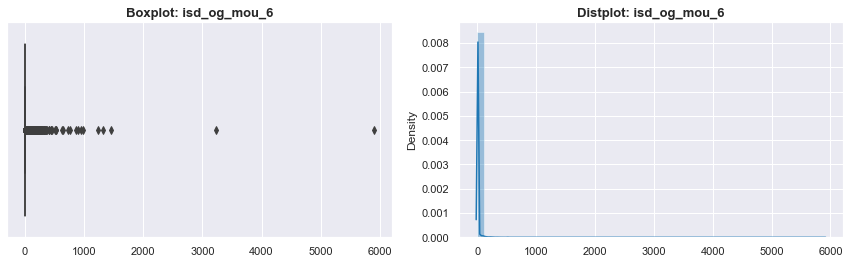

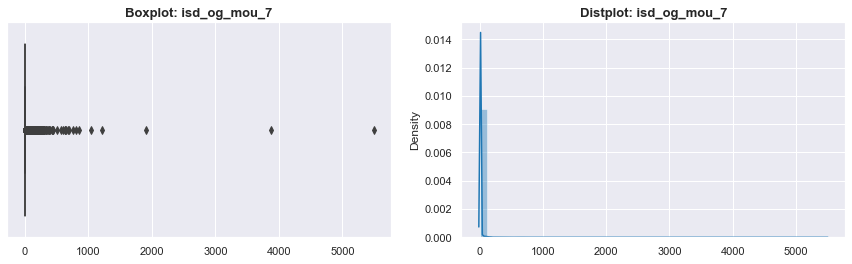

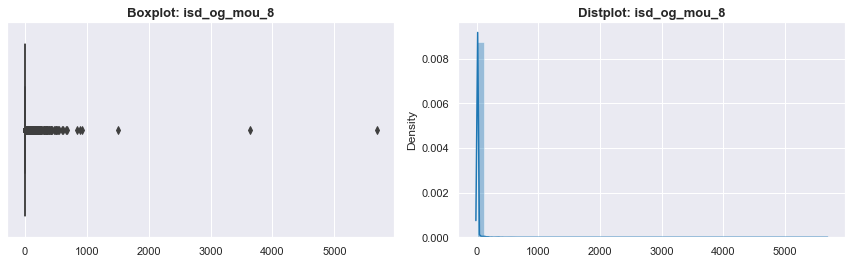

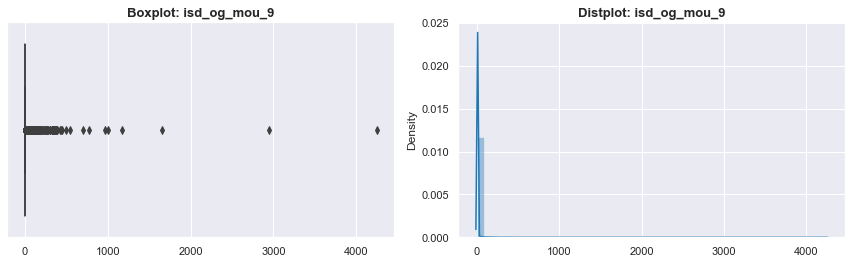

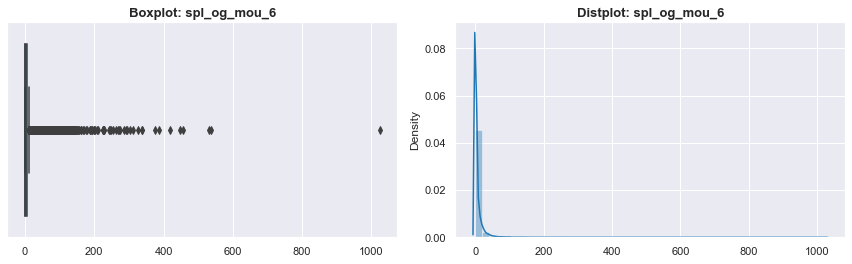

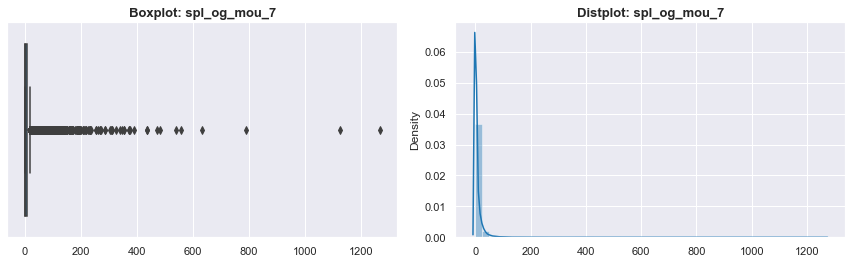

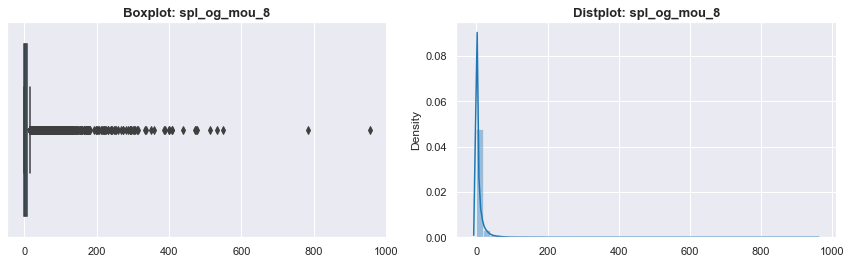

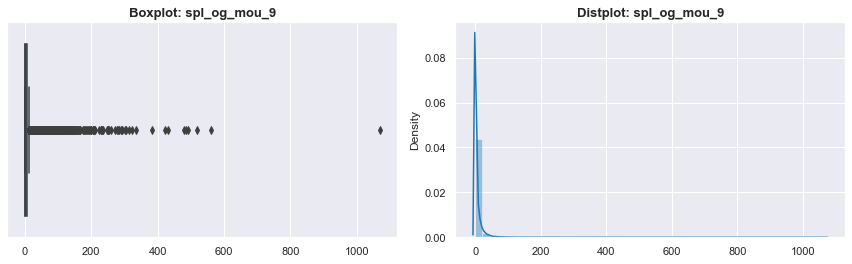

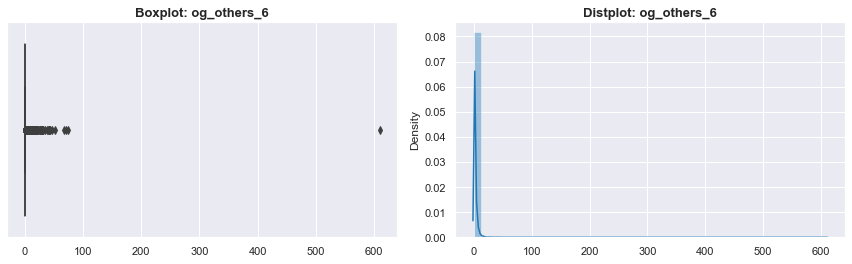

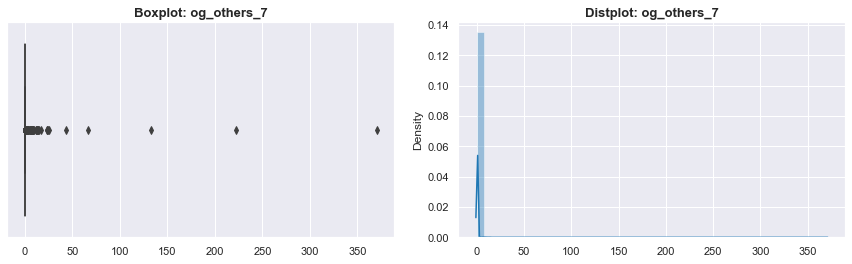

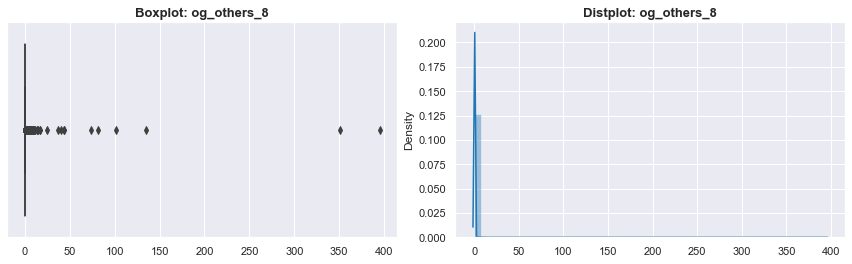

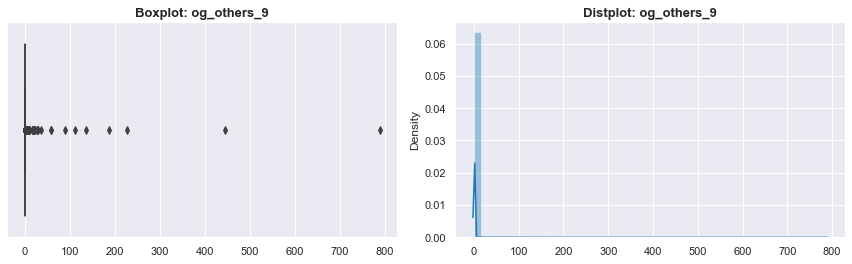

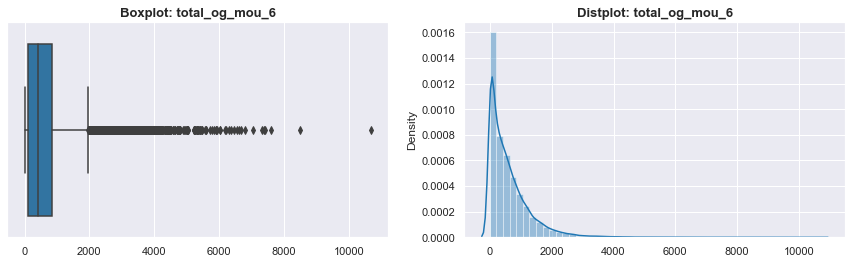

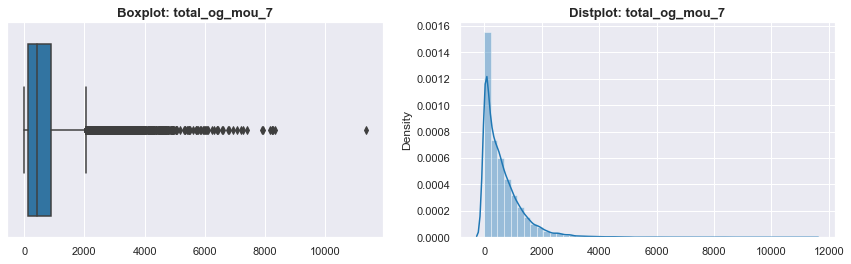

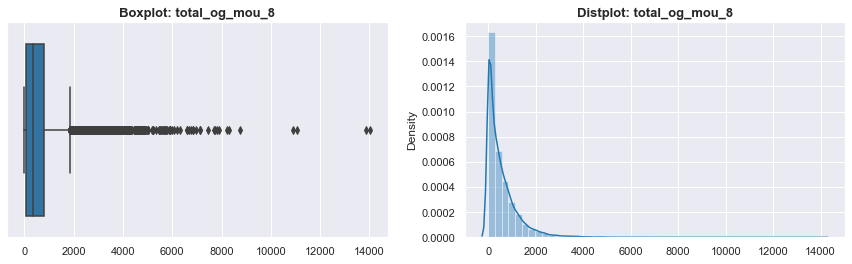

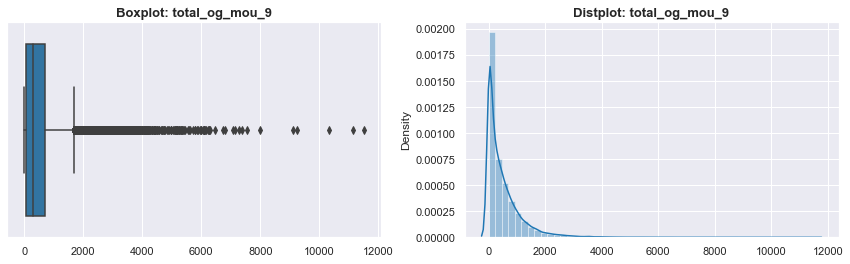

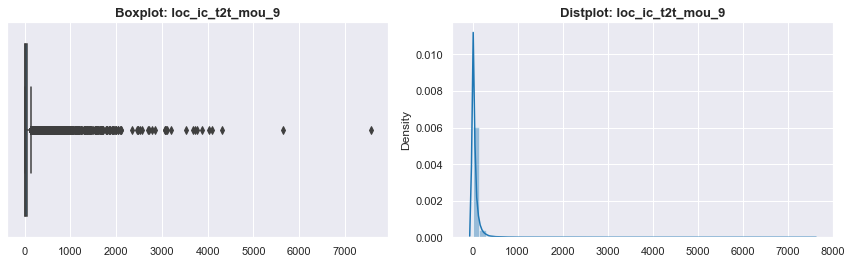

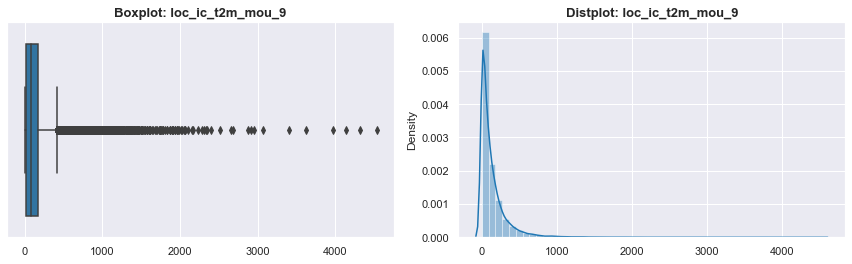

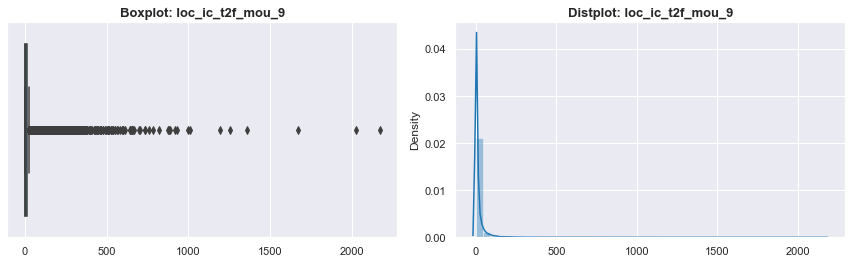

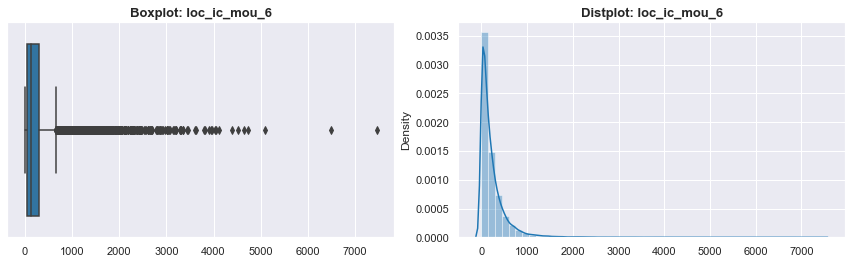

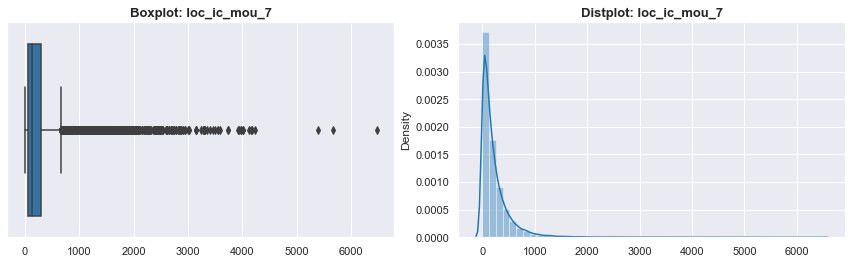

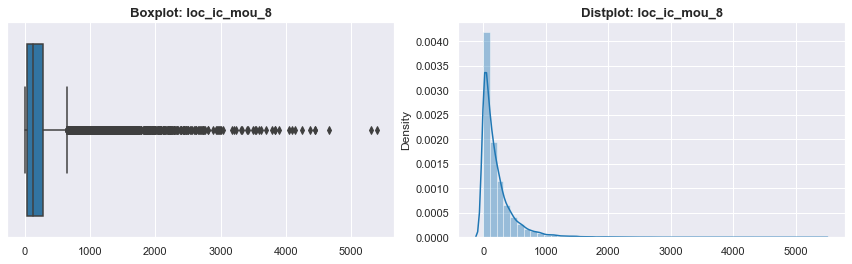

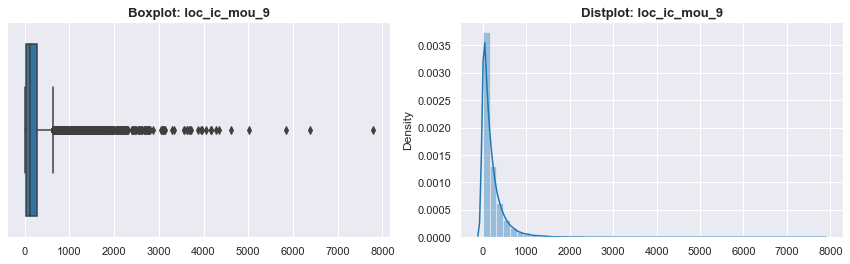

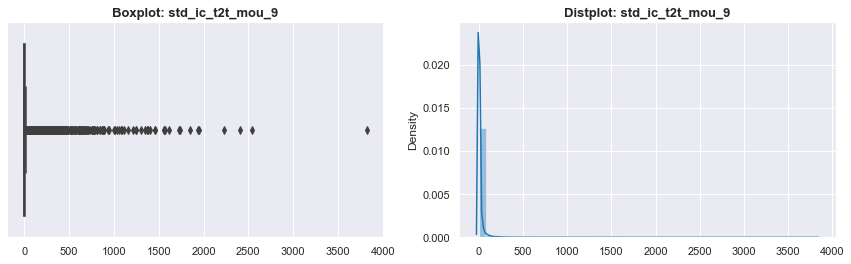

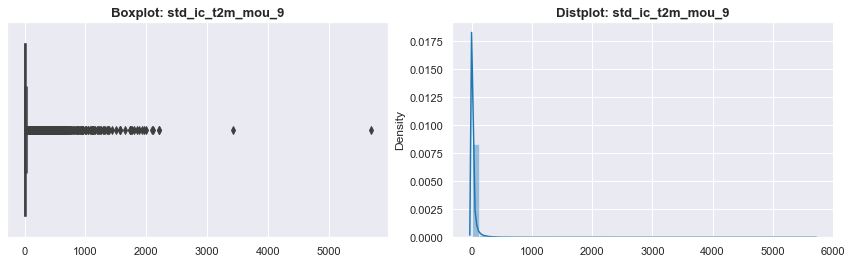

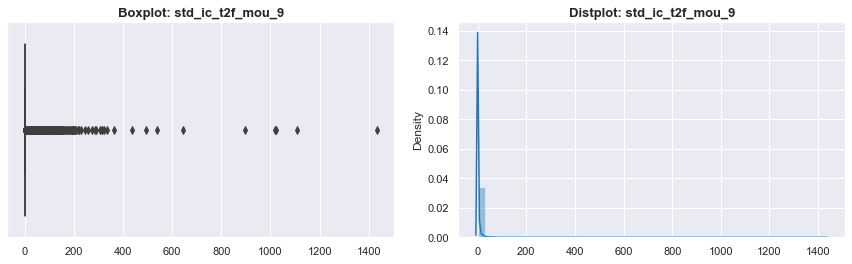

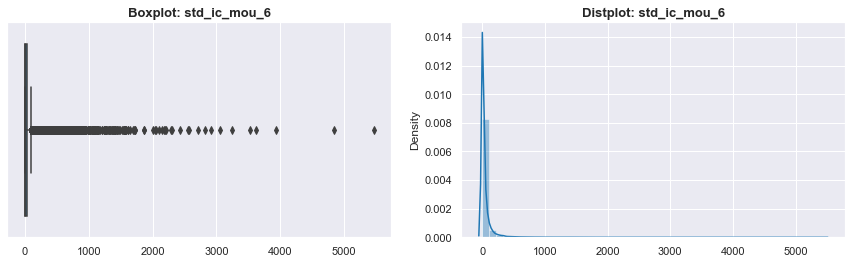

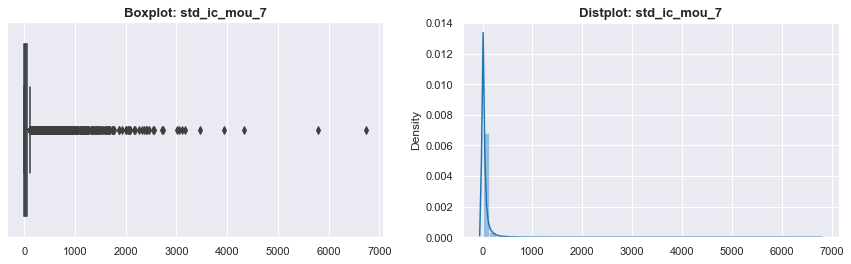

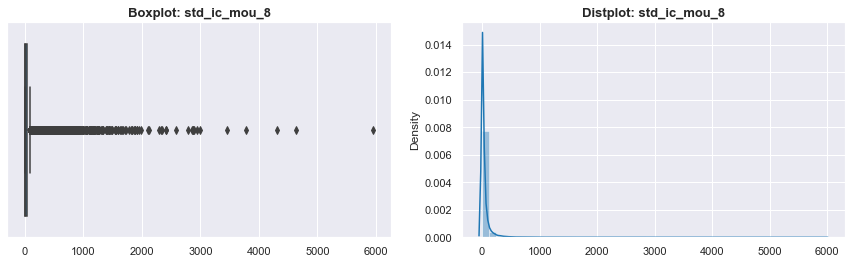

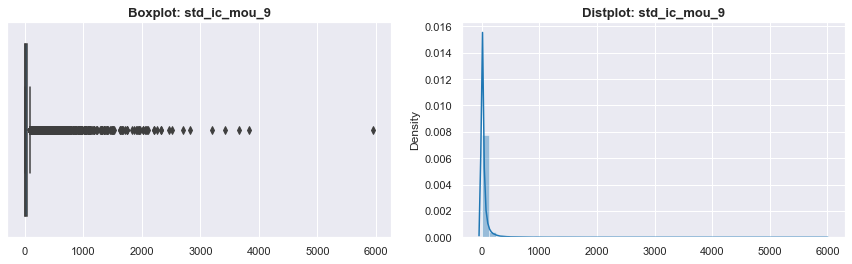

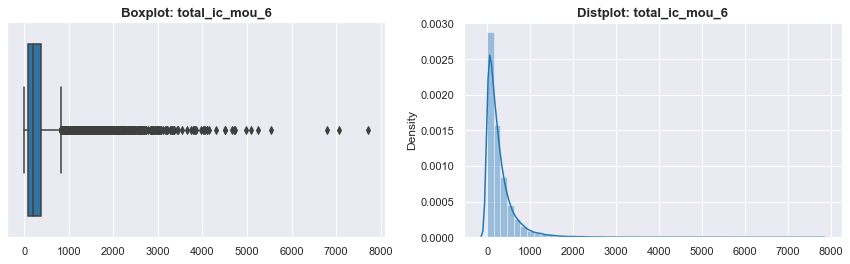

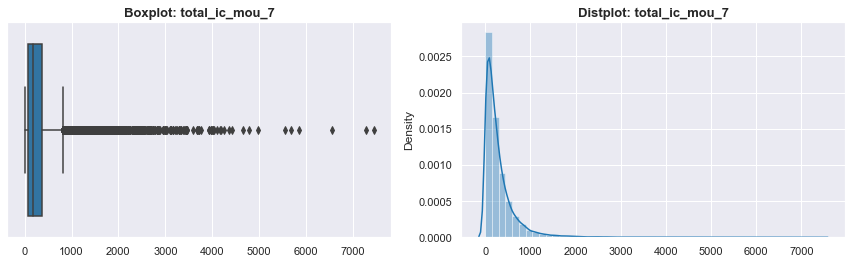

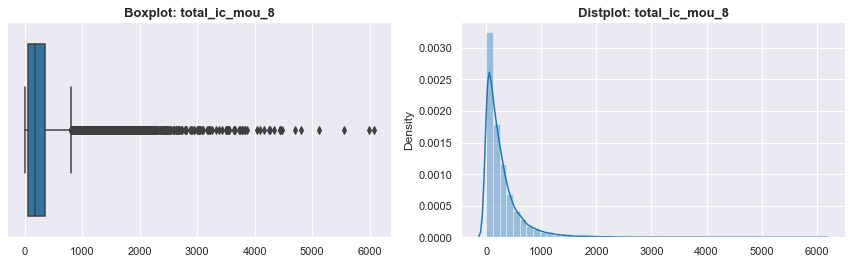

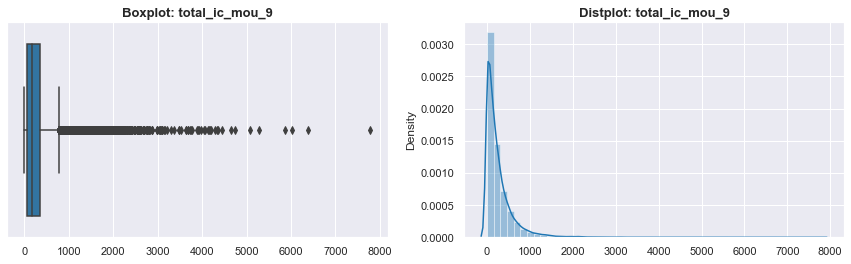

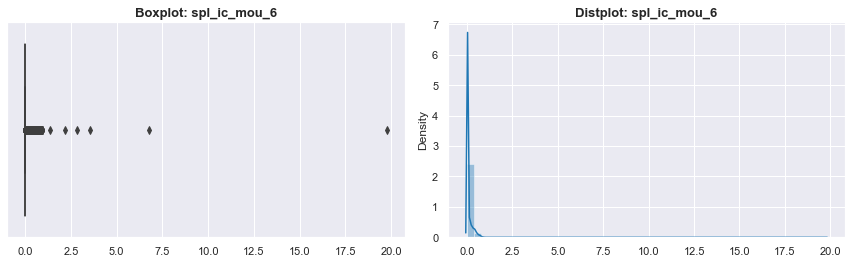

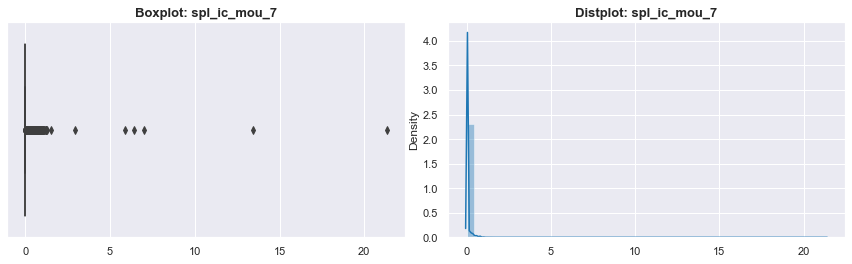

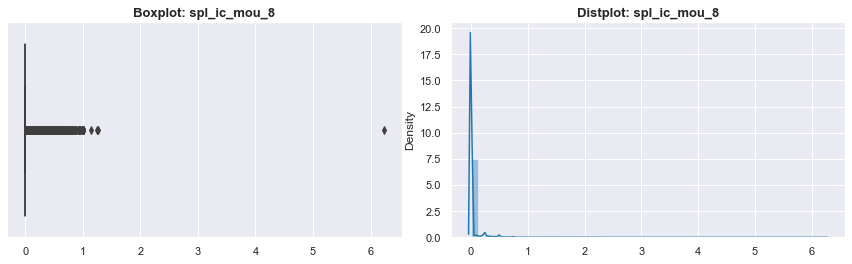

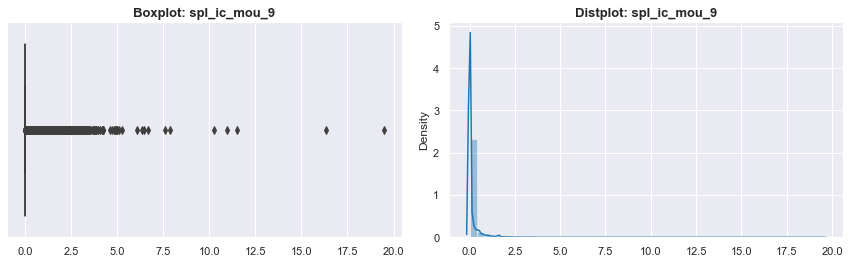

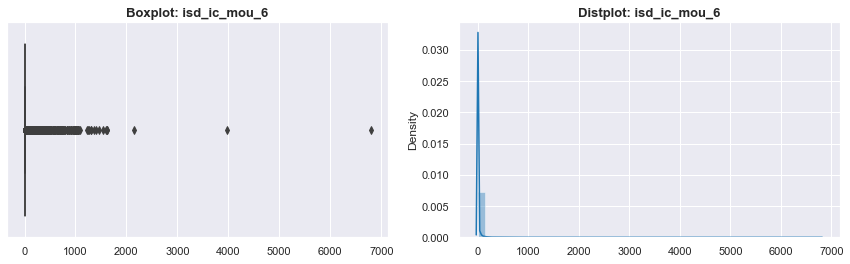

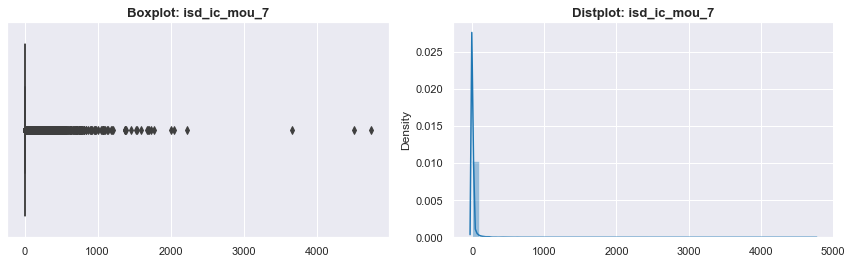

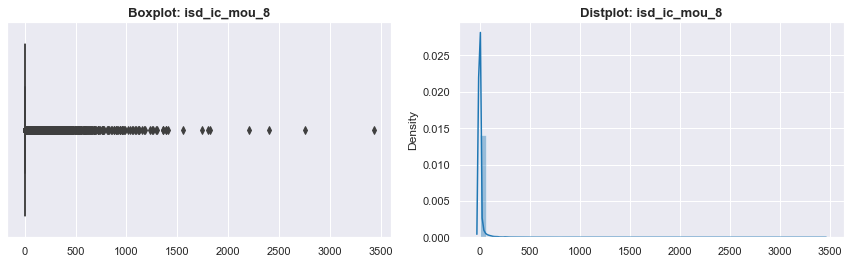

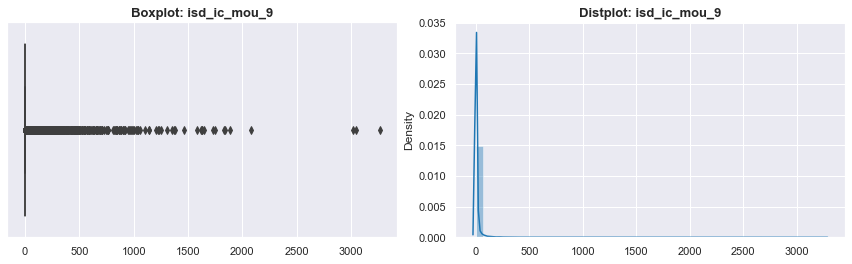

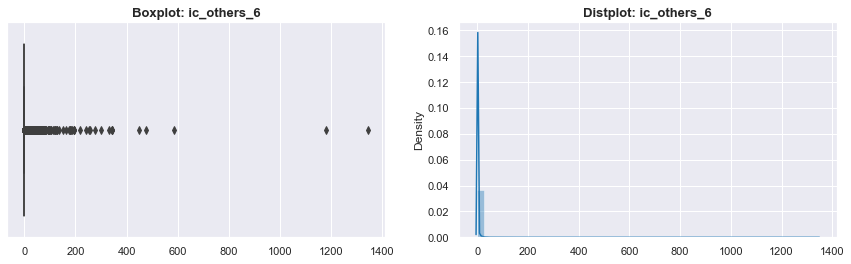

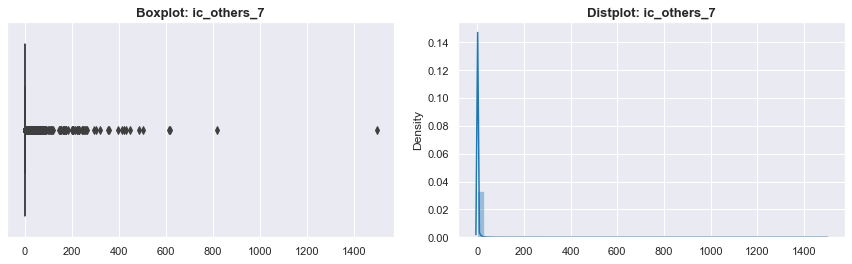

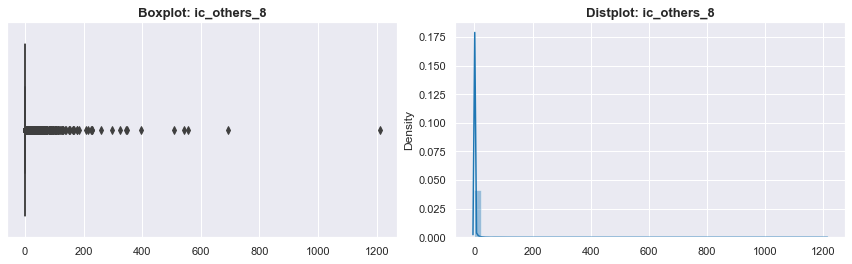

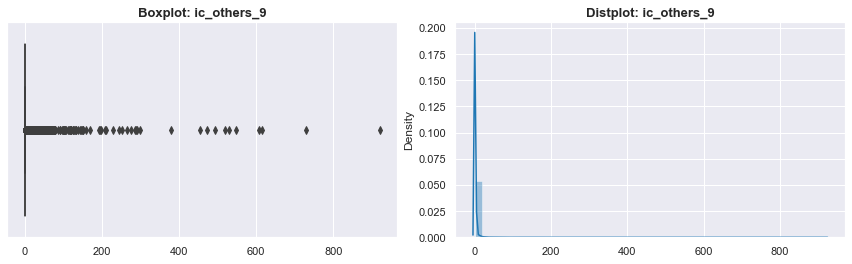

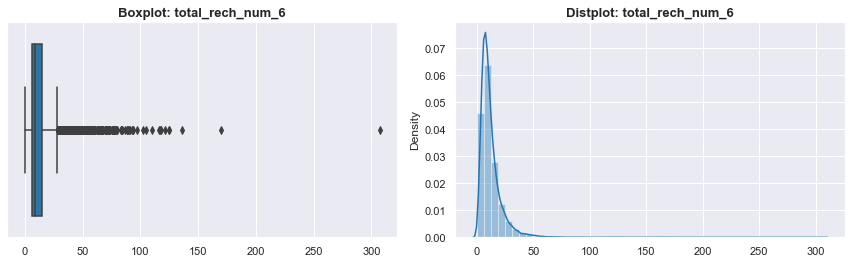

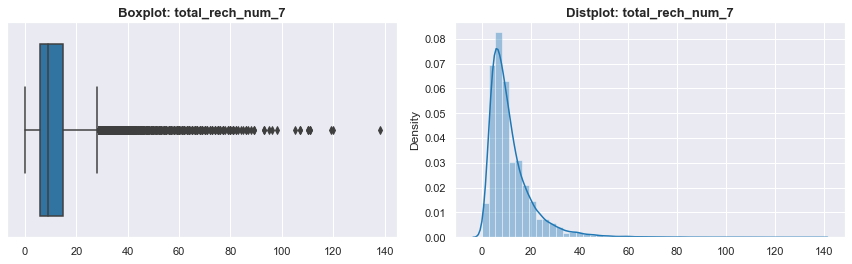

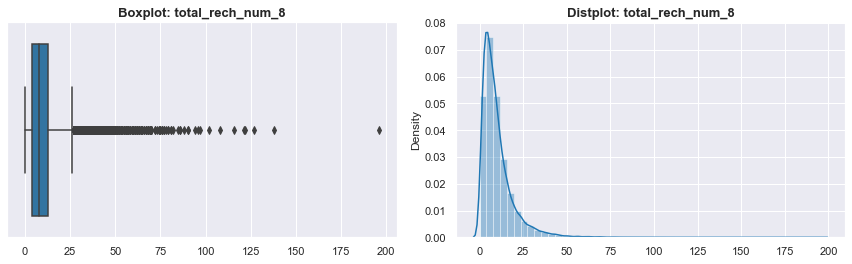

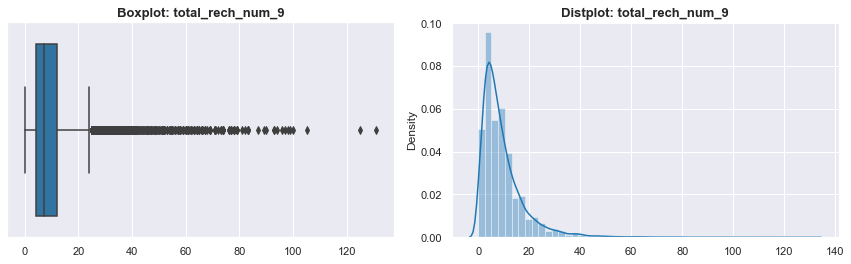

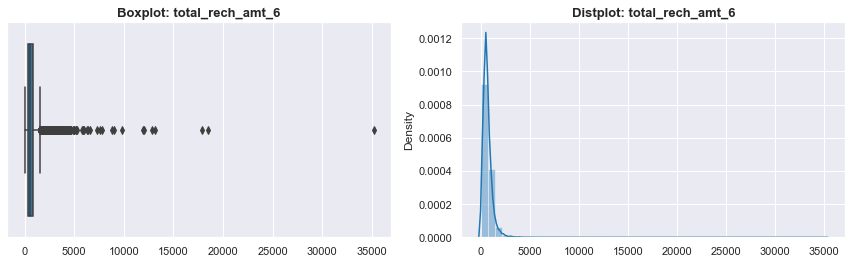

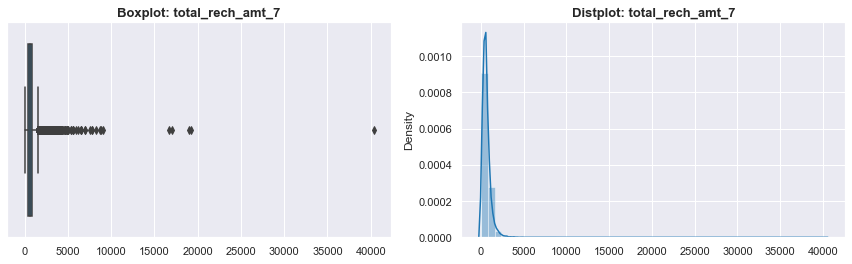

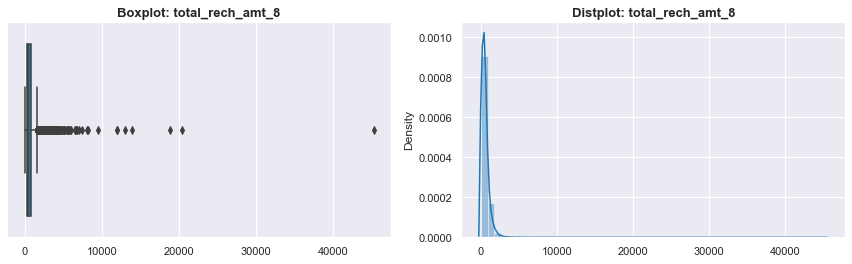

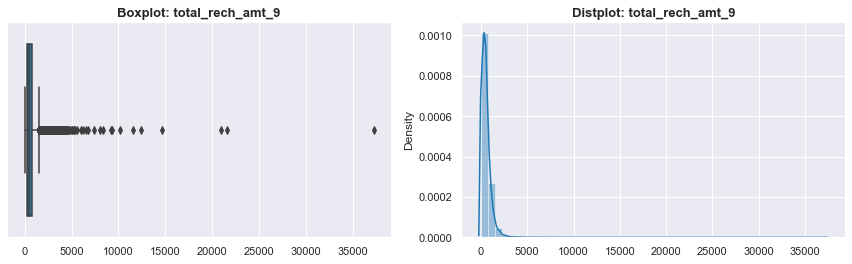

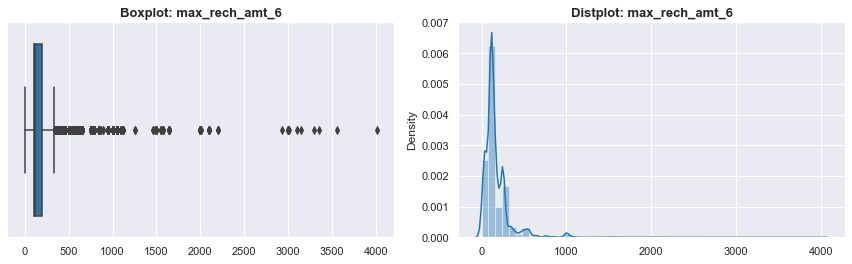

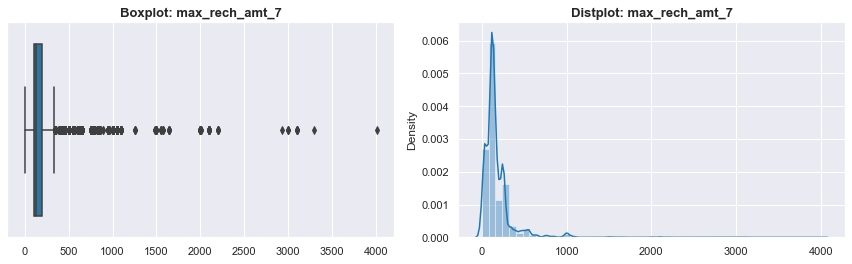

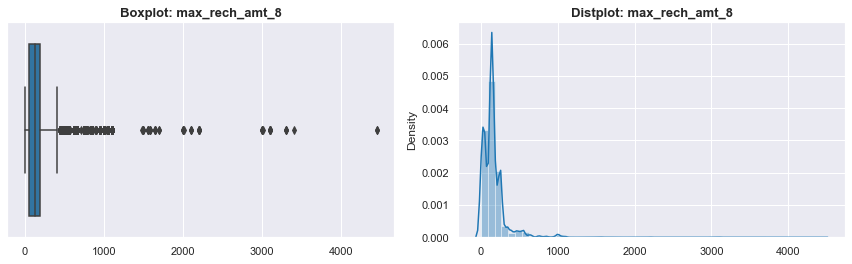

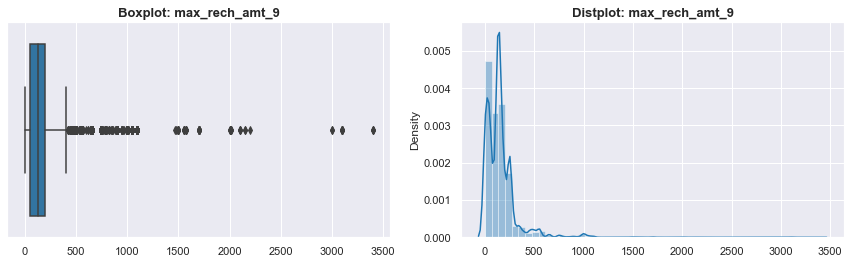

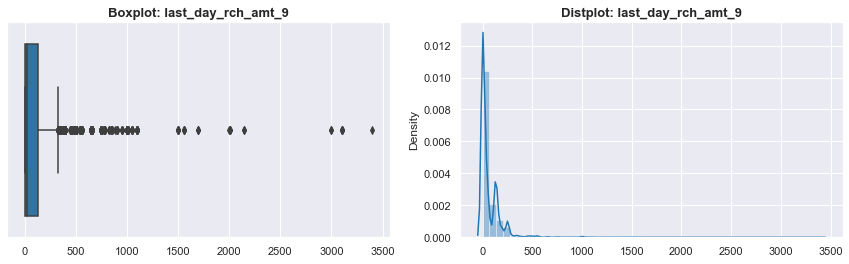

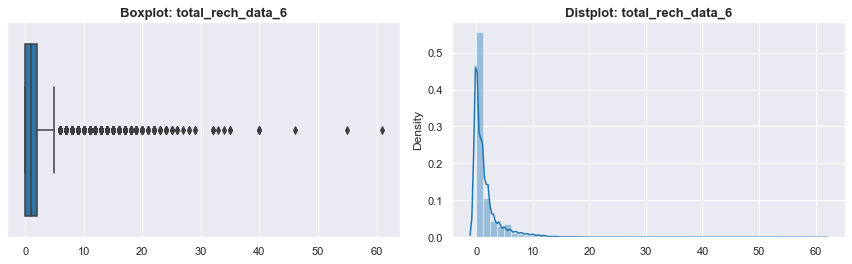

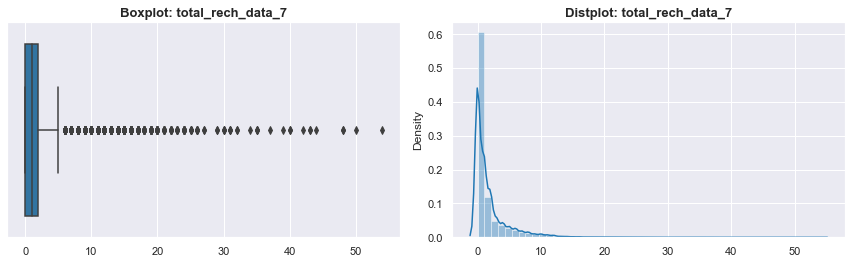

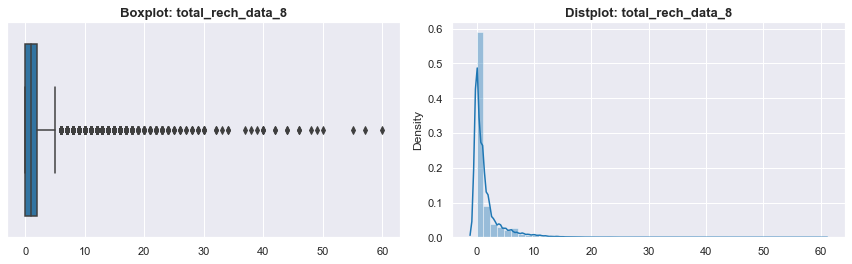

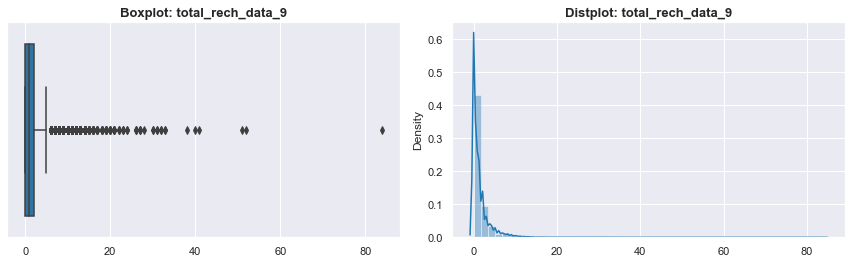

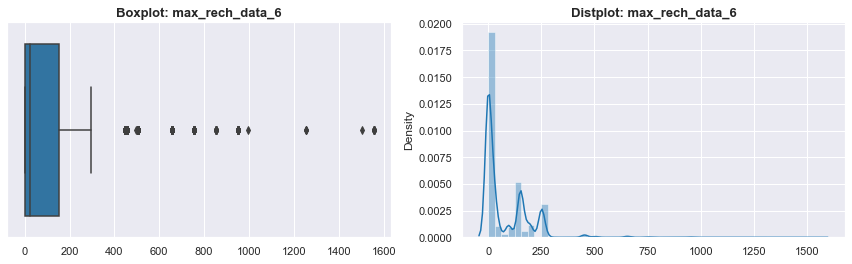

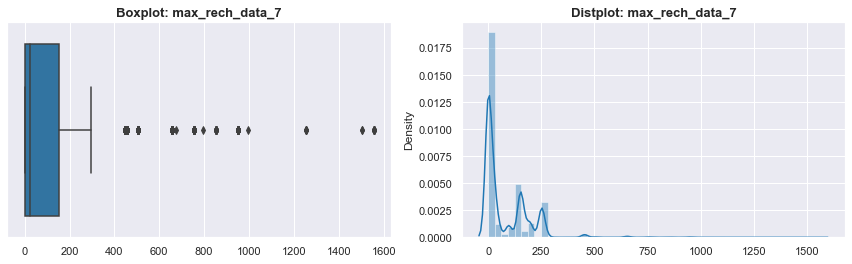

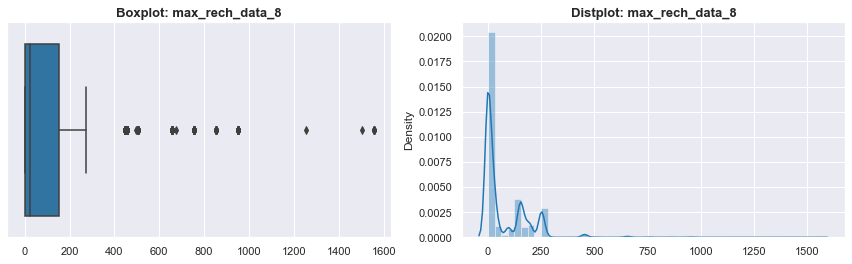

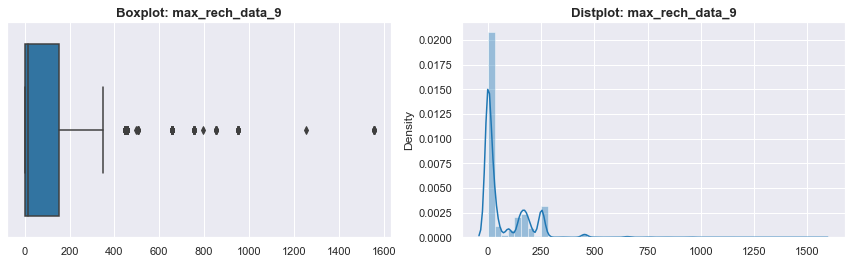

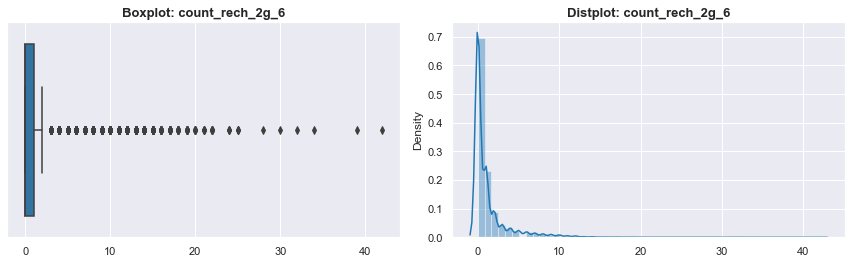

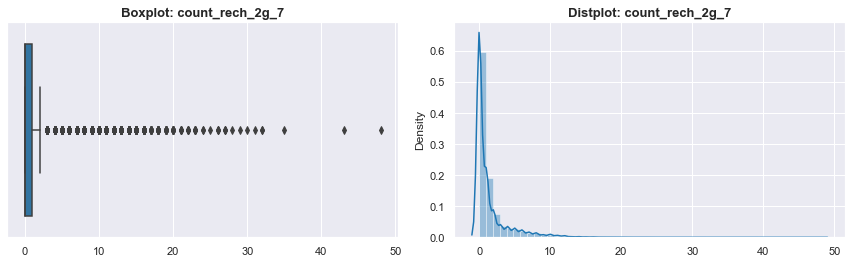

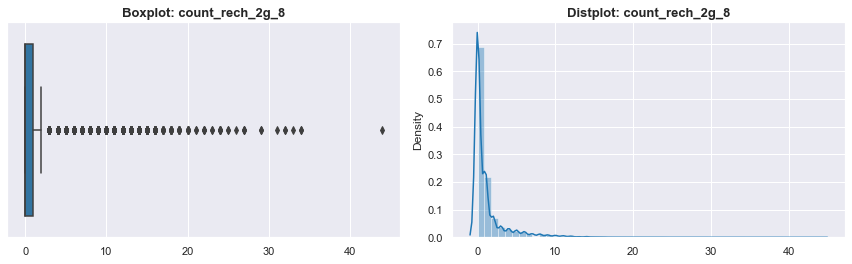

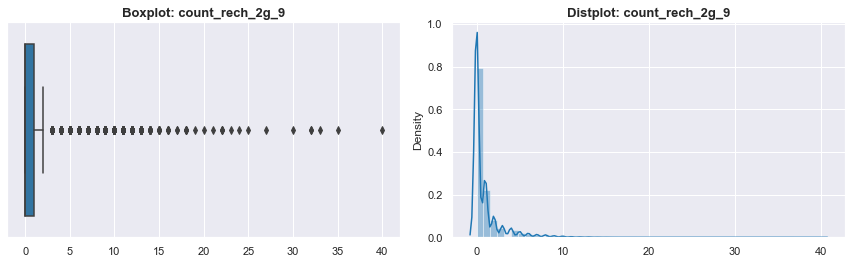

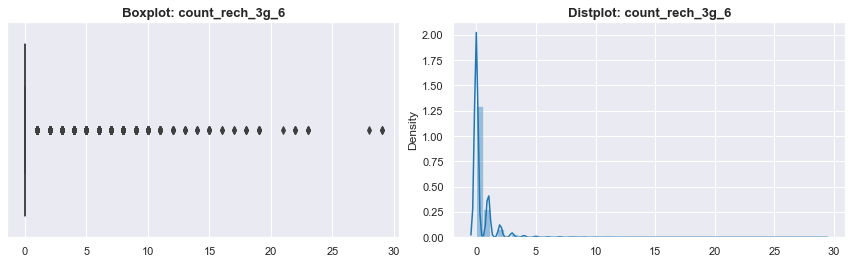

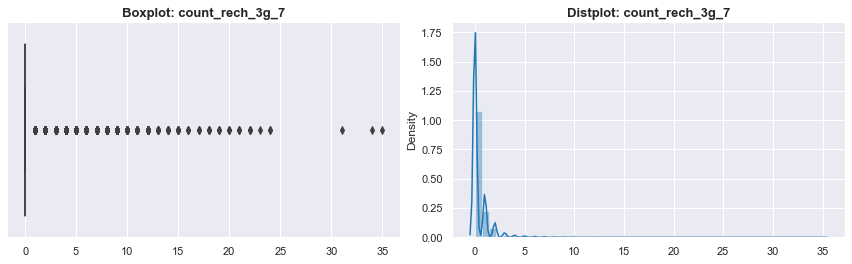

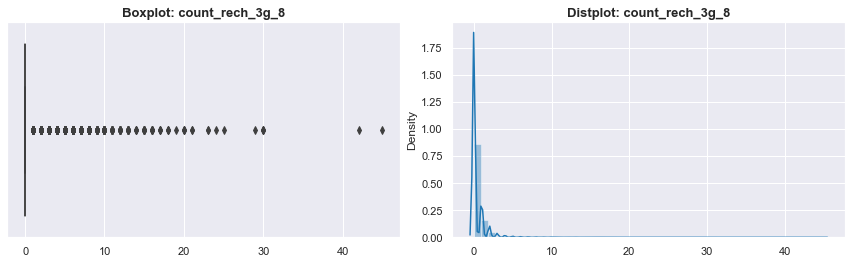

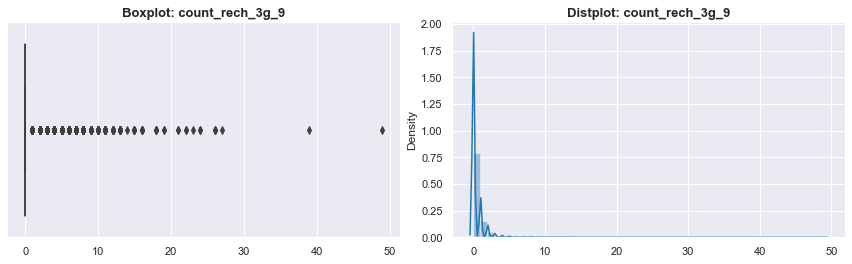

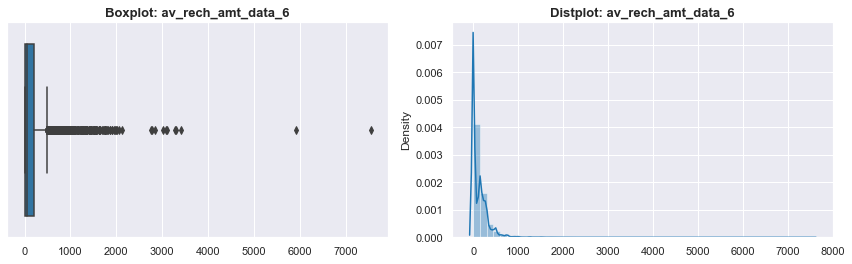

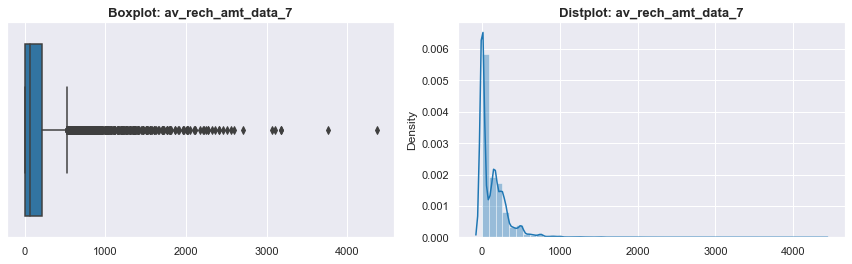

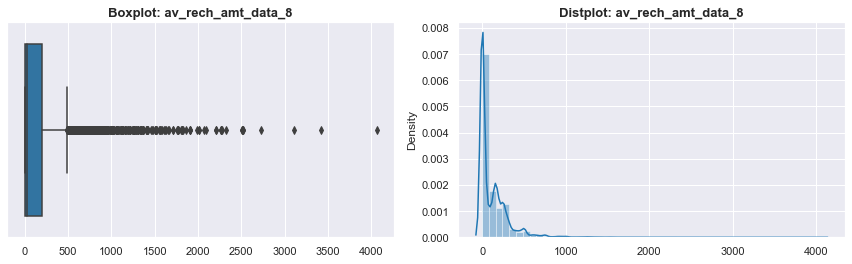

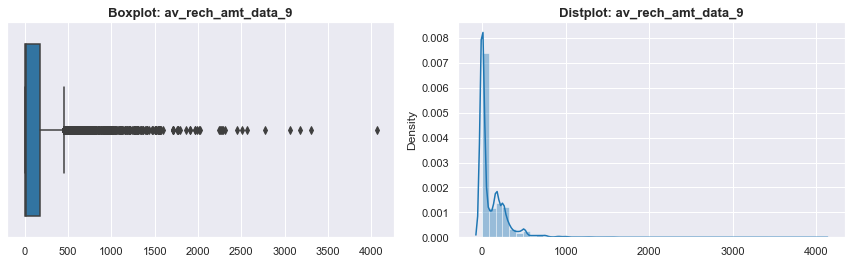

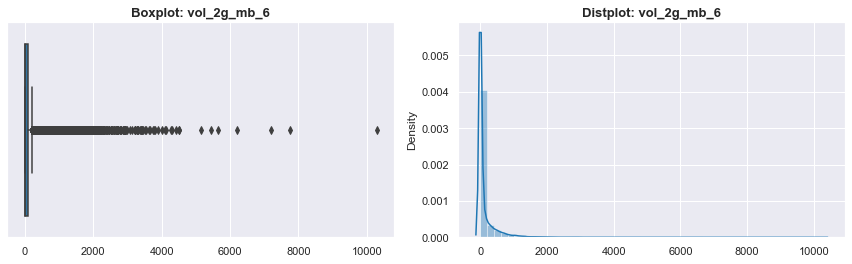

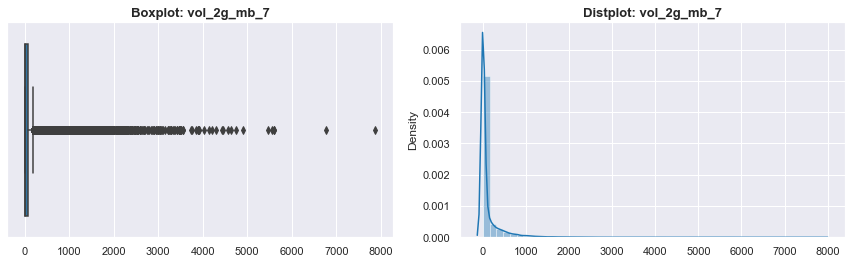

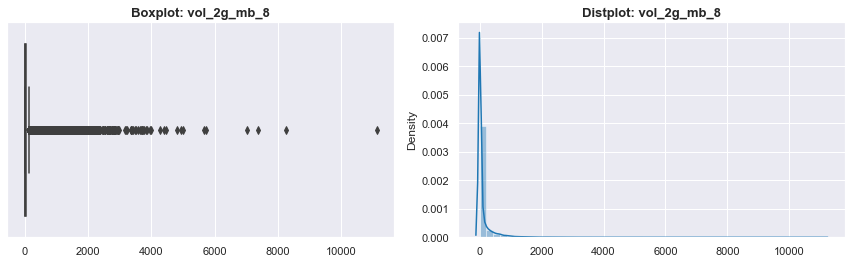

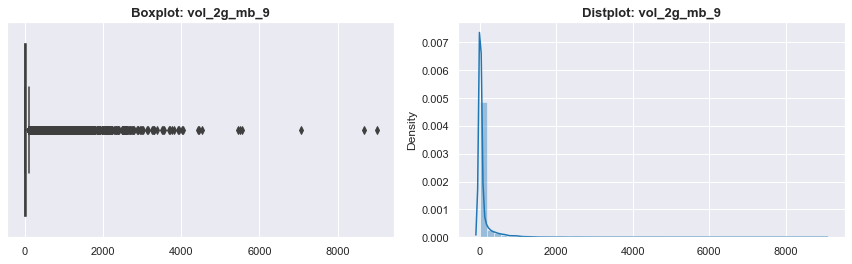

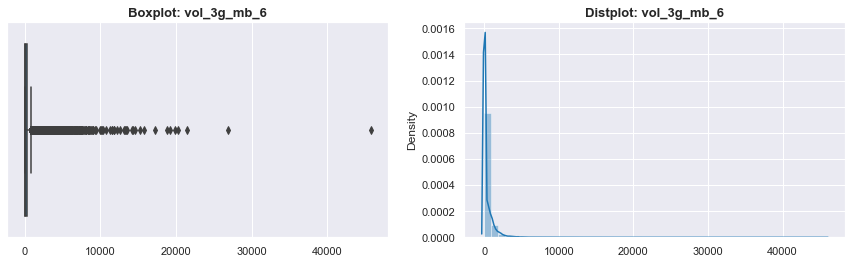

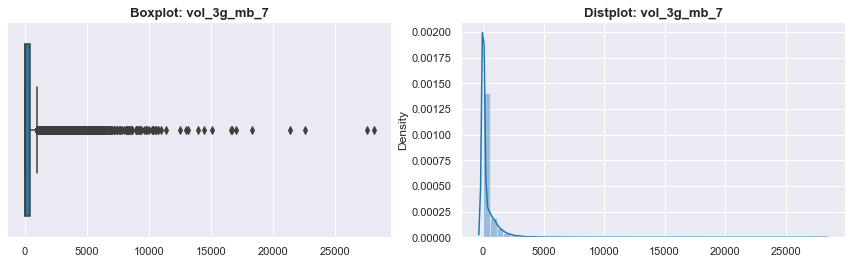

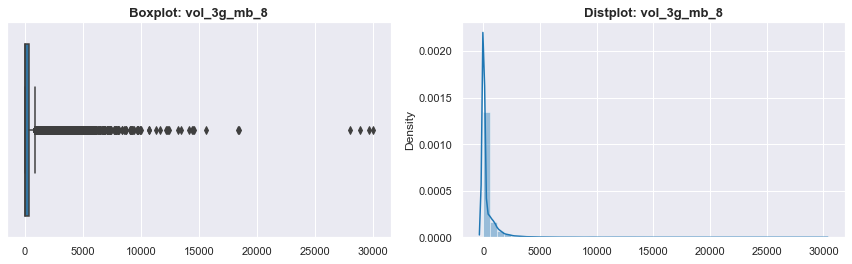

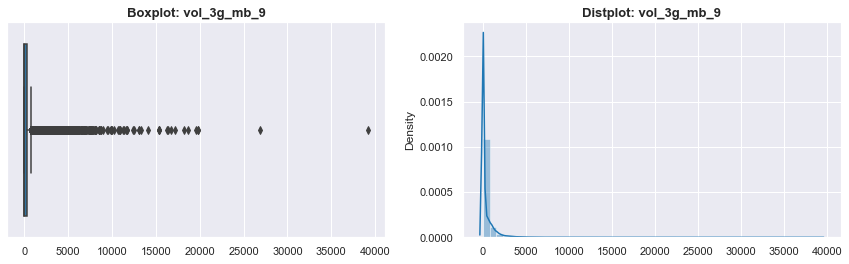

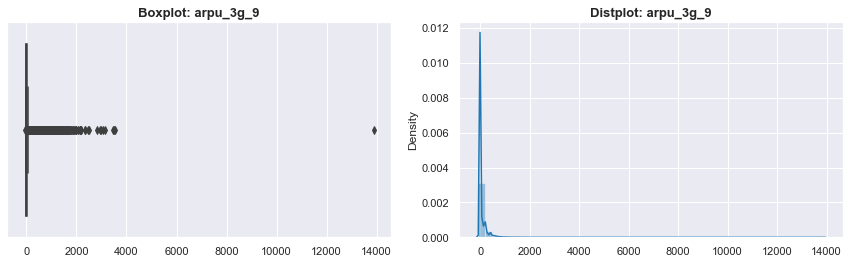

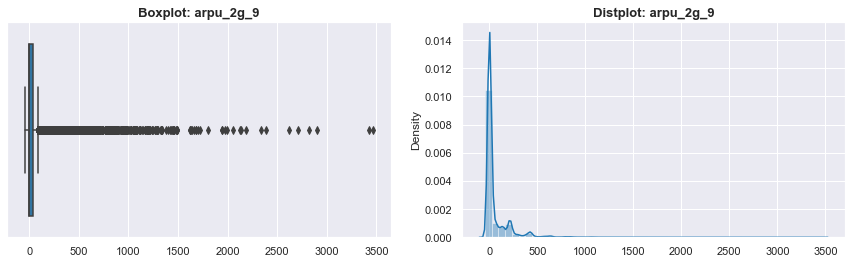

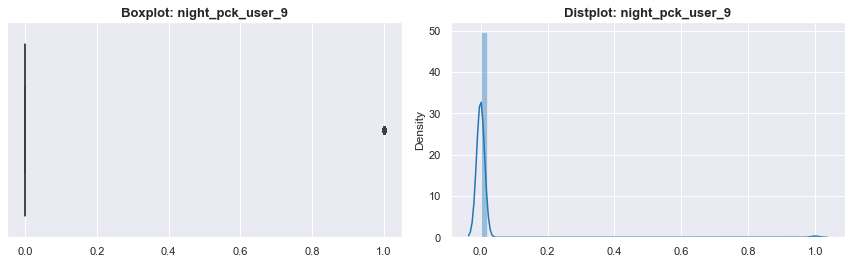

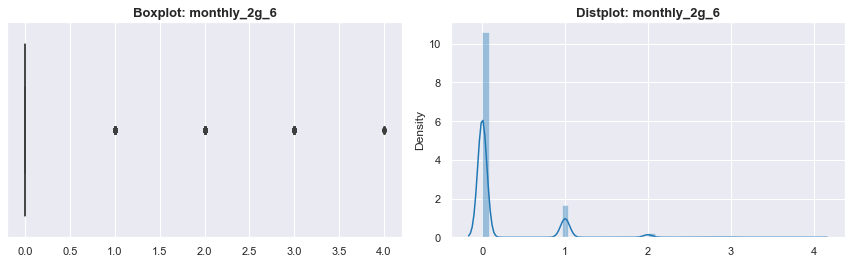

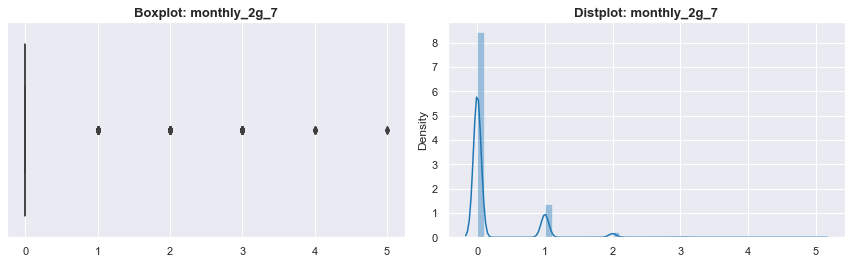

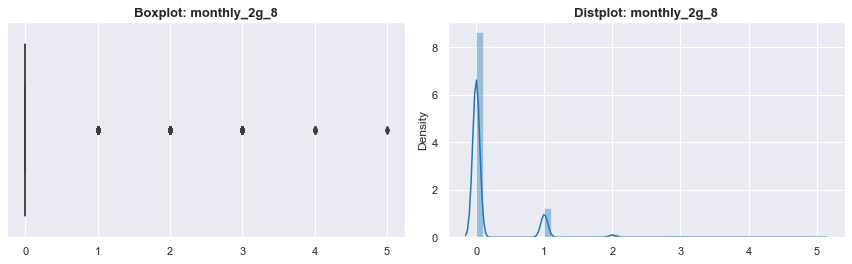

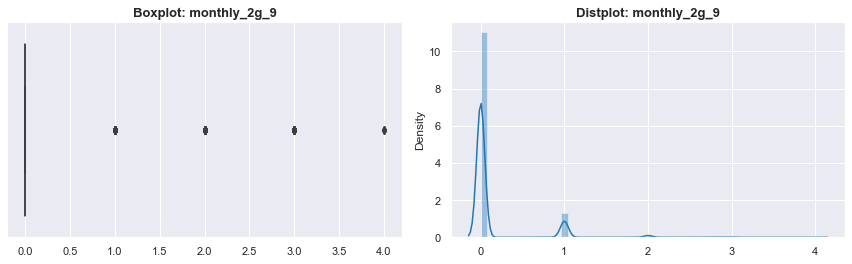

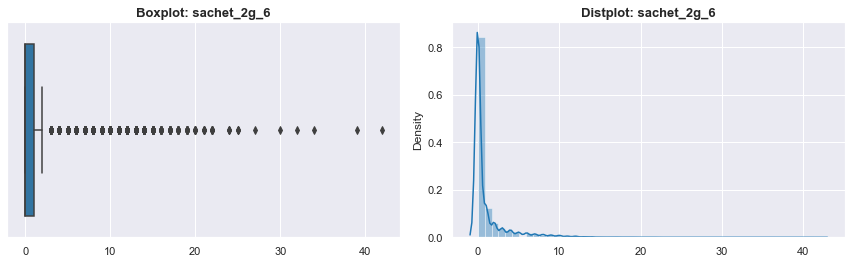

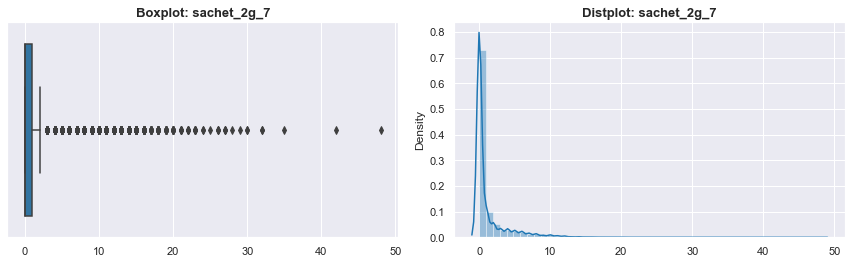

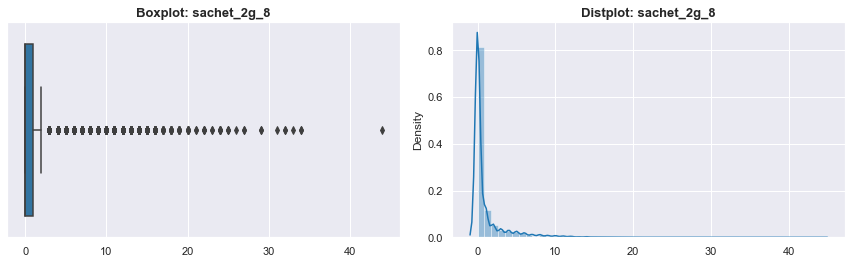

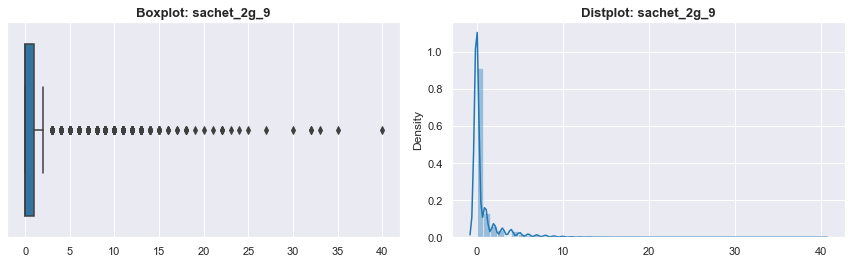

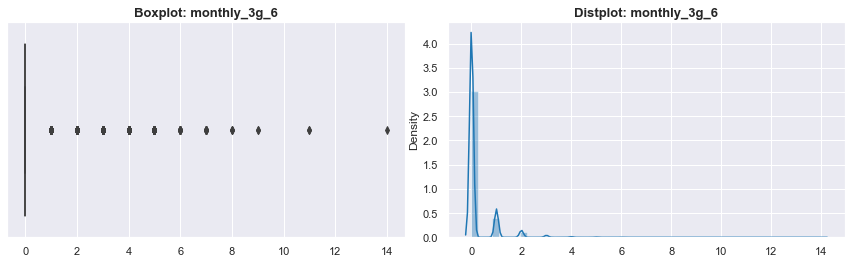

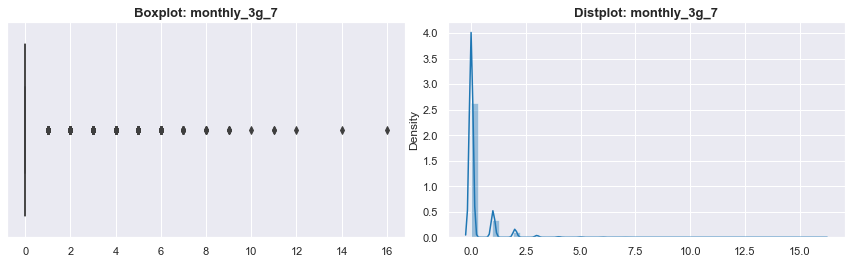

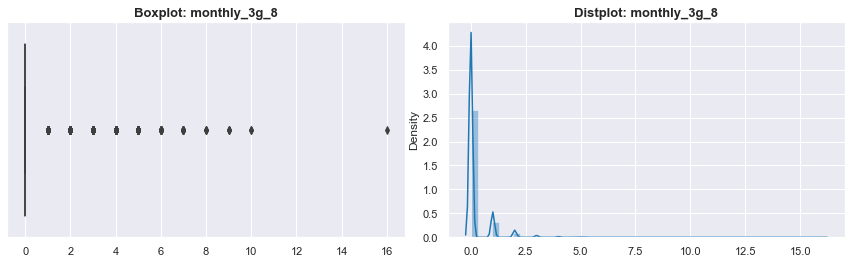

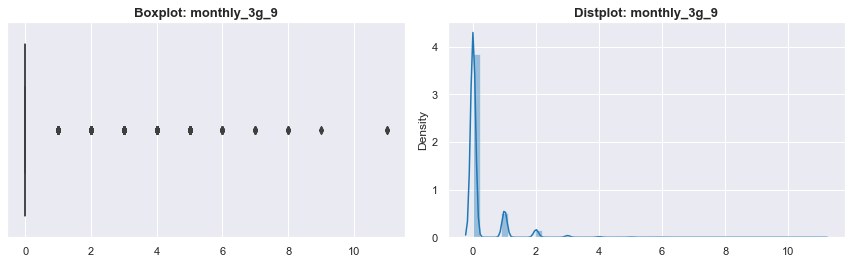

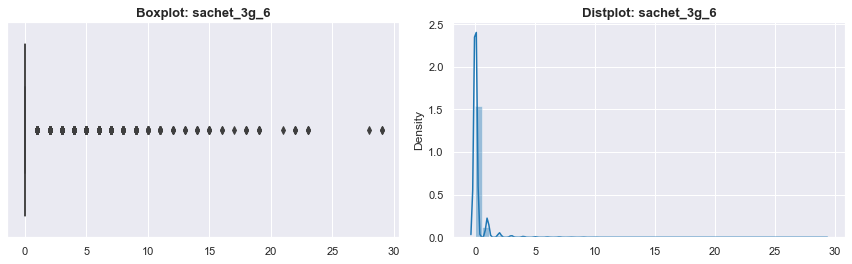

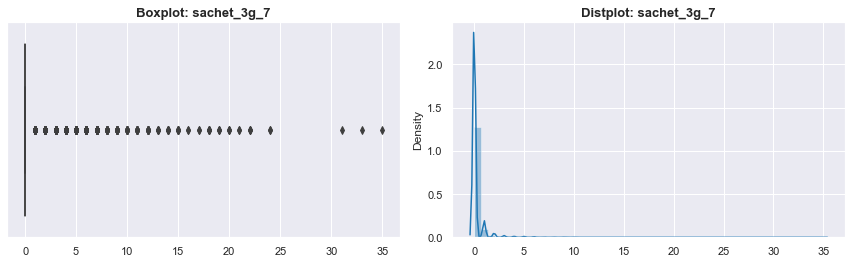

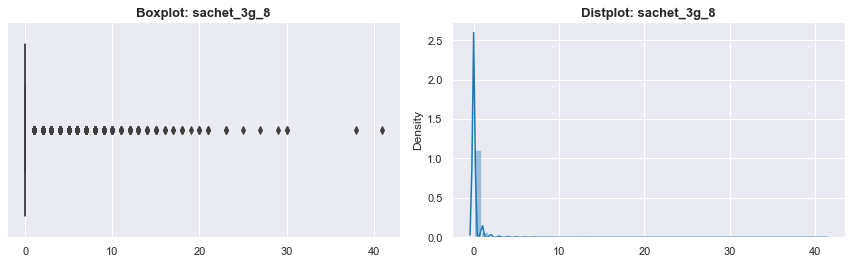

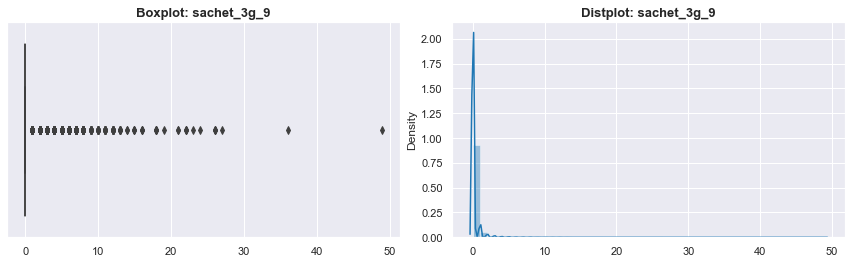

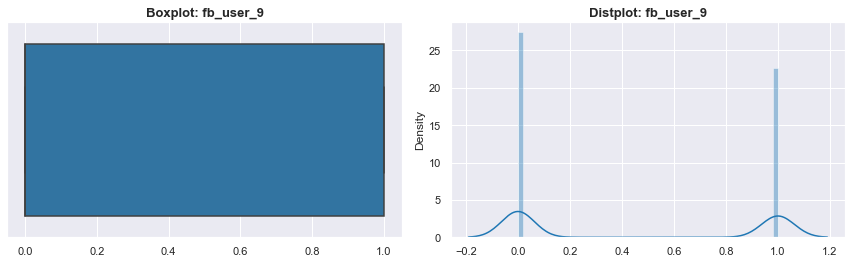

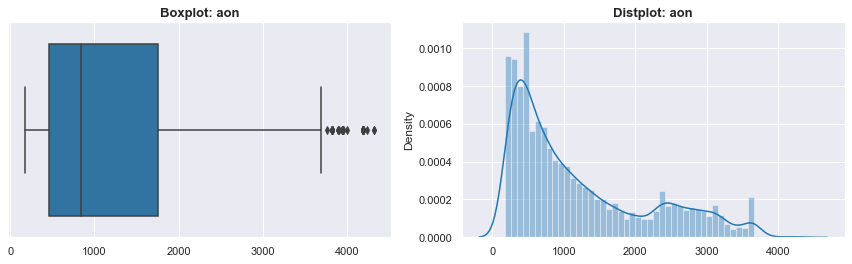

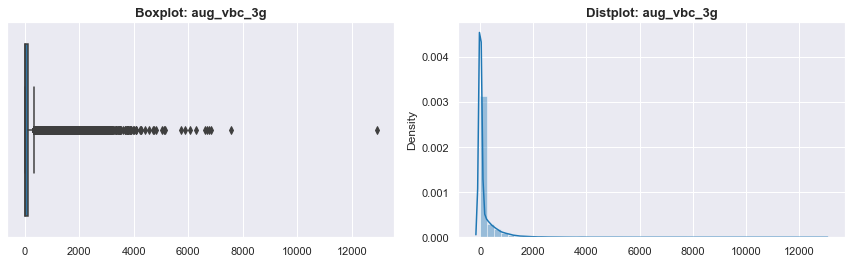

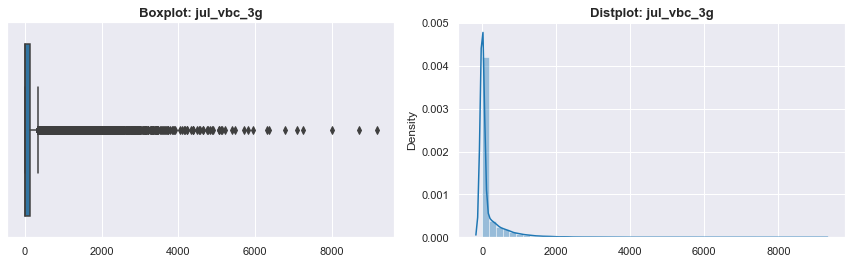

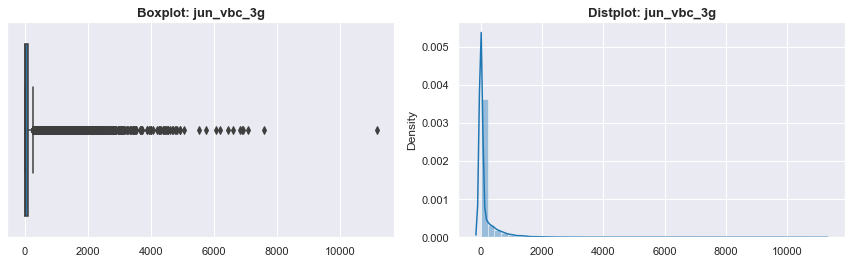

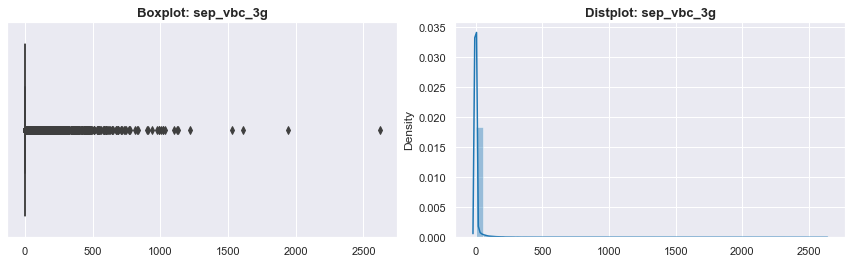

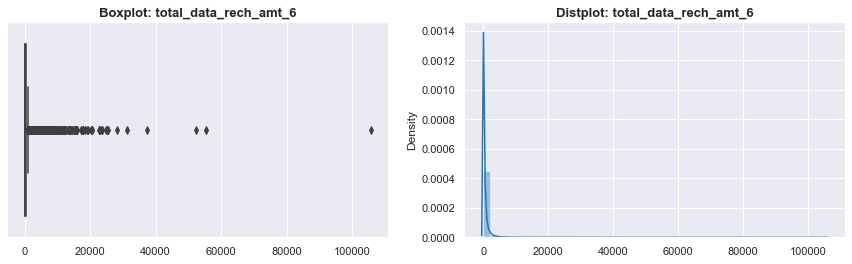

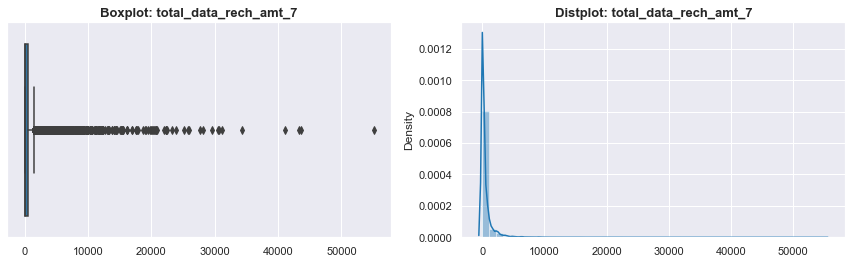

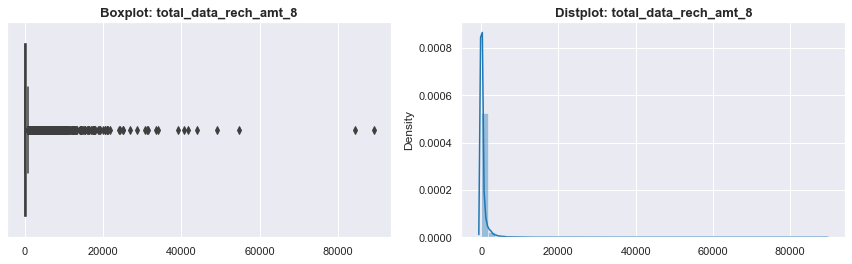

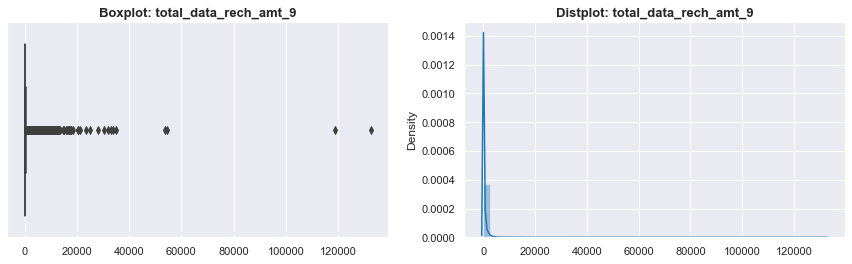

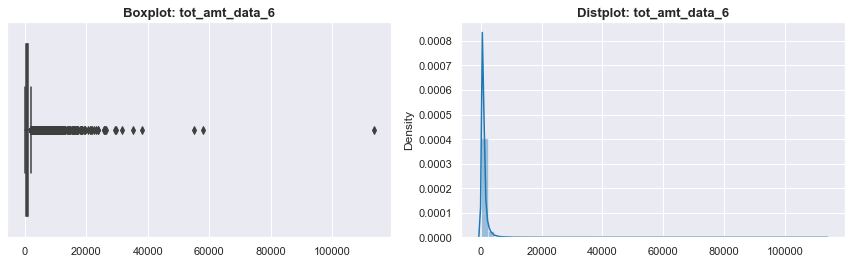

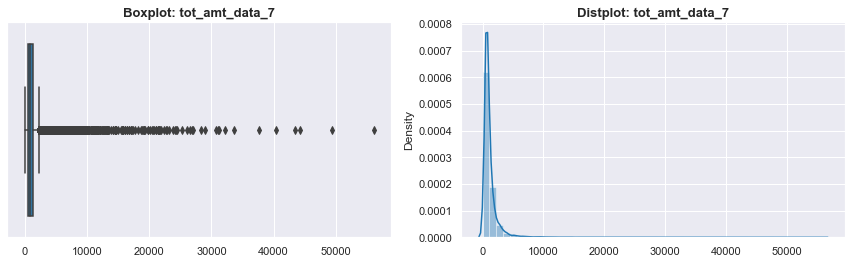

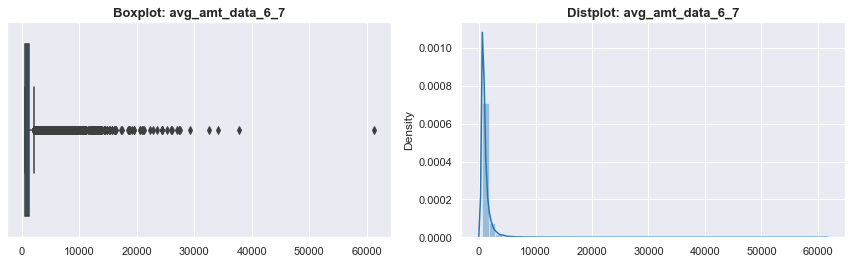

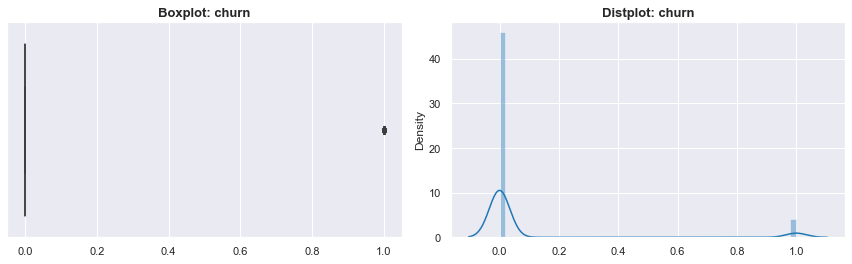

In [45]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

for col in churn_hv.columns:
    if col not in cat_cols:
        plt.figure(figsize=(12,7))
        ax1 = plt.subplot(2,2,1)
        sns.boxplot(churn_hv[col]) 
        plt.title(f"Boxplot: {col}", fontweight = 700,fontsize = 13)
        plt.xlabel("")

        ax2 = plt.subplot(2,2,2)
        sns.distplot(churn_hv[col], kde=True, bins = 50)
        plt.title(f"Distplot: {col}", fontweight = 700, fontsize = 13)
        plt.xlabel("")
        plt.tight_layout()
        plt.show()

### Outlier Treatment:

In [ ]:
# get a list of numeric columns and removing the churn feature. 

# defining a function to cap outliers: 

def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [ ]:
num_cols = [col for col in churn_hv.columns if col not in cat_cols]
num_cols_adj = [col for col in num_cols if not 'churn' in col]

# cap outliers in the numeric columns
churn_hv[num_cols_adj] = churn_hv[num_cols_adj].apply(cap_outliers, axis=0)

In [54]:
# check if the outliers have been fixed to some extent: 

churn_hv.describe(percentiles=[0.99, 0.98])

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
count 29824.00 29824.00 29824.00 29824.00     29824.00     29824.00   
mean    559.22   562.56   510.09   468.64       261.22       268.43   
std     459.50   478.65   501.03   500.98       459.88       480.12   
min       0.00     0.00     0.00 -1899.51         0.00         0.00   
50%     482.46   482.12   428.51   389.05        85.04        83.58   
98%    1626.25  1644.49  1656.65  1599.86      1679.69      1754.18   
99%    1983.00  1999.21  1984.14  1949.33      2154.91      2200.33   
max   27731.09 35145.83 33543.62 38805.62      7376.71      8157.78   

       onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count     29824.00     29824.00      29824.00      29824.00      29824.00   
mean        234.71       212.11        373.29        378.52        335.50   
std         458.52       436.86        479.94        497.88        479.85   
min           0.00         0.00          0.00          0.00          0.00   
50%          66.21        54.84        223.06        220.97        183.86   
98%        1651.49      1536.95       1827.87       1837.17       1723.71   
99%        2158.48      2098.66       2322.35       2401.38       2189.99   
max       10752.56     10427.46       8362.36       9667.13      14007.34   

       offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count      29824.00       29824.00       29824.00       29824.00   
mean         303.66          16.16          12.67          12.54   
std          446.54          76.48          75.92          74.30   
min            0.00           0.00           0.00           0.00   
50%          156.95           0.00           0.00           0.00   
98%         1642.85         212.86         158.57         162.00   
99%         2151.36         344.24         281.64         281.98   
max        10310.76        2613.31        3813.29        4169.81   

       roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       29824.00       29824.00       29824.00       29824.00   
mean           10.58          26.59          20.22          19.96   
std            67.13         115.90          96.33         105.00   
min             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
98%           129.40         347.74         264.08         254.14   
99%           229.03         530.68         439.57         427.25   
max          3220.66        3775.11        2812.04        5337.04   

       roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  \
count       29824.00          29824.00          29824.00          29824.00   
mean           15.87             73.22            143.76              5.78   
std            88.74            224.03            231.55             19.80   
min             0.00              0.00              0.00              0.00   
50%             0.00             18.20             61.48              0.00   
98%           197.31            537.66            827.68             54.79   
99%           335.65            856.82           1037.45             81.61   
max          4428.46          10389.24           4429.88            927.41   

       loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
count          29824.00      29824.00      29824.00      29824.00   
mean               1.44        254.18        255.60        236.20   
std                6.19        377.77        374.93        362.34   
min                0.00          0.00          0.00          0.00   
50%                0.00        125.03        128.78        111.66   
98%               16.28       1360.38       1321.37       1284.91   
99%               24.26       1784.38       1742.45       1661.15   
max              274.89      10643.38       7674.78      11039.91   

       loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  \
count      29824.00          29824.00

In [56]:
# get a count of arpu datapoints that have negative value

arpu_6_index = (churn_hv['arpu_6'] < 0)
arpu_7_index = (churn_hv['arpu_7'] < 0)
arpu_8_index = (churn_hv['arpu_8'] < 0)
count_neg_arpu = arpu_6_index.sum()+arpu_7_index.sum()+arpu_8_index.sum()
print(f"No. of rows with negative arpu: {count_neg_arpu}")

No. of rows with negative arpu: 0


In [57]:
# delete the observations with negative arpu values. 

churn_hv = churn_hv[(churn_hv['arpu_6'] >= 0) & 
                            (churn_hv['arpu_7'] >= 0) & 
                            (churn_hv['arpu_8'] >= 0)]
churn_hv.shape

(29824, 161)

### Bivariate Analysis:

#### Columns related to call & data recharge for good & action phase

In [51]:
rech_call_col = churn_hv.columns[churn_hv.columns.str.contains('rech_amt|rech_data')]
rech_call_col

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_data_rech_amt_6', 'total_data_rech_amt_7',
       'total_data_rech_amt_8'],
      dtype='object')

In [52]:

# Custom Function for Default Plotting variables

def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 10)
    plt.ylabel(ylabel, labelpad = 10)

In [53]:
def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
    title_3 = "Month 8 - " + xlabel
    
    print("\nChurn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = churn_hv, showfliers = False)
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = churn_hv, showfliers = False)
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    sns.boxplot(x = x_axis, y = y_axis + "_8", hue = "churn", data = churn_hv, showfliers = False)
    set_plotting_variable(title_3, xlabel, y_axis + "_8")
    
    plt.subplots_adjust(wspace = 0.4)
    plt.show()



Churn vs arpu


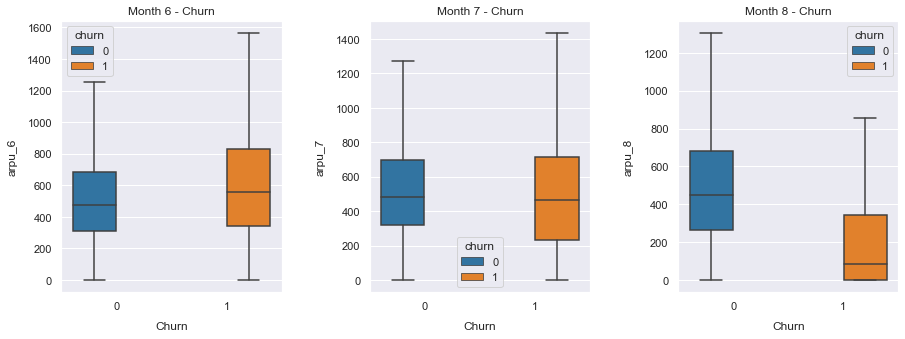


Churn vs onnet_mou


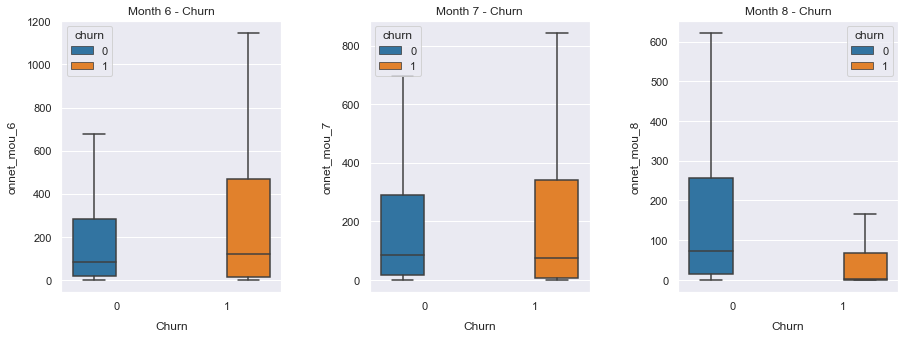


Churn vs offnet_mou


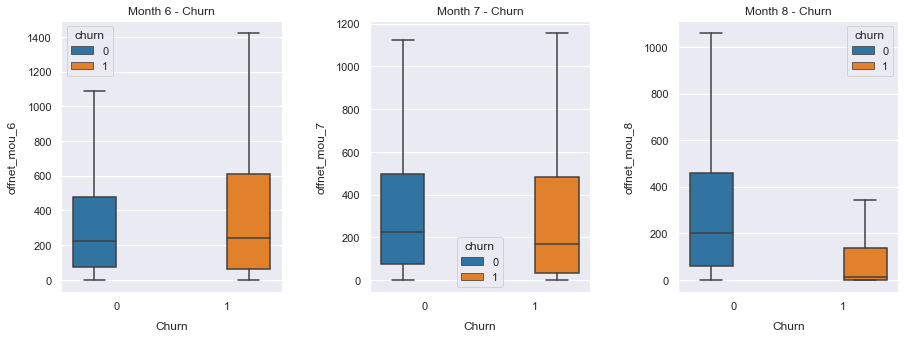


Churn vs total_og_mou


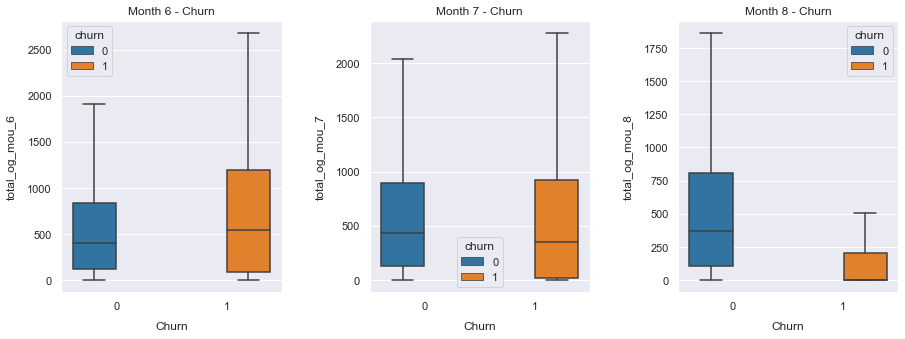


Churn vs total_ic_mou


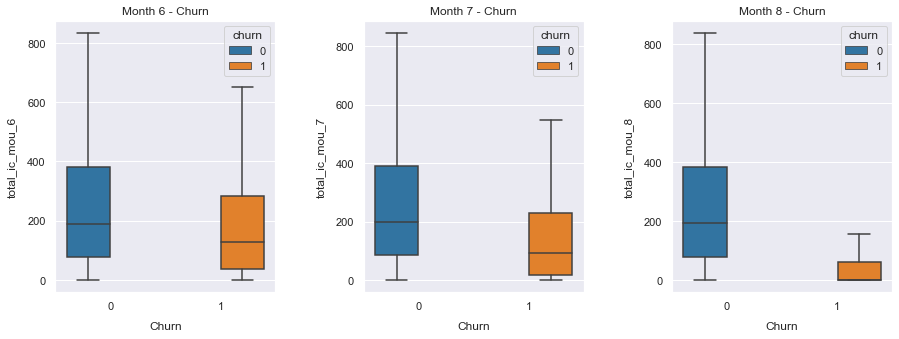


Churn vs total_rech_num


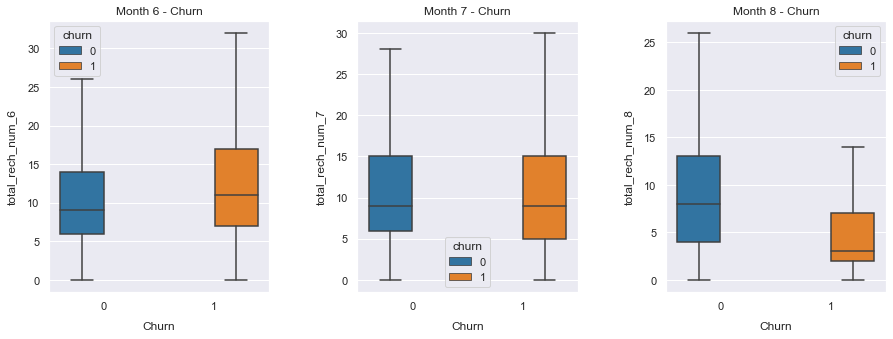


Churn vs total_rech_amt


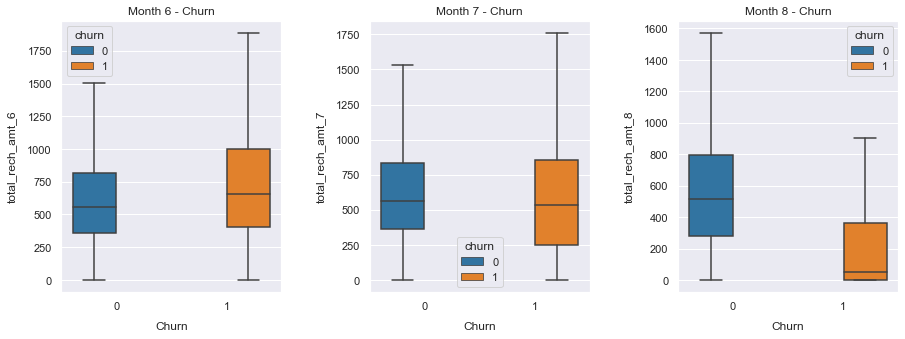


Churn vs vol_2g_mb


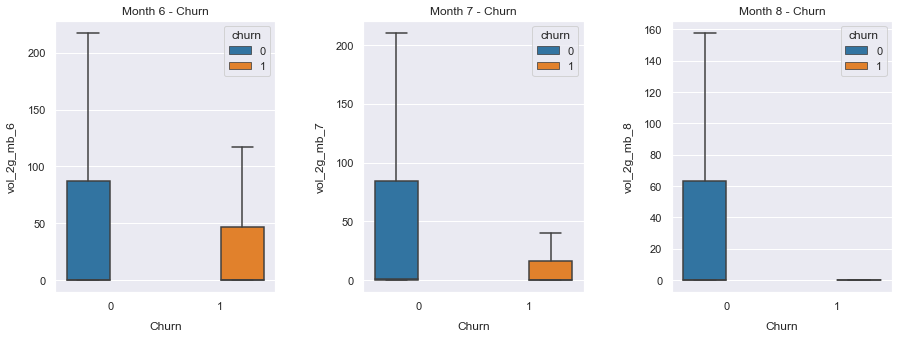


Churn vs vol_3g_mb


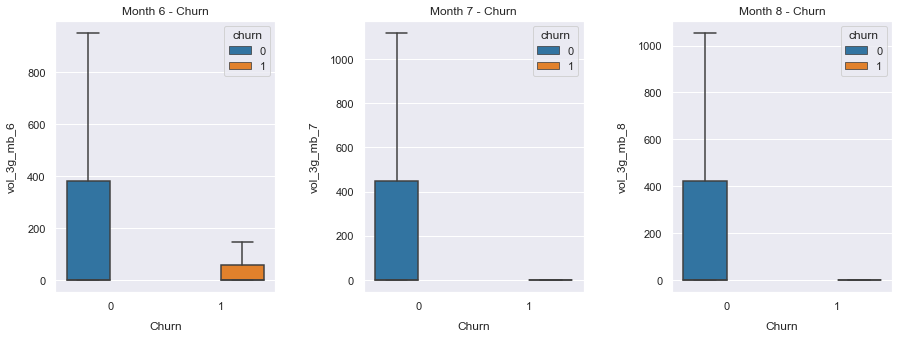

In [54]:
plot_bivariate("arpu")
plot_bivariate("onnet_mou")
plot_bivariate("offnet_mou")
plot_bivariate("total_og_mou")
plot_bivariate("total_ic_mou")
plot_bivariate("total_rech_num")
plot_bivariate("total_rech_amt")
plot_bivariate("vol_2g_mb")
plot_bivariate("vol_3g_mb")


### Multivariate Analysis:

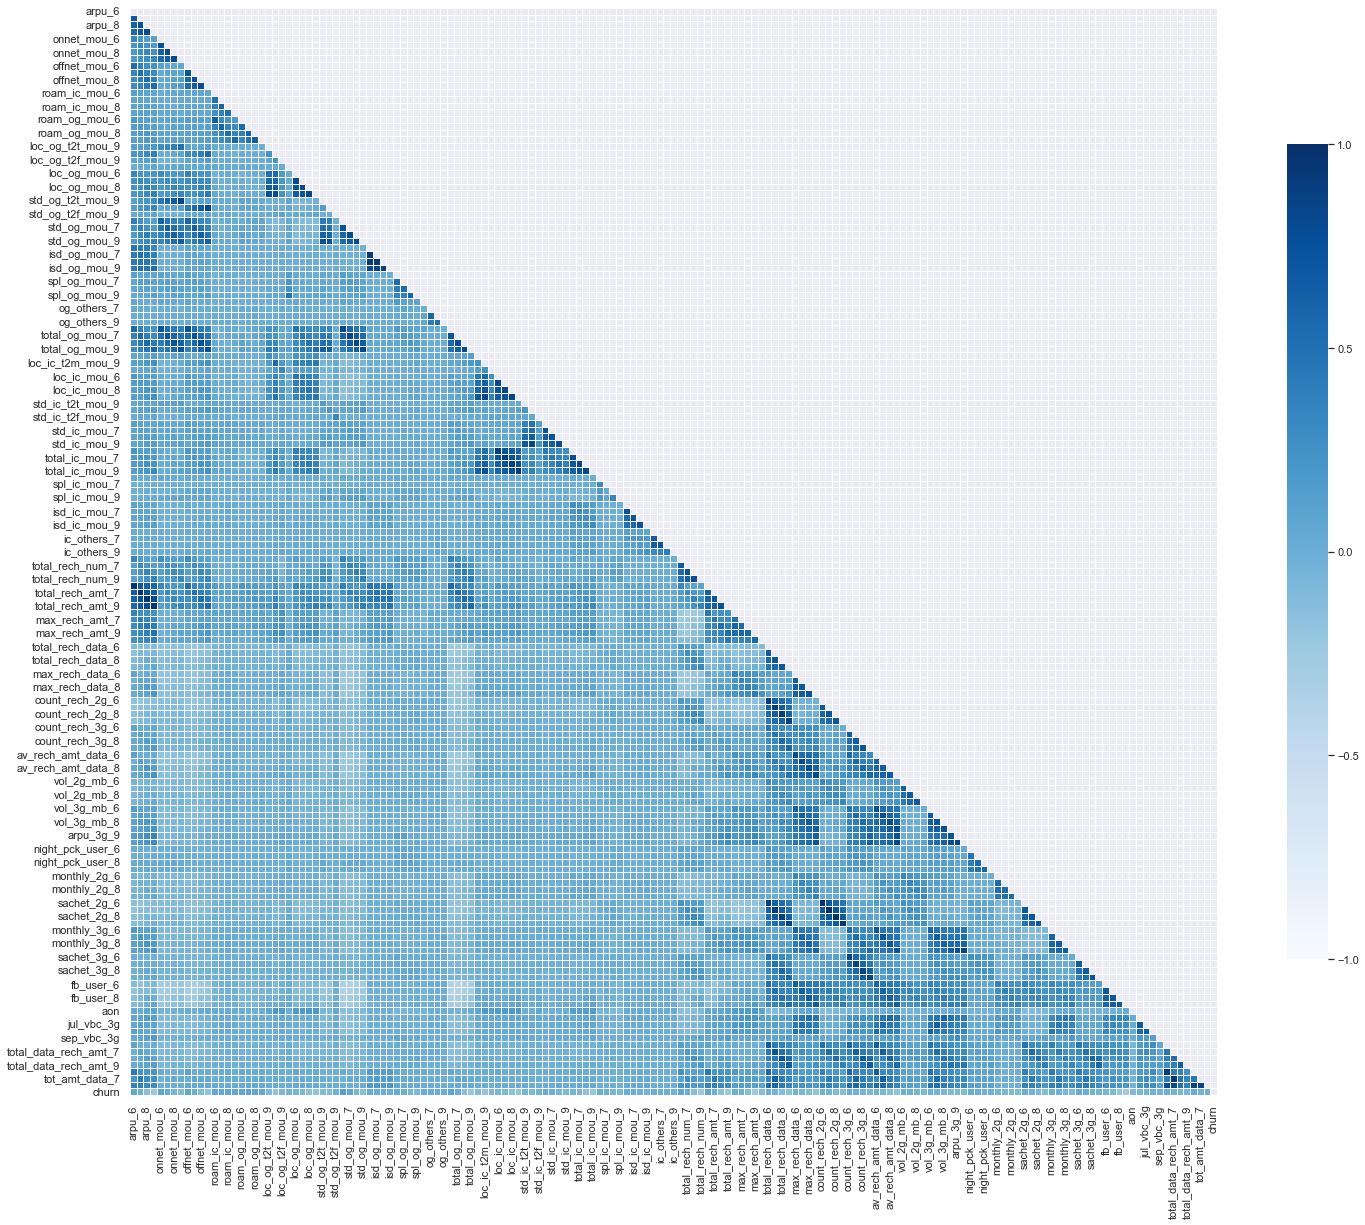

In [58]:
# heatmap to visualize the correlation between variables:

plt.figure(figsize = (25, 20))
correl_0 = churn_hv.corr()
mask = np.zeros_like(correl_0, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(correl_0,
            mask = mask,
            square = True,
            linewidths = .5,
            cmap = 'Blues',
            cbar_kws = {'shrink': 0.75,
                        'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin = -1, 
            vmax = 1,
            annot = False,
            annot_kws = {"size": 12})
plt.show()

In [56]:
# Define a custom function to pull top n correlations

def top_correl(df):
    correl = df.corr().abs()
    
    # Remove duplicate and identity entries from the matrix
    correl.loc[:,:] = np.tril(correl.values, k=-1)
    correl = correl[correl>0]
    correl = correl.unstack().sort_values(ascending=False).reset_index()
    correl = correl.rename(columns={"level_0": "Column_A",
                           "level_1": "Column_B",
                           0: "Correlation"})
    return correl

In [57]:
# correlation matrix for churn data:

top_correl(churn_hv[churn_hv.columns]).head(30)

Column_A            Column_B  Correlation
0         count_rech_2g_7         sachet_2g_7         0.98
1         count_rech_2g_8         sachet_2g_8         0.98
2         count_rech_2g_6         sachet_2g_6         0.98
3                  arpu_8    total_rech_amt_8         0.95
4                  arpu_6    total_rech_amt_6         0.94
5                  arpu_7    total_rech_amt_7         0.94
6       total_rech_data_7     count_rech_2g_7         0.92
7       total_rech_data_8     count_rech_2g_8         0.92
8       total_rech_data_6     count_rech_2g_6         0.91
9            loc_ic_mou_8      total_ic_mou_8         0.91
10           loc_ic_mou_6      total_ic_mou_6         0.91
11      total_rech_data_7         sachet_2g_7         0.91
12      total_rech_data_8         sachet_2g_8         0.91
13      total_rech_data_6         sachet_2g_6         0.90
14           loc_ic_mou_7      total_ic_mou_7         0.90
15  total_data_rech_amt_7      tot_amt_data_7         0.89
16  total_data_rech_amt_6      tot_amt_data_6         0.87
17         tot_amt_data_7    avg_amt_data_6_7         0.86
18           loc_ic_mou_7        loc_ic_mou_8         0.86
19           loc_og_mou_7        loc_og_mou_8         0.85
20           loc_ic_mou_6        loc_ic_mou_7         0.84
21           loc_og_mou_6        loc_og_mou_7         0.84
22        max_rech_data_6  av_rech_amt_data_6         0.84
23         total_ic_mou_7      total_ic_mou_8         0.84
24        max_rech_data_8  av_rech_amt_data_8         0.84
25           std_og_mou_7      total_og_mou_7         0.83
26           std_og_mou_8      total_og_mou_8         0.83
27        max_rech_data_7  av_rech_amt_data_7         0.83
28          roam_ic_mou_7       roam_og_mou_7         0.82
29         tot_amt_data_6    avg_amt_data_6_7         0.82

## Deriving New Features:

We will create a feature that will help explain customer behaviour in the action vs. good phase.  This can be done by taking a  difference between the 8th month and the average of the previous 2 months.

In [58]:
# creating a diff column for select fields:

churn_hv['arpu_diff'] = churn_hv["arpu_8"] - ((churn_hv["arpu_6"] + churn_hv["arpu_7"])/2)
churn_hv['onnet_mou_diff'] = churn_hv["onnet_mou_8"] - ((churn_hv["onnet_mou_6"] + churn_hv["onnet_mou_7"])/2)
churn_hv['offnet_mou_diff'] = churn_hv["offnet_mou_8"] - ((churn_hv["offnet_mou_6"] + churn_hv["offnet_mou_7"])/2)
churn_hv['roam_ic_mou_diff'] = churn_hv["roam_ic_mou_8"] - ((churn_hv["roam_ic_mou_6"] + churn_hv["roam_ic_mou_7"])/2)
churn_hv['roam_og_mou_diff'] = churn_hv["roam_og_mou_8"] - ((churn_hv["roam_og_mou_6"] + churn_hv["roam_og_mou_7"])/2)
churn_hv['loc_og_mou_diff'] = churn_hv["loc_og_mou_8"] - ((churn_hv["loc_og_mou_6"] + churn_hv["loc_og_mou_7"])/2)
churn_hv['std_og_mou_diff'] = churn_hv["std_og_mou_8"] - ((churn_hv["std_og_mou_6"] + churn_hv["std_og_mou_7"])/2)
churn_hv['isd_og_mou_diff'] = churn_hv["isd_og_mou_8"] - ((churn_hv["isd_og_mou_6"] + churn_hv["isd_og_mou_7"])/2)
churn_hv['spl_og_mou_diff'] = churn_hv["spl_og_mou_8"] - ((churn_hv["spl_og_mou_6"] + churn_hv["spl_og_mou_7"])/2)
churn_hv['total_og_mou_diff'] = churn_hv["total_og_mou_8"] - ((churn_hv["total_og_mou_6"] + churn_hv["total_og_mou_7"])/2)
churn_hv['loc_ic_mou_diff'] = churn_hv["loc_ic_mou_8"] - ((churn_hv["loc_ic_mou_6"] + churn_hv["loc_ic_mou_7"])/2)
churn_hv['std_ic_mou_diff'] = churn_hv["std_ic_mou_8"] - ((churn_hv["std_ic_mou_6"] + churn_hv["std_ic_mou_7"])/2)
churn_hv['isd_ic_mou_diff'] = churn_hv["isd_ic_mou_8"] - ((churn_hv["isd_ic_mou_6"] + churn_hv["isd_ic_mou_7"])/2)
churn_hv['spl_ic_mou_diff'] = churn_hv["spl_ic_mou_8"] - ((churn_hv["spl_ic_mou_6"] + churn_hv["spl_ic_mou_7"])/2)
churn_hv['total_ic_mou_diff'] = churn_hv["total_ic_mou_8"] - ((churn_hv["total_ic_mou_6"] + churn_hv["total_ic_mou_7"])/2)
churn_hv['total_rech_num_diff'] = churn_hv["total_rech_num_8"] - ((churn_hv["total_rech_num_6"] + churn_hv["total_rech_num_7"])/2)
churn_hv['total_rech_amt_diff'] = churn_hv["total_rech_amt_8"] - ((churn_hv["total_rech_amt_6"] + churn_hv["total_rech_amt_7"])/2)
churn_hv['max_rech_amt_diff'] = churn_hv["max_rech_amt_8"] - ((churn_hv["max_rech_amt_6"] + churn_hv["max_rech_amt_7"])/2)
churn_hv['max_rech_data_diff'] = churn_hv["max_rech_data_8"] - ((churn_hv["max_rech_data_6"] + churn_hv["max_rech_data_7"])/2)
churn_hv['av_rech_amt_data_diff'] = churn_hv["av_rech_amt_data_8"] - ((churn_hv["av_rech_amt_data_6"] + churn_hv["av_rech_amt_data_7"])/2)
churn_hv['vol_2g_mb_diff'] = churn_hv["vol_2g_mb_8"] - ((churn_hv["vol_2g_mb_6"] + churn_hv["vol_2g_mb_7"])/2)
churn_hv['vol_3g_mb_diff'] = churn_hv["vol_3g_mb_8"] - ((churn_hv["vol_3g_mb_6"] + churn_hv["vol_3g_mb_7"])/2)


In [59]:
churn_hv.shape

(29824, 132)

## Test Train Split:

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Putting feature variable to X
X = churn_hv.drop(['churn'], axis=1)
X.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.38  214.82  213.80         0.00         0.00         0.00   
1 1069.18 1349.85 2014.48        57.84        54.68        52.29   
2  378.72  492.22  137.36       413.69       351.03        35.08   
3  514.45  597.75  637.76       102.41       132.11        85.14   
4   74.35  193.90  366.97        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00           0.00           0.00   
1        453.43        567.16        325.91          16.23          33.49   
2         94.66         80.63        136.48           0.00           0.00   
3        757.93        896.68        983.39           0.00           0.00   
4         85.41         89.36        205.89           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_6  \
0           0.00           0.00           0.00           0.00          0.00   
1          31.64          23.74          12.59          38.06        422.16   
2           0.00           0.00           0.00           0.00        378.09   
3           0.00           0.00           0.00           0.00         97.04   
4           0.00           0.00           0.00           0.00        131.91   

   loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  \
0          0.00          0.00          0.00          0.00          0.00   
1        533.91        255.79         60.86         75.14         77.84   
2        288.18         63.04        130.26        143.48         98.28   
3         94.09        129.74        763.29        934.69        938.79   
4        133.68        182.14          2.36          6.35         39.61   

   isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0          0.00          0.00          0.00          0.00          0.00   
1          0.00          0.18         10.01          4.50          0.00   
2          0.00          0.00          0.00          0.00          0.00   
3          0.00          0.00          0.00          0.00          0.00   
4          0.00          0.01          0.00          0.10          0.00   

   spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  \
0          0.00         0.00         0.00         0.00            0.00   
1          6.50         0.00         0.00         0.00          487.53   
2         10.23         0.00         0.00         0.00          508.36   
3          0.00         0.00         0.00         0.00          860.34   
4         17.71         0.00         0.00         0.00          134.38   

   total_og_mou_7  total_og_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0            0.00            0.00          0.00          0.00          5.44   
1          609.24          350.16        427.88        355.23        188.04   
2          431.66          171.56         81.43         23.83         15.79   
3         1028.79         1068.54        125.33         87.68        159.11   
4          140.04          239.48        116.63        174.41        224.21   

   std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
0          0.00          0.00          0.00            0.00            0.00   
1        180.54        173.08        193.94          626.46          558.04   
2         22.43          4.66          0.75          103.86           28.49   
3         81.76         44.21        101.93          207.09          131.89   
4          2.94         14.89         57.29          119.58          222.89   

   total_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0            5.44          0.00          0.00          0.00          0.00   
1          428.74          0.21          0.00          0.00          2.06   
2           16.54          0.00          0.00          0.00          0.00   
3          261.04          0.00          0.00      

In [62]:
y = churn_hv['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape, X_test.shape)


(20876, 131) (8948, 131)


### Feature Scaling:

In [64]:
from sklearn.preprocessing import MinMaxScaler

# create a fresh list of num_cols 
num_cols = X_train.select_dtypes(include=['float64']).columns

# initializing MinMaxScaler
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
2234     0.20    0.35    0.20         0.49         0.77         0.38   
13773    0.04    0.06    0.07         0.00         0.00         0.01   
21641    0.56    0.63    0.46         0.90         1.00         0.88   
15592    0.17    0.18    0.30         0.02         0.02         0.07   
12480    0.29    0.24    0.23         0.02         0.01         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
2234           0.05          0.08          0.06           0.00           0.00   
13773          0.00          0.00          0.00           0.00           0.00   
21641          0.10          0.12          0.11           0.00           0.00   
15592          0.32          0.32          0.24           0.00           0.00   
12480          0.26          0.21          0.12           0.43           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
2234            0.00           0.00           0.00           0.00   
13773           0.00           0.00           0.00           0.01   
21641           0.00           0.00           0.00           0.00   
15592           0.00           0.00           0.00           0.00   
12480           0.00           0.22           0.00           0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
2234           0.07          0.16          0.10          0.36          0.54   
13773          0.00          0.00          0.00          0.00          0.00   
21641          0.14          0.18          0.21          0.68          0.74   
15592          0.14          0.16          0.18          0.20          0.17   
12480          0.08          0.12          0.12          0.14          0.11   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
2234           0.28          0.00          0.00          0.00          0.00   
13773          0.00          0.00          0.00          0.00          0.02   
21641          0.63          0.00          0.00          0.00          0.03   
15592          0.12          0.00          0.00          0.31          0.00   
12480          0.03          0.00          0.00          0.00          0.00   

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
2234           0.10          0.07         0.00         0.00         0.00   
13773          0.01          0.05         0.00         0.00         0.00   
21641          0.12          0.15         0.41         0.00         0.00   
15592          0.00          0.07         0.00         0.00         0.00   
12480          0.00          0.13         0.00         0.00         0.00   

       total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  \
2234             0.33            0.53            0.27          0.19   
13773            0.00            0.00            0.00          0.00   
21641            0.62            0.70            0.61          0.23   
15592            0.23            0.22            0.21          0.14   
12480            0.15            0.15            0.09          0.19   

       loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
2234           0.22          0.17          0.00          0.19          0.08   
13773          0.00          0.00          0.00          0.00          0.01   
21641          0.22          0.29          0.08          0.04          0.10   
15592          0.16          0.26          0.10          0.12          0.02   
12480          0.19          0.17          0.12          0.13          0.15   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  \
2234             0.17            0.25            0.17          0.00   
13773            0.00            0.00            0.00          0.00   
21641            0.22            0.20            0.28          0.72   
15592            0.18            0.20            0.25          0.00   
12480   

### Handling Data Imbalancing:



**Synthetic Minority Over-sampling Technique (SMOTE):**   
Given the class imbalance in our target variable churn, we will use SMOTE to resolve the issue of overfitting. SMOTE mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances. Also, there is no loss of useful information as would have been the case with random undersampling.


In [65]:
# Checking the break-up of y_train data before SMOTE:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, churn event rate : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Before OverSampling, counts of label '1': 1680
Before OverSampling, counts of label '0': 19196
Before OverSampling, churn event rate : 8.05% 



In [66]:
from imblearn.over_sampling import SMOTE

# fitting SMOTE: 

smt = SMOTE(random_state=12)
X_train_sm,y_train_sm = smt.fit_resample(X_train,y_train)


In [67]:
# Checking the break-up of y_train data after SMOTE:

print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_sm==1)/len(y_train_sm)*100,2)))


After OverSampling, the shape of train_X: (38392, 131)
After OverSampling, the shape of train_y: (38392,) 

After OverSampling, counts of label '1': 19196
After OverSampling, counts of label '0': 19196
After OverSampling, churn event rate : 50.0% 




- Using SMOTE, we have synthetically oversampled the churn class and now both churn and non-churn class are equally distributed.  

### Logistic Regression:

#### Feature Selection Using RFE

In [68]:
# importing the required libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)        
rfe = rfe.fit(X_train_sm, y_train_sm)

In [69]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [70]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 44),
 ('arpu_7', True, 1),
 ('arpu_8', False, 9),
 ('onnet_mou_6', False, 27),
 ('onnet_mou_7', False, 72),
 ('onnet_mou_8', False, 11),
 ('offnet_mou_6', False, 38),
 ('offnet_mou_7', False, 115),
 ('offnet_mou_8', False, 10),
 ('roam_ic_mou_6', False, 86),
 ('roam_ic_mou_7', False, 47),
 ('roam_ic_mou_8', False, 48),
 ('roam_og_mou_6', False, 102),
 ('roam_og_mou_7', False, 92),
 ('roam_og_mou_8', False, 4),
 ('loc_og_mou_6', False, 28),
 ('loc_og_mou_7', False, 14),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', False, 37),
 ('std_og_mou_7', False, 13),
 ('std_og_mou_8', False, 36),
 ('isd_og_mou_6', False, 23),
 ('isd_og_mou_7', False, 5),
 ('isd_og_mou_8', False, 22),
 ('spl_og_mou_6', False, 76),
 ('spl_og_mou_7', False, 87),
 ('spl_og_mou_8', False, 6),
 ('og_others_6', False, 45),
 ('og_others_7', False, 31),
 ('og_others_8', True, 1),
 ('total_og_mou_6', False, 64),
 ('total_og_mou_7', False, 12),
 ('total_og_mou_8', False, 113),
 ('loc_ic_mou_6', False, 30),

In [71]:
# storing the rfe supported columns in separate variable:

col = X_train_sm.columns[rfe.support_]
col

Index(['arpu_7', 'loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'total_rech_data_6', 'count_rech_2g_6', 'night_pck_user_7', '3g_vbc_8',
       'total_data_rech_amt_6', 'tot_amt_data_6', 'loc_ic_mou_diff'],
      dtype='object')

### Assessing the model with StatsModels

#### Model 1:

In [72]:
X_train_SM = sm.add_constant(X_train_sm[col])
logm1 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm1.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16408.
Date:                Tue, 06 Dec 2022   Deviance:                       32816.
Time:                        20:49:50   Pearson chi2:                 4.84e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4123
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.9711      0.175     22.697      0.000       3.628       4.314
arpu_7                    3.0154      0.122     24.732      0.000       2.776       3.254
loc_og_mou_8             -3.0510      0.174    -17.535      0.000      -3.392      -2.710
og_others_8              -2.5514      0.800     -3.189      0.001      -4.119      -0.983
loc_ic_mou_8             -6.5983      0.204    -32.266      0.000      -6.999      -6.197
std_ic_mou_8             -1.9082      0.137    -13.911      0.000      -2.177      -1.639
spl_ic_mou_8             -2.8081      0.143    -19.667      0.000      -3.088      -2.528
total_rech_num_8         -2.3277      0.102    -22.876      0.000      -2.527      -2.128
total_rech_amt_8         -3.2214      0.137    -23.495      0.000      -3.490      -2.953
total_rech_data_6         1.8325      0.236      7.770      0.000       1.370       2.295
count_rech_2g_6          -1.3170      0.171     -7.722      0.000      -1.651      -0.983
night_pck_user_7         -1.7867      0.214     -8.365      0.000      -2.205      -1.368
3g_vbc_8                 -3.3050      0.118    -28.126      0.000      -3.535      -3.075
total_data_rech_amt_6    -4.3779      0.269    -16.288      0.000      -4.905      -3.851
tot_amt_data_6            3.9257      0.219     17.919      0.000       3.496       4.355
loc_ic_mou_diff          -5.9908      0.332    -18.067      0.000      -6.641      -5.341
=========================================================================================
"""

In [73]:
# create a df to display features and their respective VIFs:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8       total_rech_data_6 21.80
9         count_rech_2g_6 10.78
12  total_data_rech_amt_6  9.79
13         tot_amt_data_6  9.57
0                  arpu_7  5.59
14        loc_ic_mou_diff  5.59
7        total_rech_amt_8  4.87
6        total_rech_num_8  3.34
1            loc_og_mou_8  2.88
3            loc_ic_mou_8  2.76
4            std_ic_mou_8  1.33
11               3g_vbc_8  1.33
5            spl_ic_mou_8  1.09
10       night_pck_user_7  1.04
2             og_others_8  1.00


- P-values for all the features are < than the prescribed threshold of 0.05. 
- However, VIF for multiple features are above the prescribed threshold of 5. 
- Will drop total_rech_data_6 as it has the highest VIF. 

In [74]:
# drop due to high vif factor: 

col = col.drop('total_rech_data_6', 1)

#### Model 2:

In [75]:
# model 2 post eliminating total_rech_data_6

X_train_SM = sm.add_constant(X_train_sm[col])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm2.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16439.
Date:                Tue, 06 Dec 2022   Deviance:                       32878.
Time:                        20:49:51   Pearson chi2:                 5.06e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4113
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.0229      0.175     23.011      0.000       3.680       4.366
arpu_7                    2.9656      0.122     24.379      0.000       2.727       3.204
loc_og_mou_8             -3.0748      0.174    -17.654      0.000      -3.416      -2.733
og_others_8              -2.5106      0.797     -3.151      0.002      -4.072      -0.949
loc_ic_mou_8             -6.5732      0.204    -32.173      0.000      -6.974      -6.173
std_ic_mou_8             -1.9200      0.137    -13.985      0.000      -2.189      -1.651
spl_ic_mou_8             -2.8093      0.143    -19.688      0.000      -3.089      -2.530
total_rech_num_8         -2.3153      0.101    -22.845      0.000      -2.514      -2.117
total_rech_amt_8         -3.2314      0.137    -23.593      0.000      -3.500      -2.963
count_rech_2g_6          -0.1406      0.077     -1.822      0.069      -0.292       0.011
night_pck_user_7         -1.5639      0.209     -7.493      0.000      -1.973      -1.155
3g_vbc_8                 -3.2408      0.116    -27.868      0.000      -3.469      -3.013
total_data_rech_amt_6    -3.2369      0.226    -14.354      0.000      -3.679      -2.795
tot_amt_data_6            3.8227      0.218     17.500      0.000       3.395       4.251
loc_ic_mou_diff          -5.9711      0.331    -18.014      0.000      -6.621      -5.321
=========================================================================================
"""

In [76]:
# create a df to display features and their respective VIFs:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
12         tot_amt_data_6 9.56
11  total_data_rech_amt_6 6.42
0                  arpu_7 5.58
13        loc_ic_mou_diff 5.34
7        total_rech_amt_8 4.87
6        total_rech_num_8 3.34
1            loc_og_mou_8 2.88
3            loc_ic_mou_8 2.76
8         count_rech_2g_6 2.39
4            std_ic_mou_8 1.33
10               3g_vbc_8 1.32
5            spl_ic_mou_8 1.09
9        night_pck_user_7 1.02
2             og_others_8 1.00


- P-values for "count_rech_2g_6" features is > than the prescribed threshold of 0.05.  
- Though VIF is also high for multiple features, first we will drop "count_rech_2g_6". 

In [77]:
# drop due to high pvalue: 

col = col.drop('count_rech_2g_6', 1)

#### Model 3:

In [78]:
# model 3 post eliminating count_rech_2g_6

X_train_SM = sm.add_constant(X_train_sm[col])
logm3 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm3.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16441.
Date:                Tue, 06 Dec 2022   Deviance:                       32881.
Time:                        20:49:52   Pearson chi2:                 5.13e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4113
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.9848      0.173     22.971      0.000       3.645       4.325
arpu_7                    2.9988      0.120     24.928      0.000       2.763       3.235
loc_og_mou_8             -3.0804      0.174    -17.689      0.000      -3.422      -2.739
og_others_8              -2.5509      0.800     -3.190      0.001      -4.118      -0.984
loc_ic_mou_8             -6.5740      0.204    -32.180      0.000      -6.974      -6.174
std_ic_mou_8             -1.9218      0.137    -13.997      0.000      -2.191      -1.653
spl_ic_mou_8             -2.8132      0.143    -19.703      0.000      -3.093      -2.533
total_rech_num_8         -2.3449      0.100    -23.403      0.000      -2.541      -2.149
total_rech_amt_8         -3.2159      0.137    -23.523      0.000      -3.484      -2.948
night_pck_user_7         -1.5633      0.209     -7.478      0.000      -1.973      -1.154
3g_vbc_8                 -3.2155      0.115    -27.886      0.000      -3.441      -2.989
total_data_rech_amt_6    -3.4258      0.200    -17.091      0.000      -3.819      -3.033
tot_amt_data_6            3.8859      0.216     17.997      0.000       3.463       4.309
loc_ic_mou_diff          -5.9358      0.331    -17.949      0.000      -6.584      -5.288
=========================================================================================
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
11         tot_amt_data_6 9.45
0                  arpu_7 5.49
10  total_data_rech_amt_6 5.12
12        loc_ic_mou_diff 4.86
7        total_rech_amt_8 4.82
6        total_rech_num_8 3.25
1            loc_og_mou_8 2.88
3            loc_ic_mou_8 2.76
4            std_ic_mou_8 1.33
9                3g_vbc_8 1.31
5            spl_ic_mou_8 1.09
8        night_pck_user_7 1.02
2             og_others_8 1.00


- P-values for all features are within the prescribed threshold of 0.05.  
- Though VIF for "tot_amt_data_6" is higher than the prescribed threshold of 5. 

In [80]:
# drop due to high VIF: 

col = col.drop('tot_amt_data_6', 1)

#### Model 4:

In [81]:
# model 4 post eliminating tot_amt_data_6

X_train_SM = sm.add_constant(X_train_sm[col])
logm4 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm4.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16616.
Date:                Tue, 06 Dec 2022   Deviance:                       33233.
Time:                        20:49:53   Pearson chi2:                 4.44e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4059
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.8293      0.170     28.372      0.000       4.496       5.163
arpu_7                    3.5639      0.116     30.629      0.000       3.336       3.792
loc_og_mou_8             -2.9739      0.173    -17.216      0.000      -3.312      -2.635
og_others_8              -1.9703      0.759     -2.597      0.009      -3.457      -0.484
loc_ic_mou_8             -6.8515      0.206    -33.336      0.000      -7.254      -6.449
std_ic_mou_8             -1.9304      0.137    -14.045      0.000      -2.200      -1.661
spl_ic_mou_8             -2.7999      0.142    -19.673      0.000      -3.079      -2.521
total_rech_num_8         -2.5824      0.100    -25.863      0.000      -2.778      -2.387
total_rech_amt_8         -2.7016      0.133    -20.347      0.000      -2.962      -2.441
night_pck_user_7         -1.5738      0.208     -7.570      0.000      -1.981      -1.166
3g_vbc_8                 -3.4304      0.117    -29.357      0.000      -3.659      -3.201
total_data_rech_amt_6    -0.2125      0.089     -2.393      0.017      -0.387      -0.038
loc_ic_mou_diff          -7.0786      0.330    -21.457      0.000      -7.725      -6.432
=========================================================================================
"""

In [82]:
# creating a df to display features and their respective VIFs:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
7        total_rech_amt_8 4.78
0                  arpu_7 4.59
11        loc_ic_mou_diff 4.20
6        total_rech_num_8 3.19
1            loc_og_mou_8 2.88
3            loc_ic_mou_8 2.75
10  total_data_rech_amt_6 1.35
4            std_ic_mou_8 1.33
9                3g_vbc_8 1.30
5            spl_ic_mou_8 1.09
8        night_pck_user_7 1.02
2             og_others_8 1.00


- P-values for all features are within the prescribed threshold of 0.05.  
- VIF for "total_rech_amt_8" was very close to the prescribed threshold of 5, hence dropping.

In [83]:
# drop due to high VIF: 

col = col.drop('total_rech_amt_8', 1)

#### Model 5: The Final Log Reg Model

In [84]:
# model 5 post eliminating total_rech_amt_8

X_train_SM = sm.add_constant(X_train_sm[col])
logm5 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
model = logm5.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38392
Model:                            GLM   Df Residuals:                    38380
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16830.
Date:                Tue, 06 Dec 2022   Deviance:                       33660.
Time:                        20:49:54   Pearson chi2:                 6.31e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.6274      0.169     33.335      0.000       5.297       5.958
arpu_7                    2.3087      0.094     24.539      0.000       2.124       2.493
loc_og_mou_8             -3.5805      0.175    -20.413      0.000      -3.924      -3.237
og_others_8              -2.6485      0.786     -3.372      0.001      -4.188      -1.109
loc_ic_mou_8             -7.0809      0.209    -33.862      0.000      -7.491      -6.671
std_ic_mou_8             -2.2403      0.139    -16.125      0.000      -2.513      -1.968
spl_ic_mou_8             -2.7887      0.142    -19.669      0.000      -3.067      -2.511
total_rech_num_8         -3.4457      0.094    -36.757      0.000      -3.629      -3.262
night_pck_user_7         -1.4842      0.206     -7.218      0.000      -1.887      -1.081
3g_vbc_8                 -3.7162      0.116    -32.020      0.000      -3.944      -3.489
total_data_rech_amt_6    -0.2212      0.089     -2.483      0.013      -0.396      -0.047
loc_ic_mou_diff          -8.4129      0.329    -25.587      0.000      -9.057      -7.768
=========================================================================================
"""

In [85]:
# creating a df to display features and their respective VIFs:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_SM[col].values, i) for i in range(X_train_SM[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features  VIF
10        loc_ic_mou_diff 4.11
0                  arpu_7 3.61
3            loc_ic_mou_8 2.75
1            loc_og_mou_8 2.66
6        total_rech_num_8 2.56
9   total_data_rech_amt_6 1.35
4            std_ic_mou_8 1.29
8                3g_vbc_8 1.24
5            spl_ic_mou_8 1.09
7        night_pck_user_7 1.02
2             og_others_8 1.00


- The final model has 11 features.
- All features have p-value and VIF below the prescribed thresholds. 

### Predicting values for the train set: 

In [86]:
# Getting the Predicted values on the train set

y_train_sm_pred = model.predict(X_train_SM)
y_train_sm_pred[:10]

0   0.35
1   0.46
2   0.18
3   0.05
4   0.09
5   0.02
6   0.13
7   0.96
8   0.49
9   0.03
dtype: float64

In [87]:
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.34729165, 0.45781255, 0.18125673, 0.05395927, 0.08705943,
       0.02245012, 0.12774732, 0.95883831, 0.49432248, 0.02652008])

In [88]:
#Creating a dataframe with the actual Churn flag and the Predicted probabilities

y_train_sm_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

Churn  Churn_prob
0      0        0.35
1      0        0.46
2      0        0.18
3      0        0.05
4      0        0.09

### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0


In [89]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

Churn  Churn_prob  churn_pred
0      0        0.35           0
1      0        0.46           0
2      0        0.18           0
3      0        0.05           0
4      0        0.09           0

In [90]:
from sklearn import metrics

# Confusion matrix 
conf_matrix = metrics.confusion_matrix(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"] )

In [91]:
# custom function to plot confusion matrix: 

def conf_matrix_plot(cm):
    plt.figure(figsize=(5,4))
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax.set_xlabel('Predicted Values',size=12)
    ax.set_ylabel('Actual Values',size=12)
    ax.set_title('Confusion Matrix', size=14,fontweight = 600)
    return plt.show()

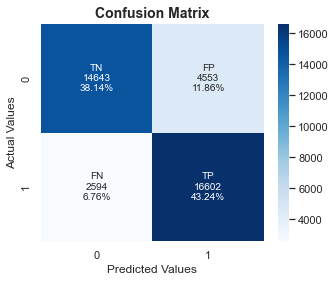

In [92]:
# plotting the confusion matrix: 

conf_matrix_plot(conf_matrix)

In [93]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy: ", round(accuracy_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"]),3))
print("Recall: ", round(recall_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"]),3))
print("Precision: ", round(precision_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"]),3))
print("F1-Score: ", round(f1_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"]),3))

Accuracy:  0.814
Recall:  0.865
Precision:  0.785
F1-Score:  0.823


In [94]:
print( metrics.classification_report( y_train_sm_pred_final["Churn"], y_train_sm_pred_final["churn_pred"] ) )

              precision    recall  f1-score   support

           0       0.85      0.76      0.80     19196
           1       0.78      0.86      0.82     19196

    accuracy                           0.81     38392
   macro avg       0.82      0.81      0.81     38392
weighted avg       0.82      0.81      0.81     38392





- At 50% cutt-off, the model F1-Score, Accuracy, Specificity are >= 80%.
- However, precision is slightly lower at 78.9%. 


### Plotting the ROC Curve:

In [95]:
# import the required libraries: 

from sklearn.metrics import auc, roc_auc_score, roc_curve

In [96]:
# defining the function to plot the ROC curve:

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve',size=14, fontweight = 600)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final["Churn"], 
                                          y_train_sm_pred_final["churn_pred"], 
                                         drop_intermediate = False )

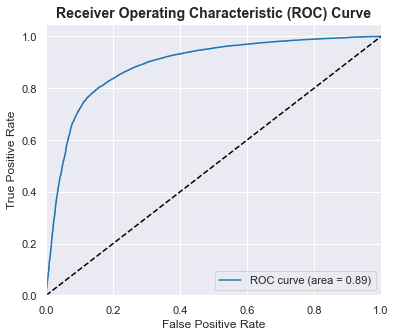

In [98]:
draw_roc(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["Churn_prob"])

### Finding Optimal Cut-off Point:

In [99]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Churn  Churn_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0        0.35           0    1    1    1    1    0    0    0    0    0   
1      0        0.46           0    1    1    1    1    1    0    0    0    0   
2      0        0.18           0    1    1    0    0    0    0    0    0    0   
3      0        0.05           0    1    0    0    0    0    0    0    0    0   
4      0        0.09           0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.00         0.00      0.50         1.00         0.00
0.10         0.10      0.68         0.97         0.38
0.20         0.20      0.73         0.95         0.51
0.30         0.30      0.77         0.93         0.61
0.40         0.40      0.80         0.90         0.69
0.50         0.50      0.81         0.86         0.76
0.60         0.60      0.82         0.81         0.83
0.70         0.70      0.81         0.73         0.90
0.80         0.80      0.70         0.44         0.96
0.90         0.90      0.56         0.12         0.99


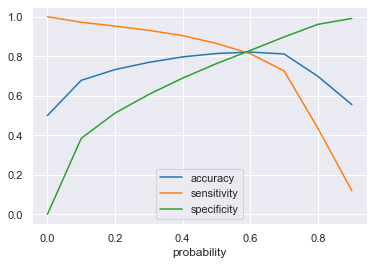

In [101]:
# plot accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [102]:
# create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

Churn  Churn_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0        0.35           0    1    1    1    1    0    0    0    0    0   
1      0        0.46           0    1    1    1    1    1    0    0    0    0   
2      0        0.18           0    1    1    0    0    0    0    0    0    0   
3      0        0.05           0    1    0    0    0    0    0    0    0    0   
4      0        0.09           0    1    0    0    0    0    0    0    0    0   

   0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  
0    0     0     0     0     0     0     0     0     0     0  
1    0     0     0     0     0     0     0     0     0     0  
2    0     0     0     0     0     0     0     0     0     0  
3    0     0     0     0     0     0     0     0     0     0  
4    0     0     0     0     0     0     0     0     0     0

In [103]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50      0.81         0.86         0.76
0.51         0.51      0.82         0.86         0.77
0.52         0.52      0.82         0.86         0.78
0.53         0.53      0.82         0.85         0.78
0.54         0.54      0.82         0.85         0.79
0.55         0.55      0.82         0.84         0.80
0.56         0.56      0.82         0.84         0.80
0.57         0.57      0.82         0.83         0.81
0.58         0.58      0.82         0.82         0.82
0.59         0.59      0.82         0.82         0.82


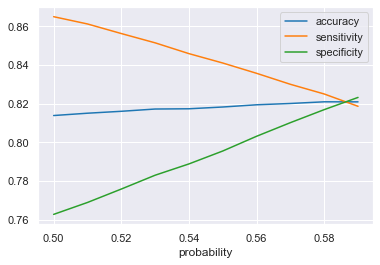

In [104]:
# plot accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()


- From the above graph we can conclude, the optimal probability cutoff point to predicted churn variable converges at 0.59

In [105]:
# from the curve above, 0.59 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Churn_prob.map( lambda x: 1 if x > 0.59 else 0)

y_train_sm_pred_final.head()

Churn  Churn_prob  churn_pred  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0        0.35           0    1    1    1    1    0    0    0    0    0   
1      0        0.46           0    1    1    1    1    1    0    0    0    0   
2      0        0.18           0    1    1    0    0    0    0    0    0    0   
3      0        0.05           0    1    0    0    0    0    0    0    0    0   
4      0        0.09           0    1    0    0    0    0    0    0    0    0   

   0.9  0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  final_churn_pred  
0    0     0     0     0     0     0     0     0     0     0                 0  
1    0     0     0     0     0     0     0     0     0     0                 0  
2    0     0     0     0     0     0     0     0     0     0                 0  
3    0     0     0     0     0     0     0     0     0     0                 0  
4    0     0     0     0     0     0     0     0     0     0                 0

In [159]:
print("Accuracy: ", round(accuracy_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))
print("Recall: ", round(recall_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))
print("Precision: ", round(precision_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))
print("F1-Score: ", round(f1_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))
print("AUC-Score: ", round(roc_auc_score(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"]),3))

Accuracy:  0.821
Recall:  0.819
Precision:  0.822
F1-Score:  0.82
AUC-Score:  0.821


In [107]:
conf_matrix2 = metrics.confusion_matrix(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["final_churn_pred"])

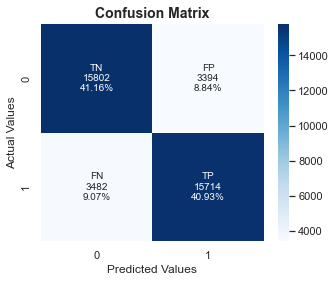

In [108]:
conf_matrix_plot(conf_matrix2)


    
- When we select the optimal cutoff = 0.59, the various performance parameters Accuracy, Sensitivity & Specificity are all ~80%.

### Precision and recall tradeoff


In [109]:
# import the required libraries:

from sklearn.metrics import precision_recall_curve

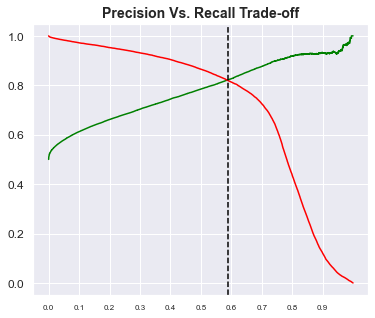

In [110]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final["Churn"], y_train_sm_pred_final["Churn_prob"])

# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(6,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.59, color='black', linestyle='--') # additing axline
plt.title('Precision Vs. Recall Trade-off', size=14, fontweight = 600)
plt.xticks(np.arange(0,1,step=0.1),size=8)
plt.yticks(size=12)

plt.show()


    
- There is relation between Precision and Recall. 
- Precision and Recall are inversely related means if one increases other will definetely decrease.
- Based on Precision- Recall Trade off curve, the cutoff point seems to 0.59.  

### Making predictions on the test set


#### Transforming and feature selection for test data



In [111]:
# Scale the test data
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
18395    0.12    0.34    0.14         0.04         0.06         0.08   
16876    0.30    0.29    0.22         0.23         0.15         0.25   
11117    0.05    0.09    0.13         0.00         0.01         0.01   
13350    0.25    0.37    0.24         0.09         0.04         0.05   
13749    0.42    0.25    0.21         0.08         0.07         0.04   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
18395          0.09          0.07          0.06           0.00           0.00   
16876          0.10          0.13          0.06           0.00           0.01   
11117          0.04          0.03          0.05           0.00           0.00   
13350          0.30          0.36          0.27           0.00           0.00   
13749          0.31          0.12          0.16           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
18395           0.00           0.00           0.00           0.00   
16876           0.00           0.00           0.01           0.00   
11117           0.00           0.00           0.00           0.00   
13350           0.00           0.00           0.00           0.00   
13749           0.00           0.00           0.00           0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_mou_6  std_og_mou_7  \
18395          0.16          0.15          0.18          0.00          0.00   
16876          0.39          0.35          0.39          0.00          0.00   
11117          0.04          0.03          0.05          0.01          0.01   
13350          0.42          0.46          0.38          0.03          0.03   
13749          0.15          0.15          0.14          0.21          0.06   

       std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  \
18395          0.00          0.00          0.00          0.00          0.10   
16876          0.00          0.00          0.00          0.00          0.02   
11117          0.02          0.00          0.00          0.00          0.00   
13350          0.03          0.00          0.00          0.00          1.00   
13749          0.07          0.00          0.00          0.00          0.44   

       spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  \
18395          0.24          0.00         0.00         0.00         0.00   
16876          0.08          0.02         0.12         0.00         0.00   
11117          0.00          0.03         0.00         0.00         0.00   
13350          0.36          0.28         0.00         0.00         0.00   
13749          0.07          0.12         0.02         0.00         0.00   

       total_og_mou_6  total_og_mou_7  total_og_mou_8  loc_ic_mou_6  \
18395            0.09            0.08            0.09          0.07   
16876            0.21            0.18            0.20          0.56   
11117            0.03            0.02            0.04          0.01   
13350            0.26            0.27            0.21          0.32   
13749            0.26            0.13            0.13          0.31   

       loc_ic_mou_7  loc_ic_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  \
18395          0.11          0.13          0.00          0.01          0.00   
16876          0.39          0.41          0.01          0.00          0.00   
11117          0.02          0.02          0.00          0.03          0.02   
13350          0.36          0.31          0.09          0.11          0.10   
13749          0.22          0.27          0.48          0.17          0.06   

       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  spl_ic_mou_6  \
18395            0.08            0.10            0.12          0.10   
16876            0.48            0.32            0.35          0.00   
11117            0.01            0.02            0.02          0.00   
13350            0.30            0.34            0.30          0.00   
13749   

In [112]:
# filter the X_test to reflect features from our final model:

X_test_final=X_test[col]
X_test_final.head()

arpu_7  loc_og_mou_8  og_others_8  loc_ic_mou_8  std_ic_mou_8  \
18395    0.34          0.18         0.00          0.13          0.00   
16876    0.29          0.39         0.00          0.41          0.00   
11117    0.09          0.05         0.00          0.02          0.02   
13350    0.37          0.38         0.00          0.31          0.10   
13749    0.25          0.14         0.00          0.27          0.06   

       spl_ic_mou_8  total_rech_num_8  night_pck_user_7  3g_vbc_8  \
18395          0.00              0.13                 0      0.00   
16876          0.00              0.13                 0      0.00   
11117          0.00              0.48                 0      0.03   
13350          0.00              0.11                 0      0.02   
13749          0.00              0.13                 0      0.00   

       total_data_rech_amt_6  loc_ic_mou_diff  
18395                   0.00             0.55  
16876                   0.03             0.49  
11117                   0.00             0.53  
13350                   0.03             0.51  
13749                   0.09             0.53

In [113]:
# Add constant to the test model.

X_test_SM = sm.add_constant(X_test_final)
X_test_SM.columns

Index(['const', 'arpu_7', 'loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'night_pck_user_7',
       '3g_vbc_8', 'total_data_rech_amt_6', 'loc_ic_mou_diff'],
      dtype='object')

### Predicting the target variable:

In [114]:
# Predicted values on the test set

y_test_pred = model.predict(X_test_SM)
y_test_pred.head()

18395   0.44
16876   0.07
11117   0.32
13350   0.12
13749   0.22
dtype: float64

In [115]:
# Convert y_pred to a dataframe which is an array

y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
18395 0.44
16876 0.07
11117 0.32
13350 0.12
13749 0.22

In [116]:
# Convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

churn
18395      0
16876      0
11117      0
13350      0
13749      0

In [117]:
# rename the column
y_pred = y_pred.rename(columns = {0:"churn_prob"})
y_pred.head()

churn_prob
18395        0.44
16876        0.07
11117        0.32
13350        0.12
13749        0.22

In [118]:
# Append y_test_df and y_pred

y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

churn  churn_prob
18395      0        0.44
16876      0        0.07
11117      0        0.32
13350      0        0.12
13749      0        0.22

#### Evaluating the Final model on Test data with the cut-off of 0.59:

In [119]:
#Create new column 'Final_Predicted' with value 1 if Churn_Prob > cutoff:

y_pred_final['test_churn_pred'] = y_pred_final.churn_prob.map(lambda x: 1 if x>0.59 else 0)
y_pred_final.head()

churn  churn_prob  test_churn_pred
18395      0        0.44                0
16876      0        0.07                0
11117      0        0.32                0
13350      0        0.12                0
13749      0        0.22                0

In [120]:
# Check the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

print("Accuracy: ", round(accuracy_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))
print("Recall: ", round(recall_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))
print("Precision: ", round(precision_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))
print("F1-Score: ", round(f1_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))
print("AUC-Score: ", round(roc_auc_score(y_pred_final["churn"], y_pred_final["test_churn_pred"]),3))


Accuracy:  0.825
Recall:  0.801
Precision:  0.277
F1-Score:  0.412
AUC-Score:  0.814


### Confusion Matrix for Test Data:

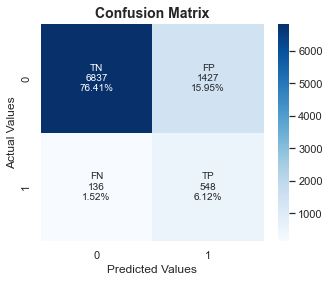

In [121]:
conf_matrix_final = confusion_matrix(y_pred_final['churn'], y_pred_final['test_churn_pred'])
conf_matrix_plot(conf_matrix_final)

### Plotting the ROC Curve:

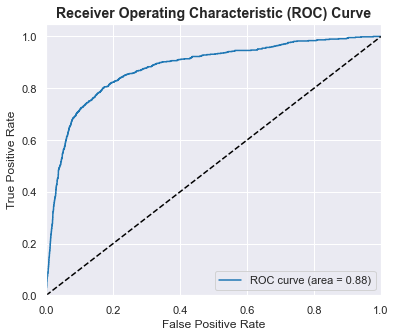

In [122]:
# ROC curve for the test dataset

# Define the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.churn_prob, drop_intermediate = False )
# Plot the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.churn_prob)


    
- The precision and F-1 score took a major hit in the test set. 
- AUC is likely the most appropriate metric to use, since the Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
- Given the AUC remained consistent at ~0.88-0.89 in the train and test data set, the logistic regression model is performing well. 

## Decision Trees:

### Base Model:

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
# create a base model 
dt_0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=100)

In [125]:
# fit the base model with no tuning: 
dt_0.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='auto', min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

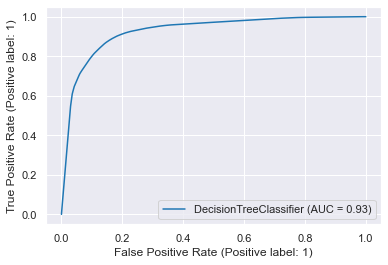

In [126]:
#Plot the roc curve:

from sklearn.metrics import plot_roc_curve

plot_roc_curve(dt_0, X_train_sm, y_train_sm, drop_intermediate=False)
plt.show()

In [127]:
# predict on the test set: 

y_test_pred = dt_0.predict(X_test)

In [128]:
# classification_report for evaluate the model

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      8264
           1       0.30      0.82      0.44       684

    accuracy                           0.84      8948
   macro avg       0.64      0.83      0.67      8948
weighted avg       0.93      0.84      0.87      8948



In [129]:
# Check the overall accuracy of the predicted set.
print("Accuracy: ", round(accuracy_score(y_test, y_test_pred),3))
print("Recall: ", round(recall_score(y_test, y_test_pred),3))
print("Precision: ", round(precision_score(y_test, y_test_pred),3))
print("F1-Score: ", round(f1_score(y_test, y_test_pred),3))
print("AUC-Score:", round(roc_auc_score(y_test, y_test_pred),3))

Accuracy:  0.84
Recall:  0.82
Precision:  0.3
F1-Score:  0.439
AUC-Score: 0.831



- AUC score of 0.831, we may be able to improve this using GridSearchCV method of hyper-parameter tuning.

### Hyper-parameter tuning for Decision Trees:

In [130]:
# import the required libraries:

from sklearn.model_selection import GridSearchCV


In [131]:
# set the tuning params 
dt = DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [132]:
# initialize the gridsearchcv 
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=3,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [133]:
grid_search.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='roc_auc', verbose=1)

In [134]:
grid_search.best_score_

0.9480348422743708

In [135]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=50, random_state=42)

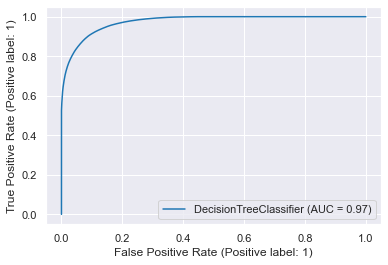

In [136]:
# plot the roc curve for the train data

from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_best, X_train_sm, y_train_sm)
plt.show()

In [137]:
y_test_pred_ht = dt_best.predict(X_test)

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_ht))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8264
           1       0.38      0.77      0.51       684

    accuracy                           0.89      8948
   macro avg       0.68      0.83      0.72      8948
weighted avg       0.93      0.89      0.90      8948



In [139]:
# Check the overall accuracy of the predicted set.

print("Accuracy: ", round(accuracy_score(y_test, y_test_pred_ht),3))
print("Recall: ", round(recall_score(y_test, y_test_pred_ht),3))
print("Precision: ", round(precision_score(y_test, y_test_pred_ht),3))
print("F1-Score: ", round(f1_score(y_test, y_test_pred_ht),3))
print("AUC-Score:", round(roc_auc_score(y_test, y_test_pred_ht),3))

Accuracy:  0.887
Recall:  0.766
Precision:  0.381
F1-Score:  0.509
AUC-Score: 0.832



- Very slight improvement in AUC-score post hyper parameter tuning from 0.831 to 0.832.

## Random Forest:

### Base Model:

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=42, oob_score=True)

In [142]:
rf_base = rf.fit(X_train_sm, y_train_sm)

In [143]:
rf.oob_score_

0.8142060846009586


- The model is predicting ~84% rows correctly from the out-of-bag sample.

In [144]:
#predict using the rf_base model: 

y_test_pred = rf_base.predict(X_test)

In [145]:
# run the classification_report for evaluate the model

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8264
           1       0.36      0.77      0.49       684

    accuracy                           0.88      8948
   macro avg       0.67      0.83      0.71      8948
weighted avg       0.93      0.88      0.90      8948



In [146]:
print("Accuracy: ", round(accuracy_score(y_test, y_test_pred),3))
print("Recall: ", round(recall_score(y_test, y_test_pred),3))
print("Precision: ", round(precision_score(y_test, y_test_pred),3))
print("F1-Score: ", round(f1_score(y_test, y_test_pred),3))
print("AUC-Score:", round(roc_auc_score(y_test, y_test_pred),3))

Accuracy:  0.877
Recall:  0.77
Precision:  0.357
F1-Score:  0.488
AUC-Score: 0.828



- The base random forest model has an AUC score of 0.828, which can be improved using hyper parameter tuning.

### Hyper-parameter tuning for Random Forest:


In [147]:
#initialize the rf classifier: 

rf = RandomForestClassifier(random_state=42)

In [148]:
# set the parameters to tune the model
params =  {
    'max_depth': [3,4,5],
    'min_samples_leaf': range(25,50,100),
    'min_samples_split': range(50,75,100),
    'n_estimators': [10, 20, 30], 
    'max_features': [5, 10, 15]
}

In [149]:
# apply the cross validation using the GridSearchCV method: 

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 3,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

In [150]:
# fit on the train set. 

grid_search.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [5, 10, 15],
                         'min_samples_leaf': range(25, 50, 100),
                         'min_samples_split': range(50, 75, 100),
                         'n_estimators': [10, 20, 30]},
             scoring='roc_auc', verbose=1)

In [151]:
# get the best score:

grid_search.best_score_

0.9440848684947709

In [152]:
# assign the grid_search.best_estimator to a variable for further prediction: 

rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, max_features=15, min_samples_leaf=25,
                       min_samples_split=50, n_estimators=30, random_state=42)

In [153]:
# predict using params from grid_search.best_estimator

y_pred_rfht= rf_best.predict(X_test)

In [154]:
# run the classification_report for evaluate the model

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfht))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      8264
           1       0.38      0.81      0.51       684

    accuracy                           0.88      8948
   macro avg       0.68      0.85      0.72      8948
weighted avg       0.94      0.88      0.90      8948



In [155]:
# Check the overall accuracy of the predicted set.

print("Accuracy: ", round(accuracy_score(y_test, y_pred_rfht),3))
print("Recall: ", round(recall_score(y_test, y_pred_rfht),3))
print("Precision: ", round(precision_score(y_test, y_pred_rfht),3))
print("F1-Score: ", round(f1_score(y_test, y_pred_rfht),3))
print("AUC-Score:", round(roc_auc_score(y_test, y_pred_rfht),3))

Accuracy:  0.883
Recall:  0.808
Precision:  0.375
F1-Score:  0.513
AUC-Score: 0.849



- The AUC score improved considerably to 0.849 from the base model score of 0.828.

### Top Features Affecting Churn:

In [156]:
#create a df of the most important features from the random forest model:

imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": (rf_best.feature_importances_)*100
})

In [157]:
# sort and display the key features: 

imp_df.sort_values(by="Imp", ascending=False)

Varname   Imp
35            loc_ic_mou_8 12.18
56        total_rech_amt_8  9.47
109              arpu_diff  7.67
11           roam_ic_mou_8  7.38
2                   arpu_8  5.90
41          total_ic_mou_8  5.82
62       total_rech_data_8  5.64
14           roam_og_mou_8  4.86
113       roam_og_mou_diff  3.84
59          max_rech_amt_8  3.83
17            loc_og_mou_8  3.54
112       roam_ic_mou_diff  3.45
119        loc_ic_mou_diff  3.04
125    total_rech_amt_diff  2.19
98               fb_user_8  2.18
32          total_og_mou_8  2.08
74      av_rech_amt_data_8  2.05
123      total_ic_mou_diff  1.27
65         max_rech_data_8  1.13
77             vol_2g_mb_8  0.93
118      total_og_mou_diff  0.83
53        total_rech_num_8  0.72
40          total_ic_mou_7  0.62
8             offnet_mou_8  0.54
34            loc_ic_mou_7  0.51
124    total_rech_num_diff  0.49
68         count_rech_2g_8  0.48
115        std_og_mou_diff  0.47
111        offnet_mou_diff  0.41
129         vol_2g_mb_diff  0.40
105  total_data_rech_amt_8  0.33
120        std_ic_mou_diff  0.32
31          total_og_mou_7  0.31
128  av_rech_amt_data_diff  0.26
126      max_rech_amt_diff  0.23
12           roam_og_mou_6  0.22
122        spl_ic_mou_diff  0.22
99                     aon  0.21
10           roam_ic_mou_7  0.19
44            spl_ic_mou_8  0.18
19            std_og_mou_7  0.18
114        loc_og_mou_diff  0.17
13           roam_og_mou_7  0.16
39          total_ic_mou_6  0.15
33            loc_ic_mou_6  0.13
38            std_ic_mou_8  0.13
3              onnet_mou_6  0.12
26            spl_og_mou_8  0.12
127     max_rech_data_diff  0.11
18            std_og_mou_6  0.11
80             vol_3g_mb_8  0.10
63         max_rech_data_6  0.10
86            monthly_2g_8  0.10
60       total_rech_data_6  0.09
103  total_data_rech_amt_6  0.09
67         count_rech_2g_7  0.08
61       total_rech_data_7  0.08
20            std_og_mou_8  0.08
89             sachet_2g_8  0.08
76             vol_2g_mb_7  0.07
27             og_others_6  0.07
92            monthly_3g_8  0.06
42            spl_ic_mou_6  0.06
24            spl_og_mou_6  0.05
84            monthly_2g_6  0.05
5              onnet_mou_8  0.05
85            monthly_2g_7  0.05
16            loc_og_mou_7  0.05
15            loc_og_mou_6  0.04
110         onnet_mou_diff  0.04
0                   arpu_6  0.04
117        spl_og_mou_diff  0.04
9            roam_ic_mou_6  0.04
58          max_rech_amt_7  0.04
100               3g_vbc_8  0.04
130         vol_3g_mb_diff  0.04
70         count_rech_3g_7  0.03
66         count_rech_2g_6  0.03
6             offnet_mou_6  0.03
52        total_rech_num_7  0.03
93             sachet_3g_6  0.03
116        isd_og_mou_diff  0.03
51        total_rech_num_6  0.03
30          total_og_mou_6  0.02
107         tot_amt_data_7  0.02
50             ic_others_8  0.02
48             ic_others_6  0.02
46            isd_ic_mou_7  0.02
95             sachet_3g_8  0.02
57          max_rech_amt_6  0.02
90            monthly_3g_6  0.02
121        isd_ic_mou_diff  0.02
102               3g_vbc_6  0.02
96               fb_user_6  0.02
101               3g_vbc_7  0.02
71         count_rech_3g_8  0.02
88             sachet_2g_7  0.01
47            isd_ic_mou_8  0.01
106         tot_amt_data_6  0.01
75             vol_2g_mb_6  0.01
43            spl_ic_mou_7  0.01
22            isd_og_mou_7  0.01
94             sachet_3g_7  0.01
64         max_rech_data_7  0.01
108       avg_amt_data_6_7  0.01
69         count_rech_3g_6  0.01
104  total_data_rech_amt_7  0.01
1                   arpu_7  0.01
72      av_rech_amt_data_6  0.00
4              onnet_mou_7  0.00
23            isd_og_mou_8  0.00
49             ic_others_7  0.00
54        total_rech_amt_6  0.00
73      av_rech_amt_data_7  0.00
55        total_rech_amt_7  0.00
79             vol_3g_mb_7  0.00
36            std_ic_mou_6  0.00
7             offnet_mou_7  0.00
97               fb_user_7  0.00
21            isd_og_mou_6  0.00
25            spl_og_mou_7

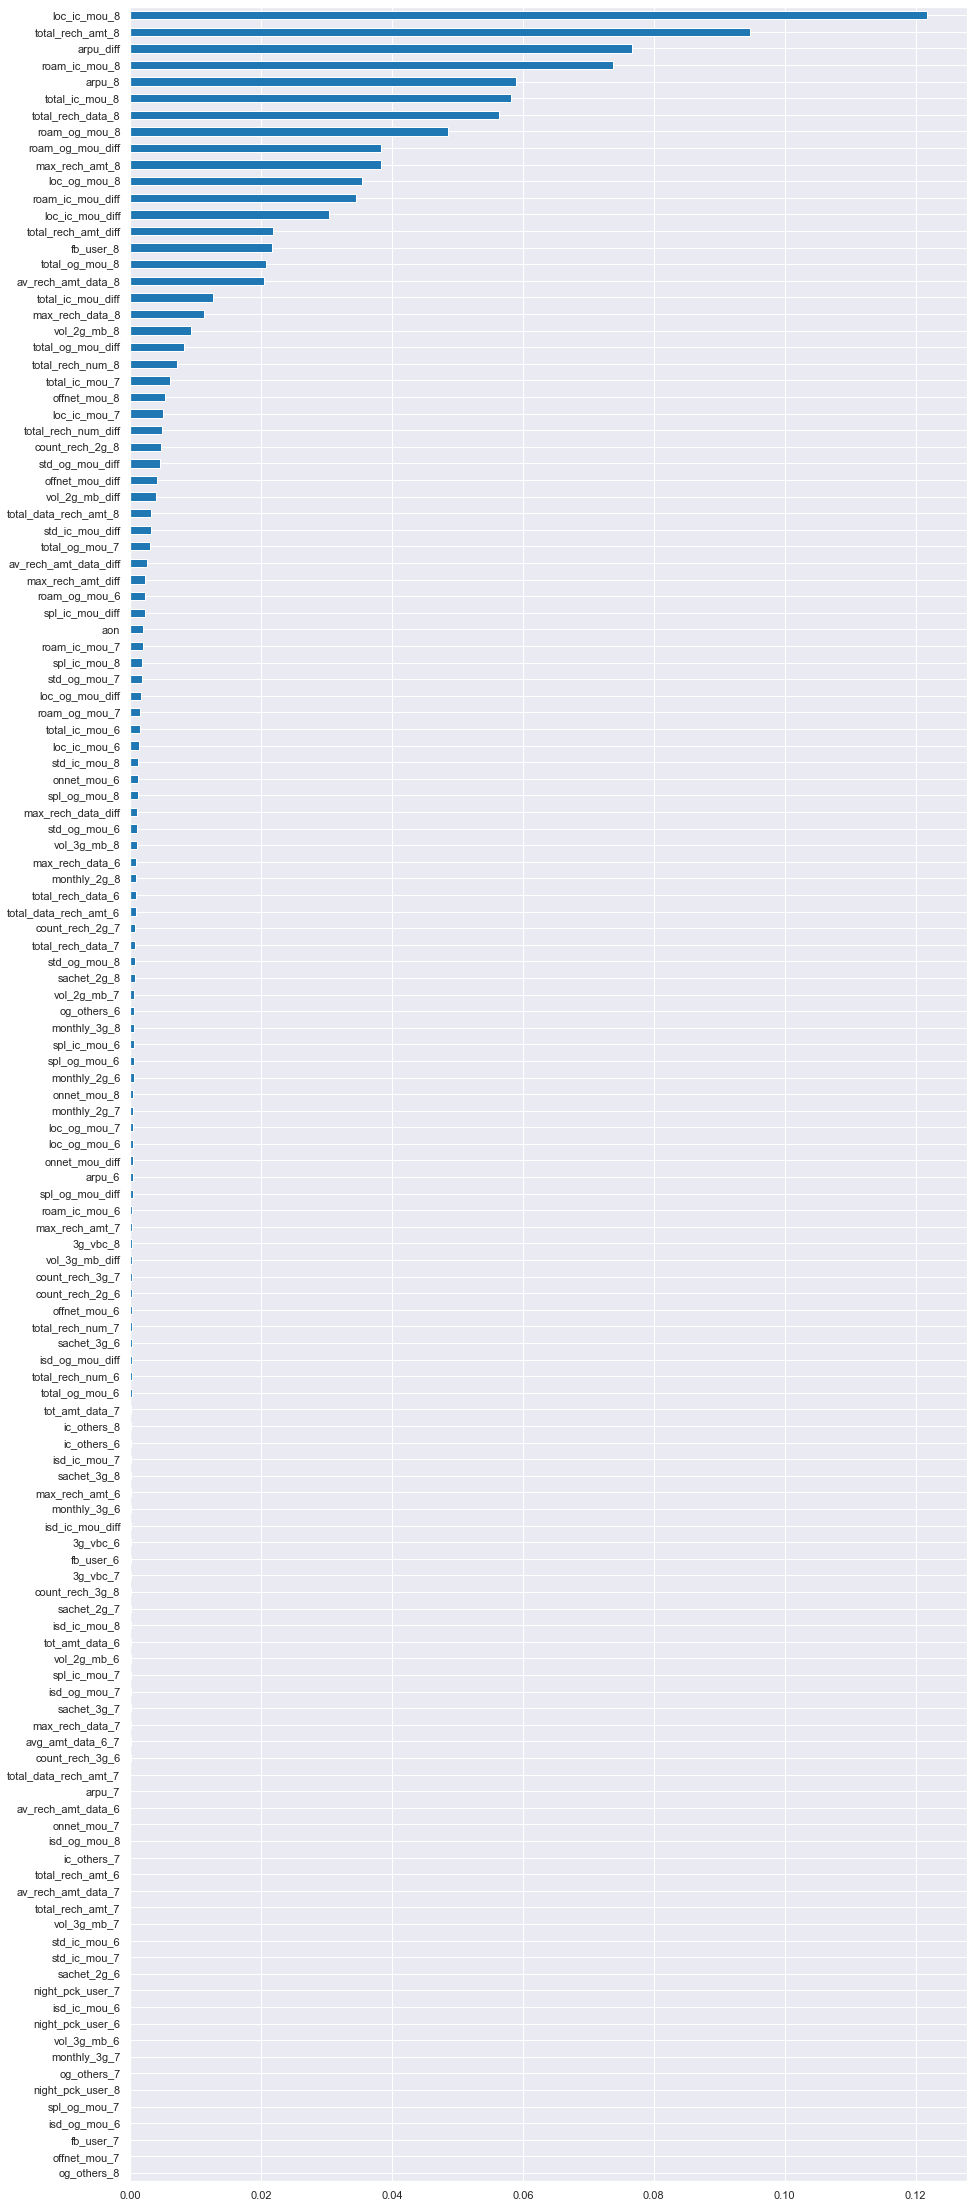

In [158]:
# plot the key features: 

plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf_best.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')
plt.show()

## Final Model Selection:

**Models approach:**  
To predict behavior we created three models:

1) Logistic Regression Model  
2) Decision Tree Classifier  
3) Random Forest Classifier  

The above models were created with default parameters. I was later hypertuned and then used to predict using the best estimators. 
The hyper tuned model showed maginal increase in the classification scores. 

Evaluation Methods  
Even though we calculated the accuary, precision, recall, classification reports, AUC-score etc for predictions from each of these models,  AUC-Score is most reliable given its capability to distinguish between classes which is the business objective for us. 

**Best Model:**  
Based on the AUC scores, hyper-parameter tuned Random Forest Classifier model performed the best with an AUC-Score of 0.85 vs. the other models the AUC-scores for which are below:

**AUC scores:**  
Logistic regression (optimal cut-off)                 : 0.814  
Decision Tree Classifier (Base Model)                 : 0.831  
Decision Tree Classifier (Hyper-Parameter Tuned Model): 0.832 
Random Forest Classifier (Base Model)                 : 0.836    
Random Forest Classifier (Hyper-Parameter Tuned Model): 0.849 



## Strategies to manage customer churn:

Monitoring changes in consumption should be done frequently because they appear to be a good indicator of churn.
Roaming service usage is high among churners, indicating network quality and service problems when roaming may be a contributing factor.
The network operators need to keep an eye on things and offer competitive roaming rates, greater network quality, and better services.
It is vital to keep an eye on rival marketing initiatives given the fierce competition among competitor networks.
The marketing department has to execute additional ads that are aimed at high-value roaming service subscribers. For example, - Reduced roaming fees during specific times of the day.
Free monthly roaming minutes based on previous roaming usage by the customer.